   <img src="https://momentummag.com/wp-content/uploads/2015/01/kjnkj2.jpg" style="margin: 15px; float: left;"> 
  
  
  
 

# Biking Kills

### Background:

Cycling is an activity that a large percentage of Americans partake in. People bike for pure leisure, for exercise and as a mode of transportation. It has become largely popular in urban areas, specifically densely populated large cities. The reasons for this are mainly due to the ease of getting from point A to point B, without needing to rely on means of public transportation. In a city like San Francisco, one can bike from one end to the other in under an hour (depending on their skill and experience of course)

 Not only is cycling good for your health but it's good for the environment and extremely efficient. In fact, cycling is more efficient than any other method of travel--including walking! The one billion bicycles in the world are a testament to its effectiveness. The engine for this efficient mode of transport is the human body.

 
 <img src="https://i.ytimg.com/vi/aCfIn9wRr3w/hqdefault.jpg" style="margin: 10px; float: right;"> 


In 2016, around 12.4 percent of Americans cycled on a regular basis. The number of cyclists/bike riders in the U.S. saw a considerable increase between 2012 and 2014, and has remained fairly stable since then. 

In 2016, there were 66.5 million cyclists and bike riders in the U.S. While the number of cyclists in the U.S. has decreased amongst cyclists aged between six and 17 since 2013, the trend among young adults – people aged between 18 to 24 years – is slightly different. The number of young adults who participated in bicycling increased from 2008 to 2013, when it reached the highest figure of the last decade – nearly 5.7 million. The number of young cyclists in the U.S. showed a declining trend after reaching this peak in 2014.

To summarize, cycling is very popular in the U.S. and people across all ages and walks of life enjoy the benefits from it.

---
### The problem:

Although a fun and healthy way to get around, cycling is a dangerous form of transportation. Cyclists and auto drivers' ability to share the road has proven to be a difficult task over the years. Both parties are often guilty of disobeying the laws or 'rules of the road', which may result in a collision of sorts. It is dangerous for both, but much more so for the cyclists. 

Some cities do a tremendous job at ensuring that cyclists have the protection they need in the form of designated bike lanes. Others are either making strides towards a more bike-friendly environment, or are in dire need of bike-lane related improvements. Without the protection and safety from automobiles, cyclists are often presented with life-threatening danger.

In big cities, cyclists are involved in accidents with motor vehicles quite regularly. In 2014 21,287 cyclists were injured in reported road accidents, including 3,514 who are killed or seriously injured. These figures only include cyclists killed or injured in road accidents that were reported to the police. Many cyclist casualties are not reported to the police, even when the cyclist is inured badly enough to be taken to hospital. The figures also exclude cycling accidents that occur away from the road.

Males are far more likely to be involved in cycling accidents than females. In 2014 65% of child cycling injuries involved a male child and for all male casualties this rose to 81%.

- Around 75% of fatal or serious cyclist accidents occur in urban areas
- Around half of cyclist fatalities occur on rural roads
- 75% happen at, or near, a road junction
- 80% occur in daylight (3.00 to 6.00 p.m. and 8.00 to 9.00 a.m. are the most common times for accidents)
- 80% of cyclist casualties are male
- Almost one quarter of the cyclists killed or injured are children
- Around three quarters of cyclists killed have major head injuries.


So what causes these accidents? How can both the drivers AND the cyclists make the roads a safer place? New York City is one of the most biked cities in the nation. There has been an effort to create more bike lanes, with the current total around 450 city-wide miles.

<img src="http://cdn.theatlantic.com/assets/media/img/posts/2015/04/NYCCycling/2f9306a05.png" style="margin: 10px; float: above;">


But accidents are still occuring. Is it the weather? The busy rush hours? The uneven pavement? Through examining NYC motor vehicle crash data from 2012 through 2015, I am able to come closer to what factors should be considered when predicting cycling accidents.

-----
<img src="http://www.firmoo.com/blog/wp-content/uploads/2011/10/Crane-Sports-Cycling-Sunglasses-1.jpg" style="margin: 10px; float: right;">

## The Data
 


### NYC motor vehicle collisions

   - Details around motor vehicle collisions that have taken place from 2012 through 2016. I'm limiting my set to include just 2012 - 2015. This dataset was pulled from nycopendata.socrata.com

Shape of the file (pre-munging):

- NYPD_Motor_Vehicle_Collisions.csv:
   - 959,631 rows
   - 29 columns

----
### NYC bike count

   - Information about the sheer number of cyclists on the road for each year between 2005 and 2015. I'm limiting my set to start in 2013 and end through 2015. This dataset was pulled from nycopendata.socrata.com
   
Shape of the file (pre-munging):

- NYC_bike_count.csv:
    - 35 rows
    - 26 columns

----
### NYC weather data
    
    - Detailed weather information for the city of New York. The data set includes details around rainfall, visibility and humidity levels, temperature and wind intensity. This dataset was pulled from wunderground.com

- NY_weather_csv (pre-munging):
    - 1,827 rows
    - 23 columns
    

## Loading up the libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import time
from time import mktime
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import patsy
from patsy import dmatrices
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.externals.six import StringIO
import cPickle

import statsmodels.api as sm
import folium
from pandas import *
from folium.map import Icon, Marker, Popup
import pickle
from folium.plugins import MarkerCluster

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

- NYC collision dataset

In [2]:
NY_bike = pd.read_csv("../../../Downloads/NYPD_Motor_Vehicle_Collisions.csv")

- NYC bike count dataset. There were a few missing values that corresponded to years outside the scope of my research, so I decided to drop those.

In [2]:
bike_count = pd.read_csv('../../../Desktop/datasets/NYC_bike_count.csv', parse_dates=True)
bike_count.dropna(inplace=True)
bike_count = bike_count[bike_count['Year']>2012]

- NYC weather datasets

In [3]:
NY_weather_2013 = pd.read_csv(
'https://www.wunderground.com/history/airport/KNYC/2013/1/1/CustomHistory.html\
?dayend=31&monthend=12&yearend=2013&req_city=&req_state=&req_statename=&reqdb.\
zip=&reqdb.magic=&reqdb.wmo=&format=1')

NY_weather_2014 = pd.read_csv(
'https://www.wunderground.com/history/airport/KNYC/2014/1/1/CustomHistory.html\
?dayend=31&monthend=12&yearend=2014&req_city=&req_state=&req_statename=&reqdb.\
zip=&reqdb.magic=&reqdb.wmo=&format=1')

NY_weather_2015 = pd.read_csv(
'https://www.wunderground.com/history/airport/KNYC/2015/1/1/CustomHistory.html\
?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.\
zip=&reqdb.magic=&reqdb.wmo=&format=1')

- I decided to use python's pickle function so that I can save the post munged/merged dataset to my desktop for ease of access without needing to load in the entire csv file each time. 

- It's the NYC collision data merged with the NYC weather data.

In [3]:
NY_merged_samp = pd.read_pickle('../../../Desktop/datasets/NY_merged_new_.pkl')
NY_merged_samp = NY_merged_samp[(NY_merged_samp['DATE'] > '12/31/2012') & (NY_merged_samp['BOROUGH'] != 0)]

- Showing the .info( ) on my df. Almost 500k rows and 62 features I'm working with

In [6]:
NY_merged_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475591 entries, 100522 to 727678
Data columns (total 62 columns):
DATE                             475591 non-null datetime64[ns]
TIME                             475591 non-null float64
BOROUGH                          475591 non-null object
ZIP_CODE                         475591 non-null float64
LATITUDE                         475591 non-null float64
LONGITUDE                        475591 non-null float64
LOCATION                         475591 non-null object
ON_STREET_NAME                   475591 non-null object
CROSS_STREET_NAME                475591 non-null object
OFF_STREET_NAME                  475591 non-null object
NUMBER_OF_PERSONS_INJURED        475591 non-null int64
NUMBER_OF_PERSONS_KILLED         475591 non-null int64
NUMBER_OF_PEDESTRIANS_INJURED    475591 non-null int64
NUMBER_OF_PEDESTRIANS_KILLED     475591 non-null int64
injuries                         475591 non-null int64
deaths                           4755

- I wanted to run an initial heatmap of the variables that I though would be of relevance to my model. I'll eventually update this with the additional features I create 

In [7]:
heat_df = NY_merged_samp[['injuries', 'TIME', 'precip', 'precip_scale', 'time_segment', 'BOROUGH',
                         'max_temp', 'min_temp','temp_cat','clouds','day_of_week']]

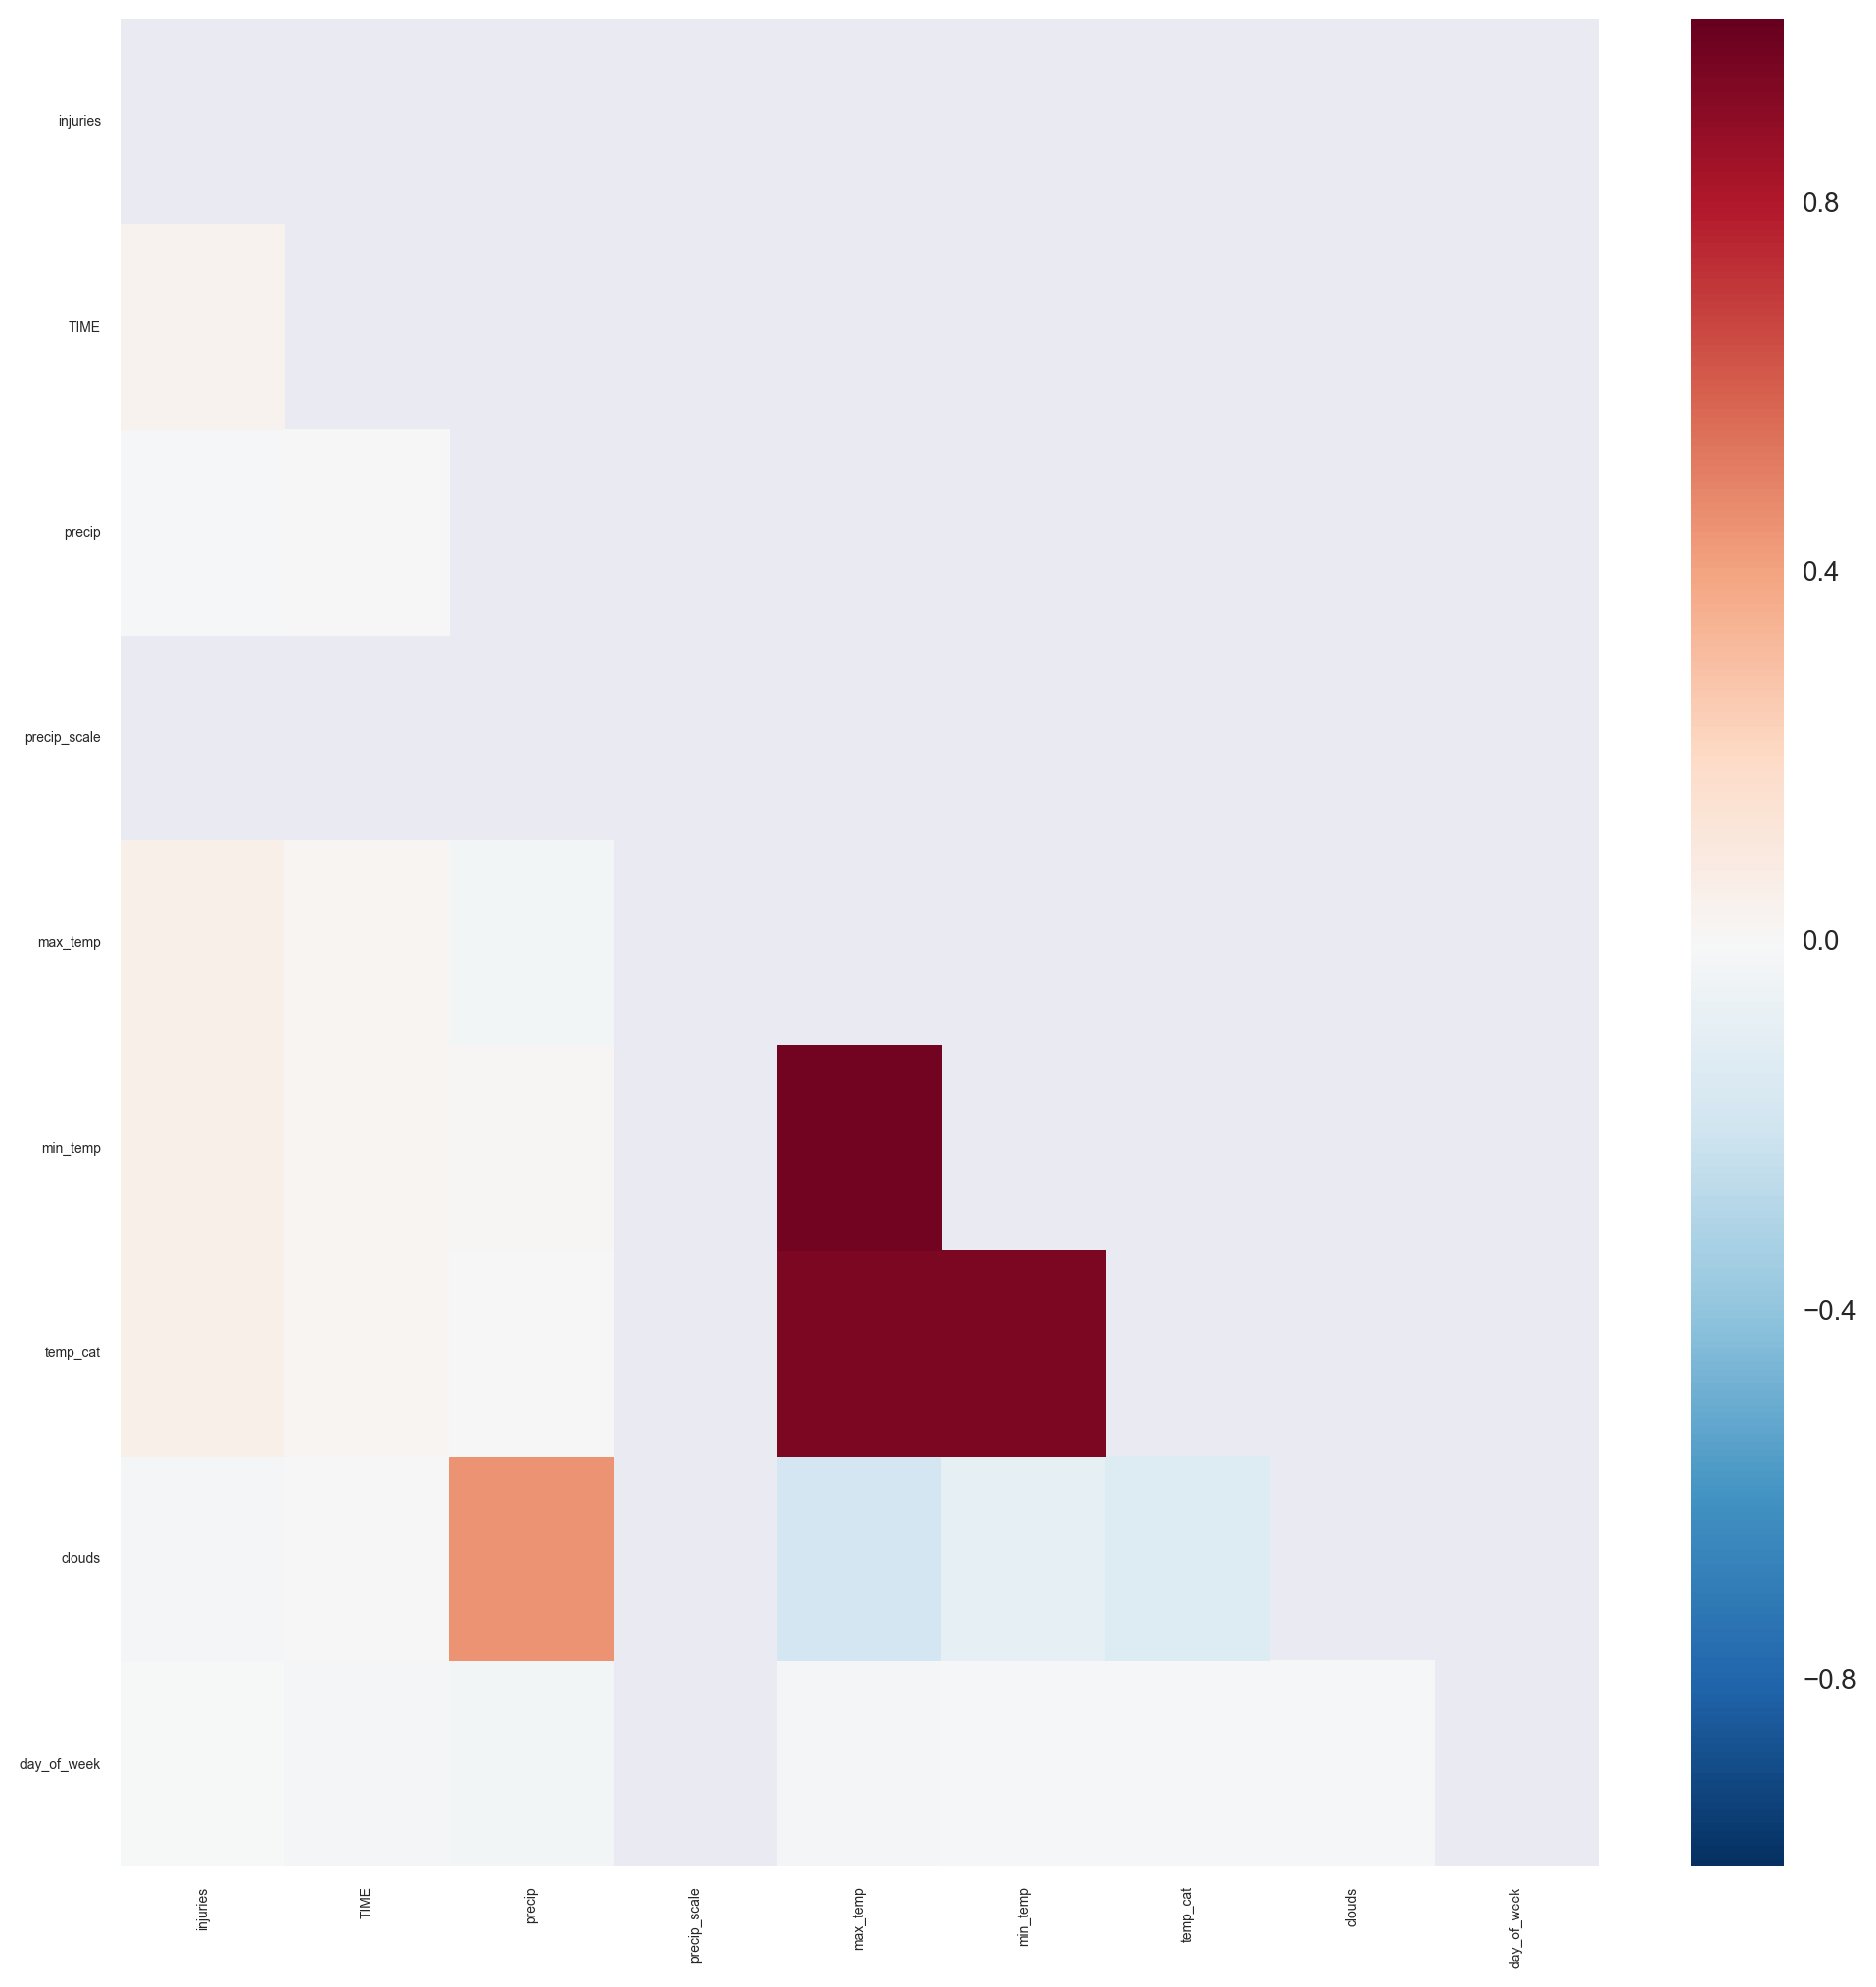

In [8]:
def correlation_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=False)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=5, rotation=0)
    plt.show()
    
correlation_heat_map(heat_df)

## NY_merged_samp data-dictionary
---
### The following is a list of all the features contained in the dataframe NY_merged_samp
                           
- time >>> time of day the crash occurred
- borough >>>     borough of NYC the crash occurred in
- zip_code >>> zip code
- latitude >>> latitude coordinate where the crash took place
- longitude >>> latitude coordinate where the crash took place
- location >>> latitude and longitude coordinates where the crash took place
- on street name >>> the street the crash occurred on
- cross street name>>> the crash street the crash occurred on
- number of persons injured >>> total quantity of people injured in the crash (for motor vehicle crashes)
- number of persons killed >>> total quantity of people killed in the crash (for motor vehicle crashes)
- number of pedestrians injured >>> quantity of pedestrians injured in the crash (for motor vehicle crashes)
- number of pedestrians killed >>> quantity of pedestrians killed in the crash (for motor vehicle crashes)
- injuries >>> quantity of cyclists injured in the crash                     
- deaths >>> quantity of cyclists killed in the crash
- number of motorist injured >>> quantity of people injured in the crash (for motor vehicle crashes)       
- number of motorist killed >>> quantity of people killed in the crash (for motor vehicle crashes)       
- vehicle 1 >>> primary vehicle involved                         
- contributing factor vehicle 2 >>> secondary vehicle involved
- contributing factor vehicle 3 >>> third vehicle involved
- contributing factor vehicle 4 >>> fourth vehicle involved
- contributing factor vehicle 5 >>> fifth vehicle involved
- unique key >>> unique identifier for the police report
- vehicle type code 1 >>> vehicle 1 code 
- vehicle type code 2 >>> vehicle 2 code
- vehicle type code 3 >>> vehicle 3 code
- vehicle type code 4 >>> vehicle 4 code
- vehicle type code 5 >>> vehicle 5 code
- max temp >>> highest temperature for the day
- mean temp >>> mean temperature for the day
- min temp >>> lowest temperature for the day                         
- max dew >>> highest dew point measurement for the day                         
- mean dew >>> mean dew point measurement for the day                         
- min dew >>> lowest dew point measurement for the day                          
- max humid >>> highest humidity level for the day                        
- mean humid >>> mean humidity level for the day                                               
- min humid >>> lowest humidity level for the day                                                
- max sea level pressure >>> highest sea level pressure measured that day
- mean sea level pressure >>> mean sea level pressure measured that day
- min sea level pressure >>> lowest sea level pressure measured that day
- max visibility >>> best/highest visibility measured for that day                      
- mean visibility >>> mean visibility measured for that day
- min visibility >>> worst/lowest visibility measured for that day                      
- max wind >>> highest wind speed recorded for that day                         
- mean wind >>> lowest wind speed recorded for that day                                                 
- max gust >>> highest gust speed recorded for that day                         
- precipitation >>> amount of precipitation recorded for that day                           
- clouds >>> amount of cloud coverage for that day                           
- events >>> any significant weather related events that occurred that day                          
- windDirDegrees >>> any impact the wind had on the temperature(similar to windchill)            
- time segment(engineered feature) >>> the 6 hour group the event took place in                     
- borough cat(engineered feature) >>> the numerical class assigned to each borough                      
- precip scale(engineered feature) >>> the category that the precipitation level fit into                     
- month(engineered feature) >>> the numerical month number assigned to that month                             
- injuries binary(engineered feature) >>> binary values: 0 if injury, 1 if not                   
- temp cat(engineered feature) >>> temperature category for the given temp level for that day                         
- dew cat(engineered feature) >>> dew category for the given dew level for that day                           
- humid cat(engineered feature) >>> humidity category for the given humidity level for that day                         
- day of week(engineered feature) >>> numerical day of the week for that day                       
- year(engineered feature) >>> the year the crash occurred in                              
- month name(engineered feature) >>> the month the crash occurred in  

## bike_count data-dictionary
---
### The following is a list of all the features contained in the dataframe bike_count
- LocationID >>> ID for the location the count was held              
- LocationType >>> type of location where the count was held              
- TypeOfTime >>> they type of day the held occurred on (weekday, weekend) 
- Location >>> address where the count occurred                  
- Location_Lat >>> latitude coordinate for where the count occurred              
- Location_Long >>> longitude coordinate for where the count occurred                            
- Year >>> year                       
- TotalUsers >>> total individuals recorded/tallied                
- NonCyc_OtherUser >>> non-cycling users recorded           
- CyclistVolume >>> total volume of cyclists recorded             
- CycBikeLane >>> number of cyclists that were recorded in the bike lane               
- CycAdjacentLane >>> number of cyclists that were recorded in the lane adjacent           
- CyclOtherLane >>> number of cyclists that were recorded in any other type of lane                       
- CycCounterFlowInLane >>> number of cyclists that were recorded in the flowing lane
- CycSidewalk >>> number of cyclists that were recorded on the sidewalk                        
- CycCnterFlowOutOfLane >>> number of cyclists that were recorded outside the lane                
- FemaleCyc_Total >>> total volume of female cyclists recorded            
- MaleCyc_Total >>> total volume of male cyclists recorded             
- Female_Cyc_Helmet >>> total volume of female cyclists wearing a helmet recorded          
- Male_Cyc_Helmet >>> total volume of male cyclists wearing a helmet recorded                     
- Cycl_Helmet_all >>> total volume of cyclists wearing a helmet recorded                     
- Cyc_Under16 >>> total volume of cyclists under 16 recorded                         
- Citibike_Male >>> total volume of male cyclists riding a citibike             
- Citibike_female >>> total volume of female cyclists riding a citibike                         
- Citibike_All >>> total volume of cyclists riding a citibike                           
- Non_citibikeCyc >>> total volume of cyclists not riding a citibike               
- m_helmet_ratio(engineered feature) >>> percentage of male riders wearing a helmet            
- f_helmet_ratio(engineered feature) >>> percentage of female riders wearing a helmet                       
- total_helmet_ratio(engineered feature) >>> total percentage of riders wearing a helmet             


- I decided to first take a look at the bike_count dataset so that I could get a feel for just how many riders there are. Again, the counts only took place at a few different locations in Manhattan, so I made sure to be aware of this when running any analytics.

- My assumption here is that these locations where the counts take place have the highest cycling volume in the Manhattan borough. Given my assumption I used this dataset to compare to the injuries that occurred in Manhattan.  

- This dataset has some great features such as the number of men and women wearing helmets.
- Used these to create some additional features for potential future analytics.
- Total riders wearing helmets vs. total men and women wearing helmets.

### Below are the functions that I used to create some additional features / slices of my data

In [5]:
## creating a feature that will take in the column 'TIME' and pop off the last three values and will leave just the hour
## so that I can create the next feature: 'time_segment'

def pop(col):
    NEW_TIME = []
    for i in col:
        NEW_TIME.append(i[:-3])
    return NEW_TIME

## creating a 'time_segment' feature so that I can identify in which blocks of time throughout the day the most amount 
## of crashes take place.

def time_segment(col):
    time_segment = []
    for i in col:
        if (i >= 0) & (i <= 6):
            time_segment.append('early_morning')
        elif (i > 6) & (i <= 12):
            time_segment.append('mid-morning')
        elif (i > 12) & (i <= 15):
            time_segment.append('afternoon')
        elif (i > 15) & (i <= 19):
            time_segment.append('evening')
        elif (i > 19) & (i<=24):
            time_segment.append('late-night')
        else:
            time_segment.append('NA')
    return time_segment

## making a 

def segment_func(bike_df, start_date, end_date):
    segment_mask = (bike_df['DATE'] >= start_date) & (bike_df['DATE'] <= end_date)
    bike_segment = bike_df[segment_mask]
    return bike_segment

## creating a borough column to create another feature for my model

def borough(col):
    borough_cat = []
    for i in col:
        if i == 'BROOKLYN':
            borough_cat.append(1)
        elif i == 'MANHATTAN':
            borough_cat.append(2)
        elif i == 'QUEENS':
            borough_cat.append(3)
        elif i == 'BRONX':
            borough_cat.append(4)
        elif i == 'STATEN ISLAND':
            borough_cat.append(5)
        else:
            borough_cat.append(0)
    return borough_cat

## assigning a month column to create another feature for my model

def month_extract(col):
    MONTH = []
    for i in col:
        MONTH.append(i.month)
    return MONTH

def month_name(col):
    month_name = []
    for i in col:
        if i == 1:
            month_name.append('Jan')
        elif i == 2:
            month_name.append('Feb')
        elif i == 3:
            month_name.append('Mar')
        elif i == 4:
            month_name.append('Apr')
        elif i == 5:
            month_name.append('May')
        elif i == 6:
            month_name.append('Jun')
        elif i == 7:
            month_name.append('Jul')
        elif i == 8:
            month_name.append('Aug')
        elif i == 9:
            month_name.append('Sep')
        elif i == 10:
            month_name.append('Oct')
        elif i == 11:
            month_name.append('Nov')
        elif i == 12:
            month_name.append('Dec')
        else:
            month_name.append('NA')
    return month_name

## writing a function to extract the hour of the day from the datetime objects ('DATE' column) so that I can plot each 
## segment's volume of injury/death per each hour and see what time of day is most dangerous.

def hour_extract(col):
    HOUR = []
    for i in col:
        HOUR.append(i.hour)
    return HOUR

## extracting the year from the date column
def year(col):
    year = []
    for i in col:
        year.append(i.year)
    return year

## making a function that will convert the Army time hour to a standard hour of the day (example: 20 --> 8pm)


        
## making a function that creates a list containing a '1' if there was a cyclist injured/killed and a '0' if there were
## no cyclists injured/killed

def binary(col):
    CYCLISTS_INJURED = []
    for i in col:
        if i > 0:
            CYCLISTS_INJURED.append(1)
        else:
            CYCLISTS_INJURED.append(0)
    return CYCLISTS_INJURED

def weather(col):
    rain = []
    for i in col:
        if i > 0:
            rain.append(1)
        else:
            rain.append(0)
    return rain

## building a function that separates the amount of precipitation in NYC into 6 varying buckets of intensity (0:5)

def precip(col):
    precip_cat = []
    for i in col:
        if (i > 0) & (i <= 1.00):
            precip_cat.append(1)
        elif (i > 1.00) & (i <= 2.00):
            precip_cat.append(2)
        elif (i > 2.00) & (i <= 3.00):
            precip_cat.append(3)
        elif (i > 3.00) & (i <= 4.00):
            precip_cat.append(4)
        elif (i > 4.00) & (i <= 5.00):
            precip_cat.append(5)
        else:
            precip_cat.append(0)
    return precip_cat


## building a function that separates the mean temperature/dewpoints of each day in NYC into 20+ buckets between 
## the range 0 and 100

def temp(col):
    temp_cat = []
    for i in col:
        if (i > -20) & (i <= 0):
            temp_cat.append(1)
        elif (i > 0) & (i <= 20):
            temp_cat.append(2)
        elif (i > 20) & (i <= 40):
            temp_cat.append(3)
        elif (i > 40) & (i <= 60):
            temp_cat.append(4)
        elif (i > 60) & (i <= 80):
            temp_cat.append(5)
        elif (i > 80) & (i <= 100):
            temp_cat.append(6)   
        else:
            temp_cat.append('NA')
    return temp_cat
            
## creating a function that will categorize the different wind levels into 4 different categories, depending on the 
## intensity of that day

def wind(col):
    wind_cat = []
    for i in col:
        if (i >= 0) & (i <= 5):
            wind_cat.append(1)
        elif (i > 5) & (i <= 10):
            wind_cat.append(2)
        elif (i > 10) & (i <= 15):
            wind_cat.append(3)
        else:
            wind_cat.append(4)
    return wind_cat

## creating a function that will categorize the day that the accident occurred to the day of the week

def weekday(col):
    day_of_week = []
    for i in col:
        day_of_week.append(i.weekday())
    return day_of_week

## creating a function that adds a column 'season' to the dataframe. could be a possible feature to include in my model

def season(col):
    season = []
    for i in col:
        if (i >='03/20/2013') & (i <= '06/21/2013'):
            season.append('Spring')
        elif (i > '06/21/2013') & (i <= '09/22/2013'):
            season.append('Summer')
        elif (i > '09/22/2013') & (i <= '12/21/2013'):
            season.append('Fall')
        else:
            season.append('Winter')
    return season

Taking a look at the different locations that the counts of cyclists were taking place

In [13]:
bike_count.columns

Index([u'LocationID', u'LocationType', u'TypeOfTime', u'Location',
       u'Location_Lat', u'Location_Long', u'Year', u'TotalUsers',
       u'NonCyc_OtherUser', u'CyclistVolume', u'CycBikeLane',
       u'CycAdjacentLane', u'CyclOtherLane', u'CycCounterFlowInLane',
       u'CycSidewalk', u'CycCnterFlowOutOfLane', u'FemaleCyc_Total',
       u'MaleCyc_Total', u'Female_Cyc_Helmet', u'Male_Cyc_Helmet',
       u'Cycl_Helmet_all', u'Cyc_Under16', u'Citibike_Male',
       u'Citibike_female', u'Citibike_All', u'Non_citibikeCyc'],
      dtype='object')

In [4]:
bike_count['m_helmet_ratio'] = (bike_count['Male_Cyc_Helmet'] / bike_count['MaleCyc_Total'])
bike_count['f_helmet_ratio'] = (bike_count['Female_Cyc_Helmet'] / bike_count['FemaleCyc_Total'])
bike_count['total_helmet_ratio'] = (bike_count['Cycl_Helmet_all'] / bike_count['CyclistVolume'])
all_helmet_groupby = bike_count.groupby(['Year'], as_index=False)['total_helmet_ratio'].mean()
m_helmet_groupby = bike_count.groupby(['Year'], as_index=False)['m_helmet_ratio'].mean()
f_helmet_groupby = bike_count.groupby(['Year'], as_index=False)['f_helmet_ratio'].mean()
helmet_groupby = bike_count.groupby(['Year'], as_index=False)[['m_helmet_ratio', 'f_helmet_ratio']].mean()
bike_helmet_group = bike_count.groupby(['Year'], as_index=False)[['Male_Cyc_Helmet','Female_Cyc_Helmet',
                                                                  'MaleCyc_Total','FemaleCyc_Total','CyclistVolume']].sum()

In [5]:
bike_count_group = bike_count.groupby(['Location','Location_Lat','Location_Long'], as_index=False)['CyclistVolume'].sum()
bike_count_location_helmets = bike_count.groupby(['Location', 'Year'], as_index=False)['total_helmet_ratio'].sum()
bike_count_location_group = bike_count.groupby(['Location', 'Year'], as_index= False)['CyclistVolume'].sum()

bike_count_group = pd.DataFrame(bike_count_group)
bike_count_group.CyclistVolume = bike_count_group.CyclistVolume.astype(float, inplace=True)
print '    '
bike_count_group

Location  Location_Lat  Location_Long  \
0  Adam Clayton at W113th St. (NB+SB)     40.801269     -73.953865   
1                 Broadway at W28 St.     40.745293     -73.988767   
2        Central Park West at W93 St.     40.789748     -73.966117   
3            Eighth Avenue at W28 St.     40.748435     -73.996206   
4              Fifth Avenue at 14 St.     40.736015     -73.993635   
5             First Avenue at E85 St.     40.776190     -73.949855   
6       Lafayette Street at Astor Pl.     40.729830     -73.991424   
7             Second Avenue at E7 St.     40.727963     -73.988133   
8             Sixth Avenue at W23 St.     40.742897     -73.992805   

   CyclistVolume  
0         1953.0  
1         4122.0  
2         2877.0  
3         6098.0  
4         4971.0  
5         1018.0  
6         5450.0  
7         9023.0  
8         8254.0

# [click for a map of the different bike count locations in Manhattan](https://cdn.rawgit.com/seporter11/DSI-SF-4-seporter11/69486585/bike_count_location_map.html)

- To get a good idea of the volume of riders on the road, I decided to plot these locations and see how the volume trends over the years. Some things to note:
    - The number of cyclists on the road is increasing
    - Some locations have less cyclists. These are probably the more suburban areas
    - The locations where there's more of a downward trend may be areas to look into for reasons why the numbers are decreasing, i.e. are there more accidents that occur in these areas?

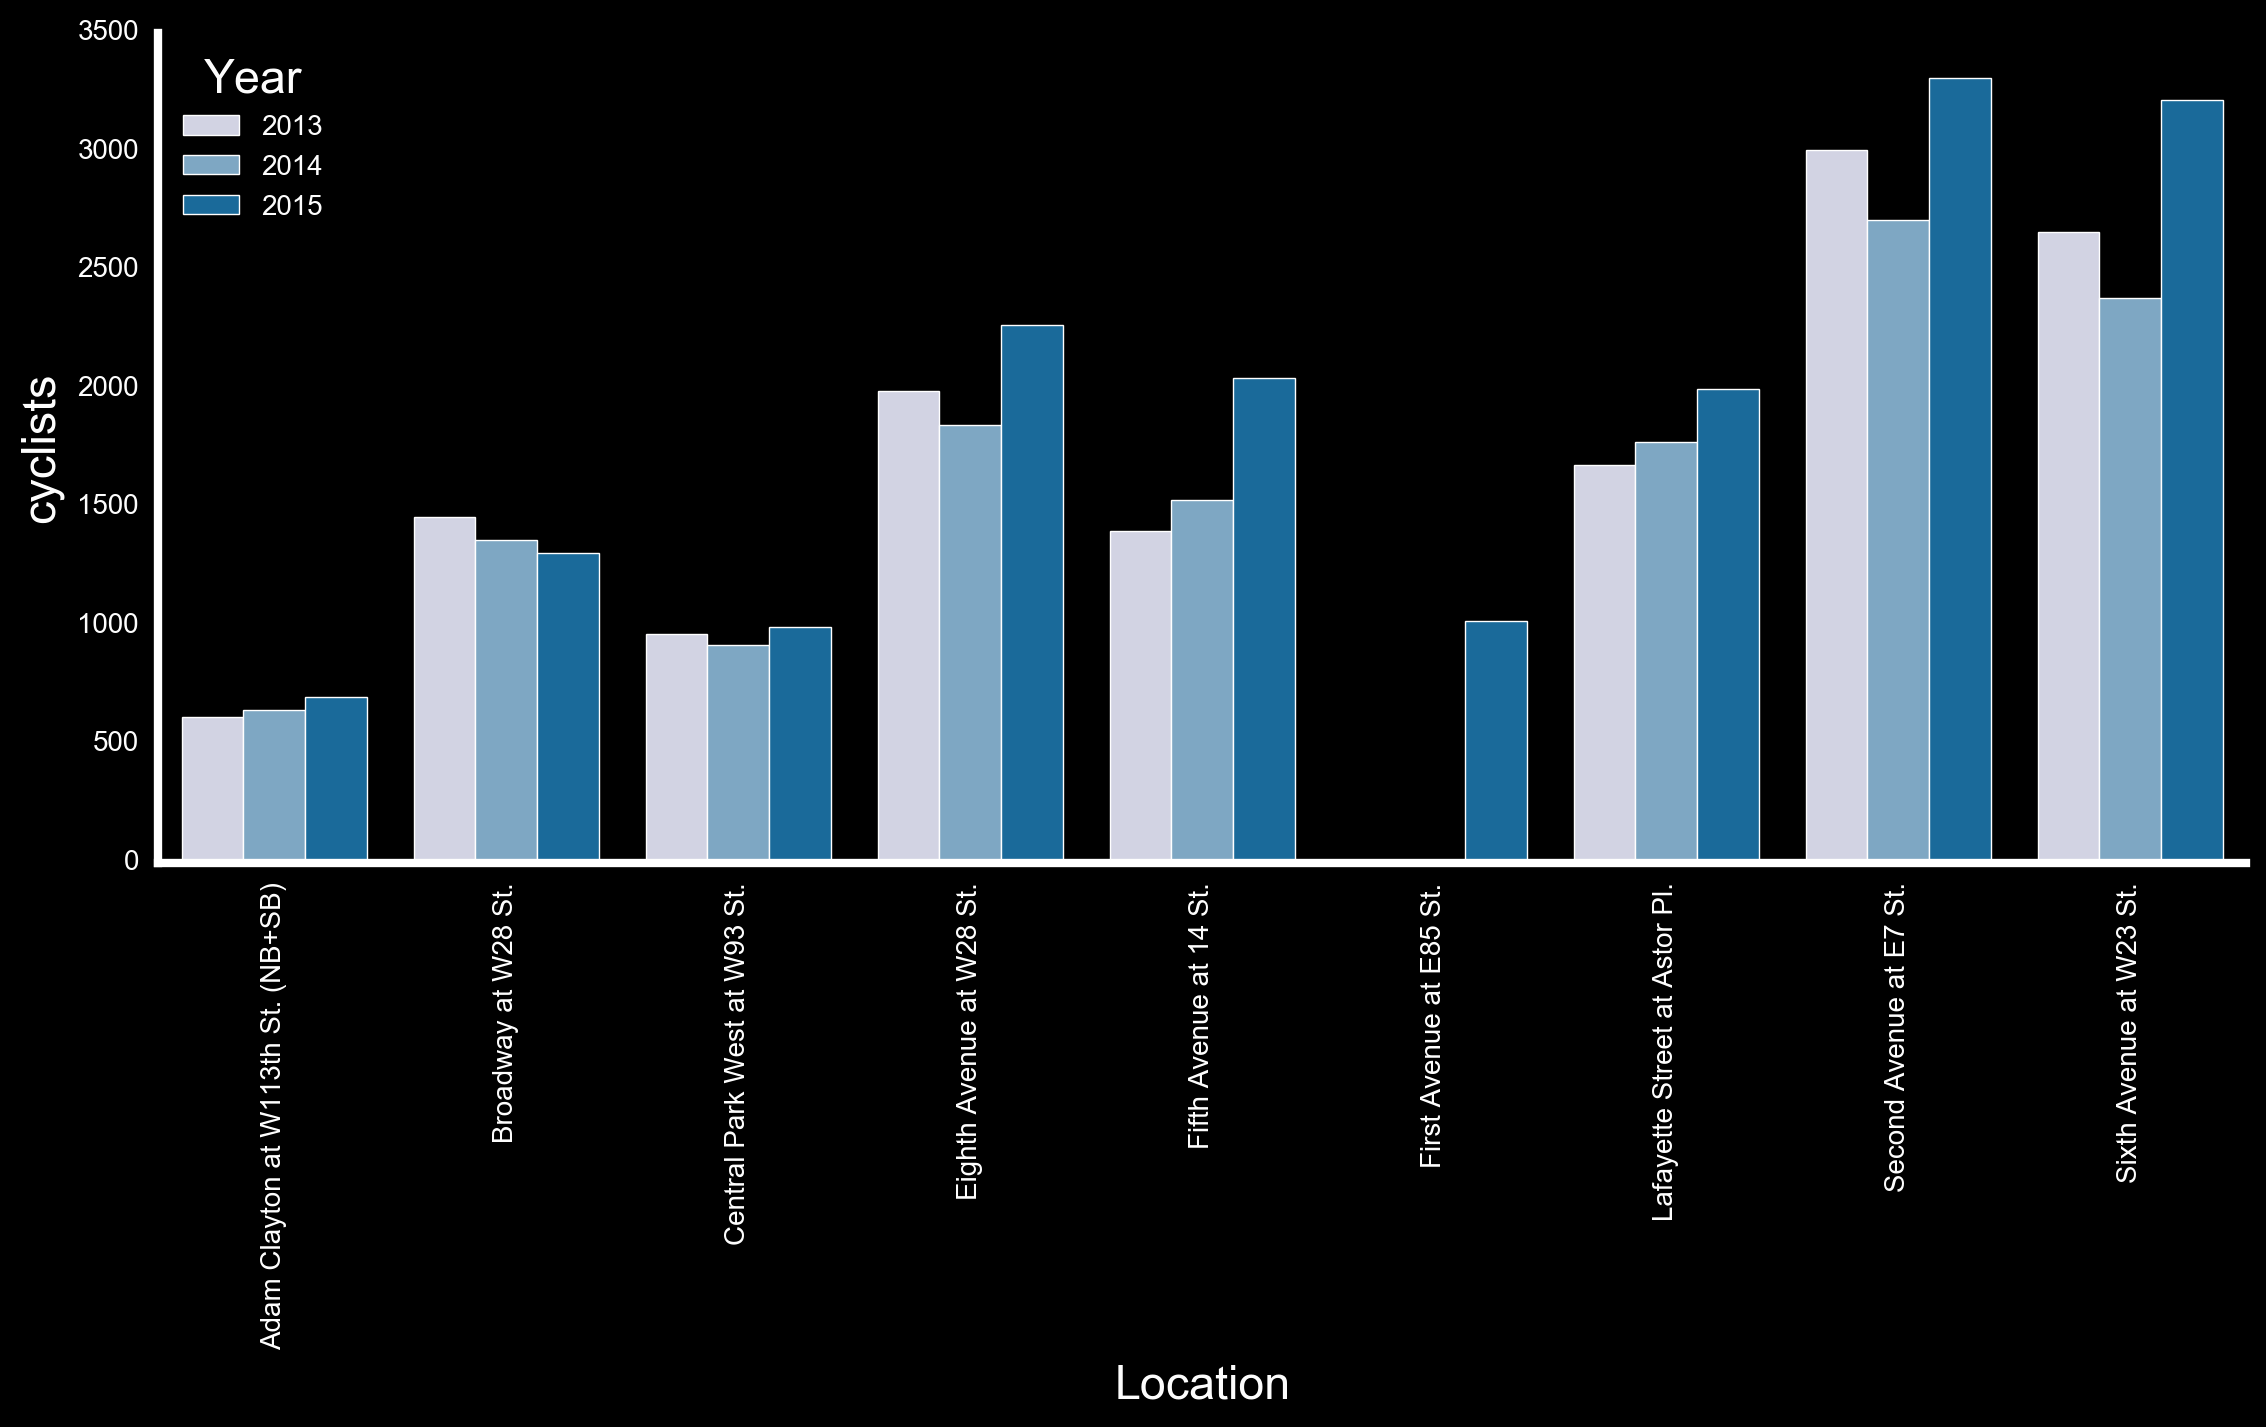

In [50]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12,5))

bike_count_plot = sns.barplot(x='Location', y='CyclistVolume', hue='Year', data=bike_count_location_group,palette='PuBu')
for item in bike_count_plot.get_xticklabels():
    item.set_rotation(90)
    
ax.set_ylabel('cyclists')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_title('cyclists by location')
plt.plot();

- I wanted to take a look at volume by gender next. Grouping by year and gender to get the totals over time.
- As the graph depicts, both genders have an initial downward trend in terms of riders on the road from 2013 - 2014, and then a spike heading into 2015.

In [34]:
count_group = bike_count.groupby(['Year'])[['MaleCyc_Total', 'FemaleCyc_Total']].sum().reset_index()
count_group.columns = [['year', 'm_cyclists', 'f_cyclists']]
count_group['total_cyclists'] = count_group['m_cyclists'] + count_group['f_cyclists']
count_group.index = count_group['year']

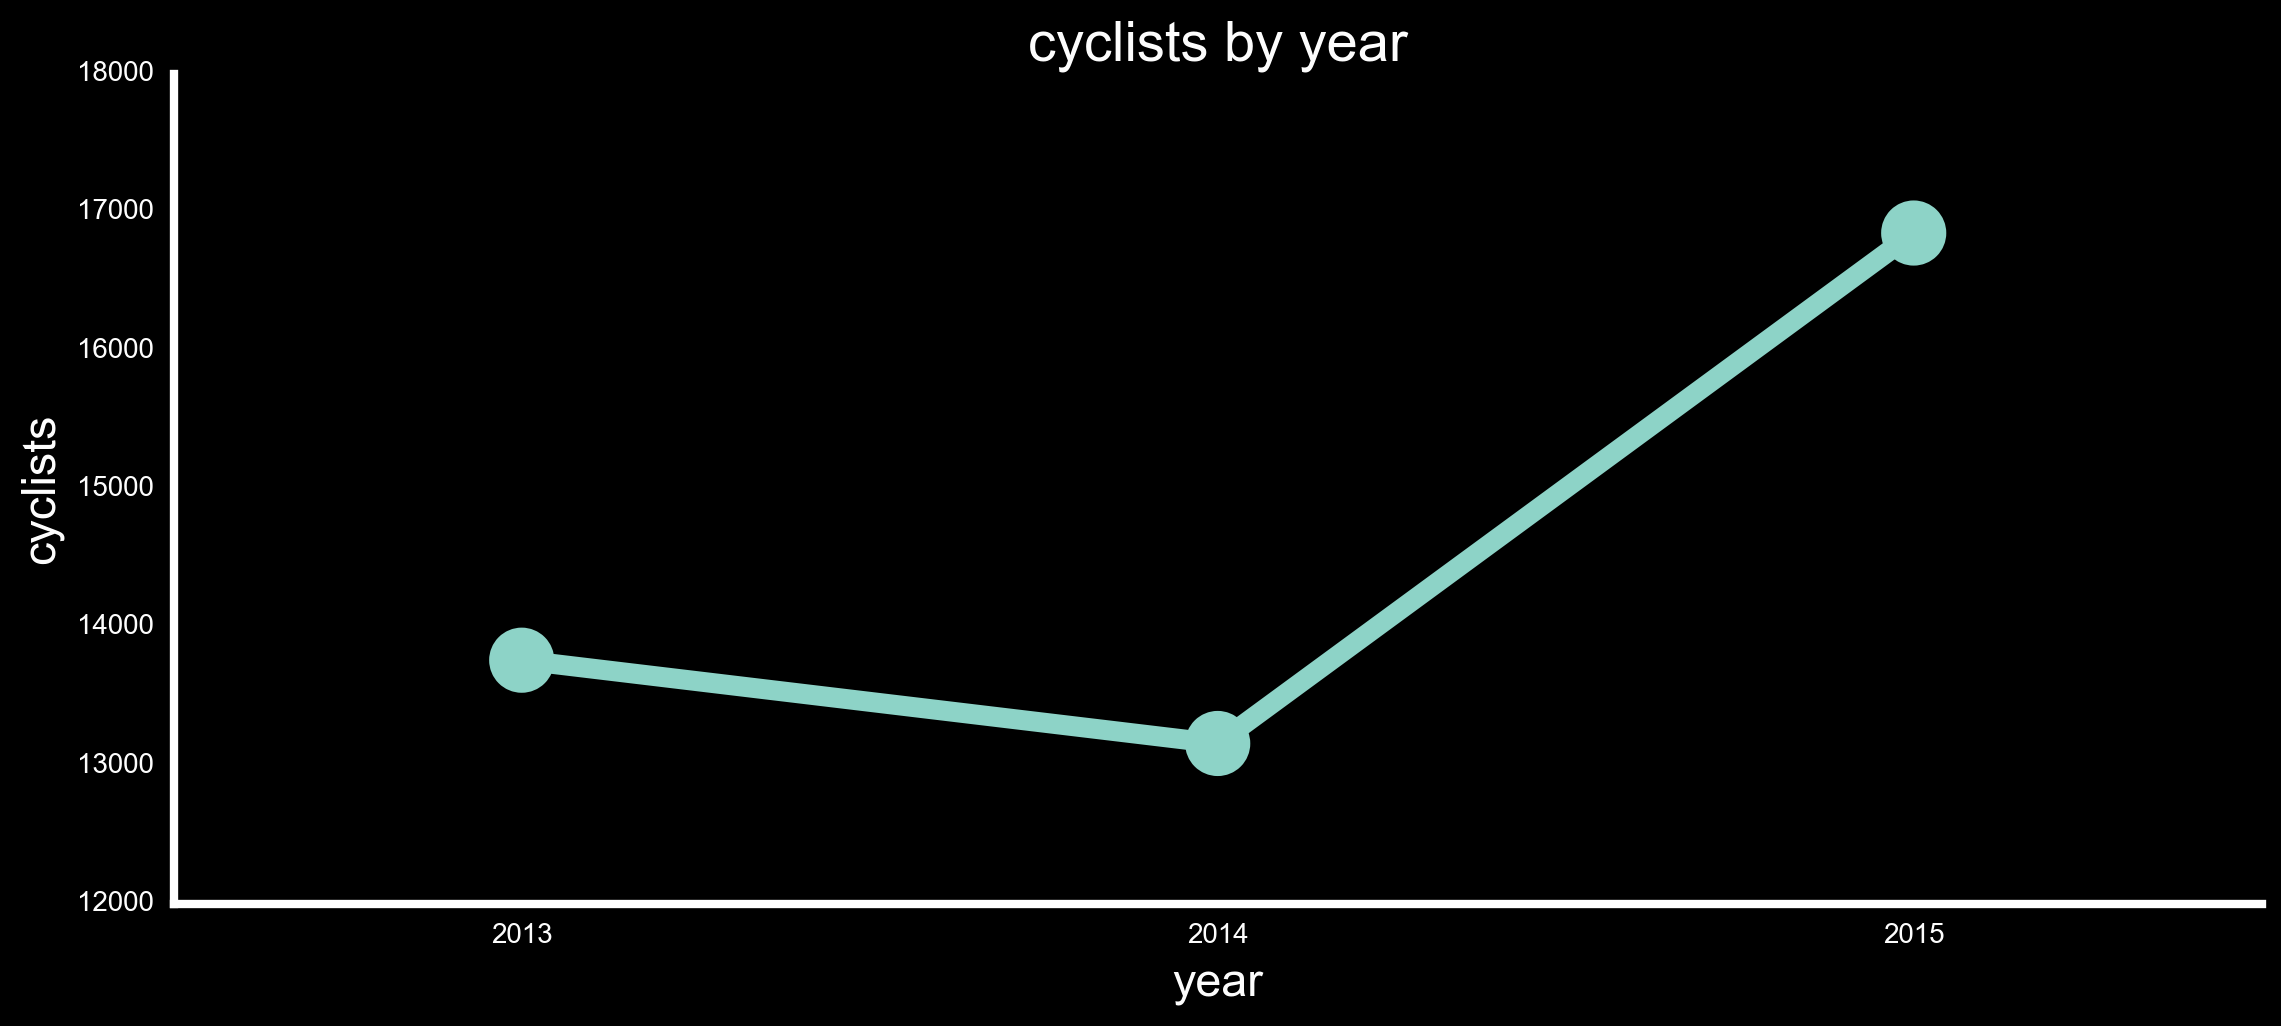

In [13]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))

sns.pointplot(x='year', y='total_cyclists', data=count_group)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('cyclists')
ax.set_title('cyclists by year')
plt.plot();

//anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


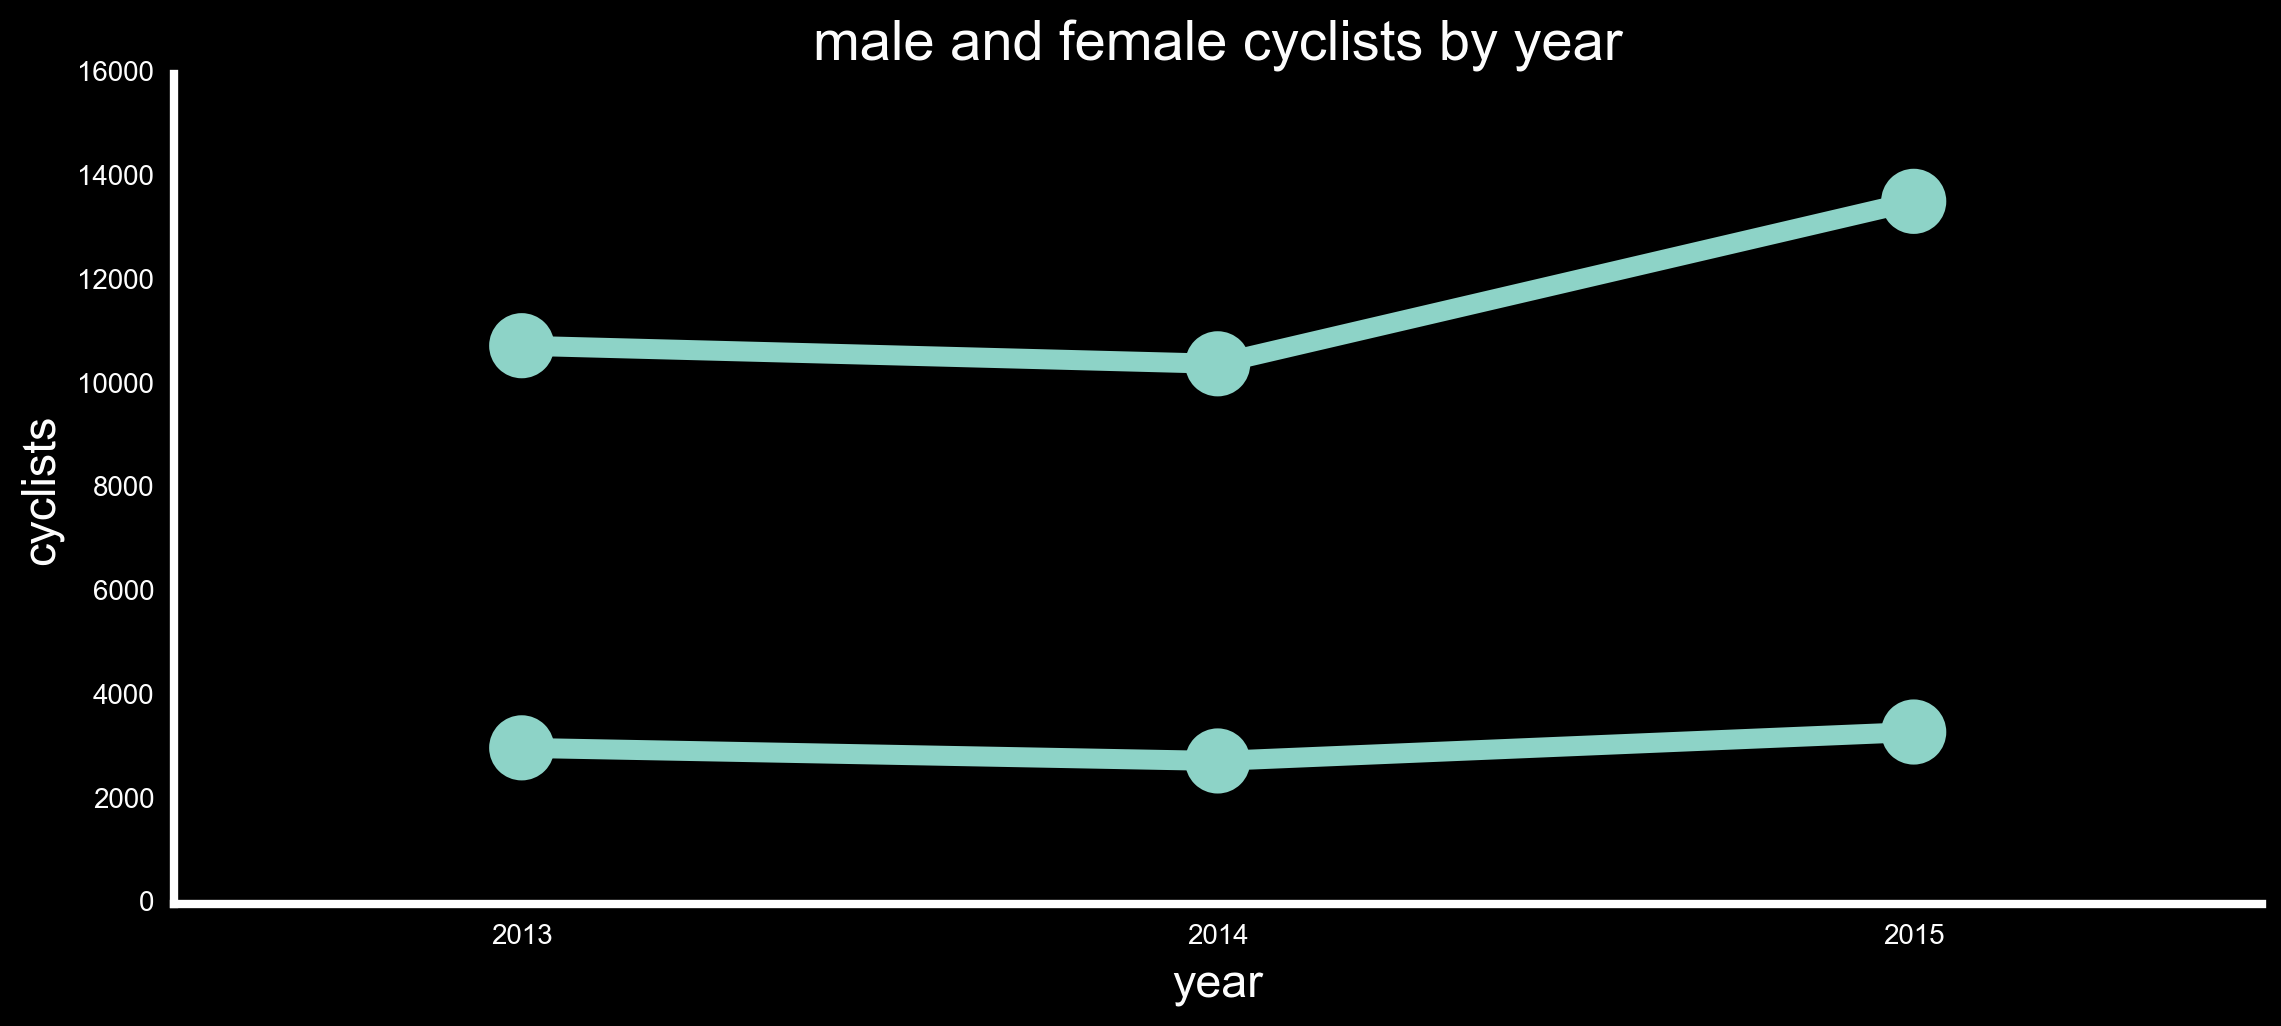

In [14]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(12,5))

sns.pointplot(x='year', y='m_cyclists', data=count_group, ax=ax1)
sns.pointplot(x='year', y='f_cyclists', data=count_group, ax=ax1)

ax1.legend(loc='upper left')
ax1.set_ylabel('cyclists')
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
ax1.set_title('male and female cyclists by year')
plt.plot();

- Since my project is about cycling injuries, I want to see the volume of cyclists against the volume of injuries.
- Some takeaways here: 
    - The number of injuries seems to be increasing - not for all boroughs, however 
    - Brooklyn has the most injuries, followed by Manhattan, Queens, Bronx then Staten Island.
- Next I'd like to drill down into the Manhattan injuries to get a more specific comparison against the bike counts.

In [7]:
NY_mask = NY_merged_samp[NY_merged_samp['BOROUGH'] != 0]
NY_mask = NY_mask[NY_mask['injuries'] > 0]
NY_mask.head()

DATE  TIME    BOROUGH  ZIP_CODE   LATITUDE  LONGITUDE  \
100637 2013-01-01  16.0   BROOKLYN   11207.0  40.690029 -73.910995   
100638 2013-01-01  16.0   BROOKLYN   11217.0  40.679046 -73.978678   
100788 2013-01-01   3.0   BROOKLYN   11204.0  40.612692 -73.982658   
101245 2013-01-02  15.0   BROOKLYN   11249.0  40.701656 -73.960609   
101305 2013-01-02  21.0  MANHATTAN   10016.0  40.748986 -73.979955   

                         LOCATION            ON_STREET_NAME CROSS_STREET_NAME  \
100637  (40.6900286, -73.9109952)             HALSEY STREET    CENTRAL AVENUE   
100638  (40.6790463, -73.9786781)                  5 AVENUE    STERLING PLACE   
100788  (40.6126918, -73.9826576)               BAY PARKWAY         67 STREET   
101245  (40.7016557, -73.9606094)  WILLIAMSBURG STREET EAST      HEWES STREET   
101305   (40.7489858, -73.979955)            EAST 37 STREET       PARK AVENUE   

       OFF_STREET_NAME    ...      borough_cat  precip_scale  month  \
100637               0    ...                1             0      1   
100638               0    ...                1             0      1   
100788               0    ...                1             0      1   
101245               0    ...                1             0      1   
101305               0    ...                2             0      1   

        injuries_binary  temp_cat  dew_cat  humid_cat  day_of_week  year  \
100637                1         3        3          4            1  2013   
100638                1         3        3          4            1  2013   
100788                1         3        3          4            1  2013   
101245                1         3        2          4            2  2013   
101305                1         3        2          4            2  2013   

       month_name  
100637        Jan  
100638        Jan  
100788        Jan  
101245        Jan  
101305        Jan  

[5 rows x 62 columns]

- Creating separate dataframes for each of the boroughs

In [8]:
manhattan_df = NY_merged_samp[NY_merged_samp['BOROUGH'] == 'MANHATTAN']
brooklyn_df = NY_merged_samp[NY_merged_samp['BOROUGH'] == 'BROOKLYN']
staten_df = NY_merged_samp[NY_merged_samp['BOROUGH'] == 'STATEN ISLAND']
queens_df = NY_merged_samp[NY_merged_samp['BOROUGH'] == 'QUEENS']
bronx_df = NY_merged_samp[NY_merged_samp['BOROUGH'] == 'BRONX']

- Setting up my first dataframe to plot the heatmap. I need to rename the borough names to match exactly to the JSON file

In [16]:
# NY_folium_df = NY_merged_samp
# NY_folium_df.rename(columns={'BOROUGH':'BoroughName'}, inplace=True)
# NY_folium_df['Borough_folium'] = NY_folium_df['BoroughName'].map(lambda x: x.title())
# NY_folium_df_group = NY_folium_df.groupby(['Borough_folium'])['injuries'].sum()
# NY_folium_df_group

Borough_folium
Bronx            1014
Brooklyn         4460
Manhattan        3475
Queens           2199
Staten Island     104
Name: injuries, dtype: int64

- First, I'm plotting the accidents by borough with Folium. If you click into each borough you'll be able to see the number of accidents that occurred there as well as where exactly they were located.
- The color gradient represents the sheer number of accidents- the darker the color (from yellow to dark red), the more accidents that occured in that borough.

# [click for an interactive heat map of cycling crashes](https://cdn.rawgit.com/seporter11/DSI-SF-4-seporter11/e21cb0e1/NYC_borough_heatmap.html)

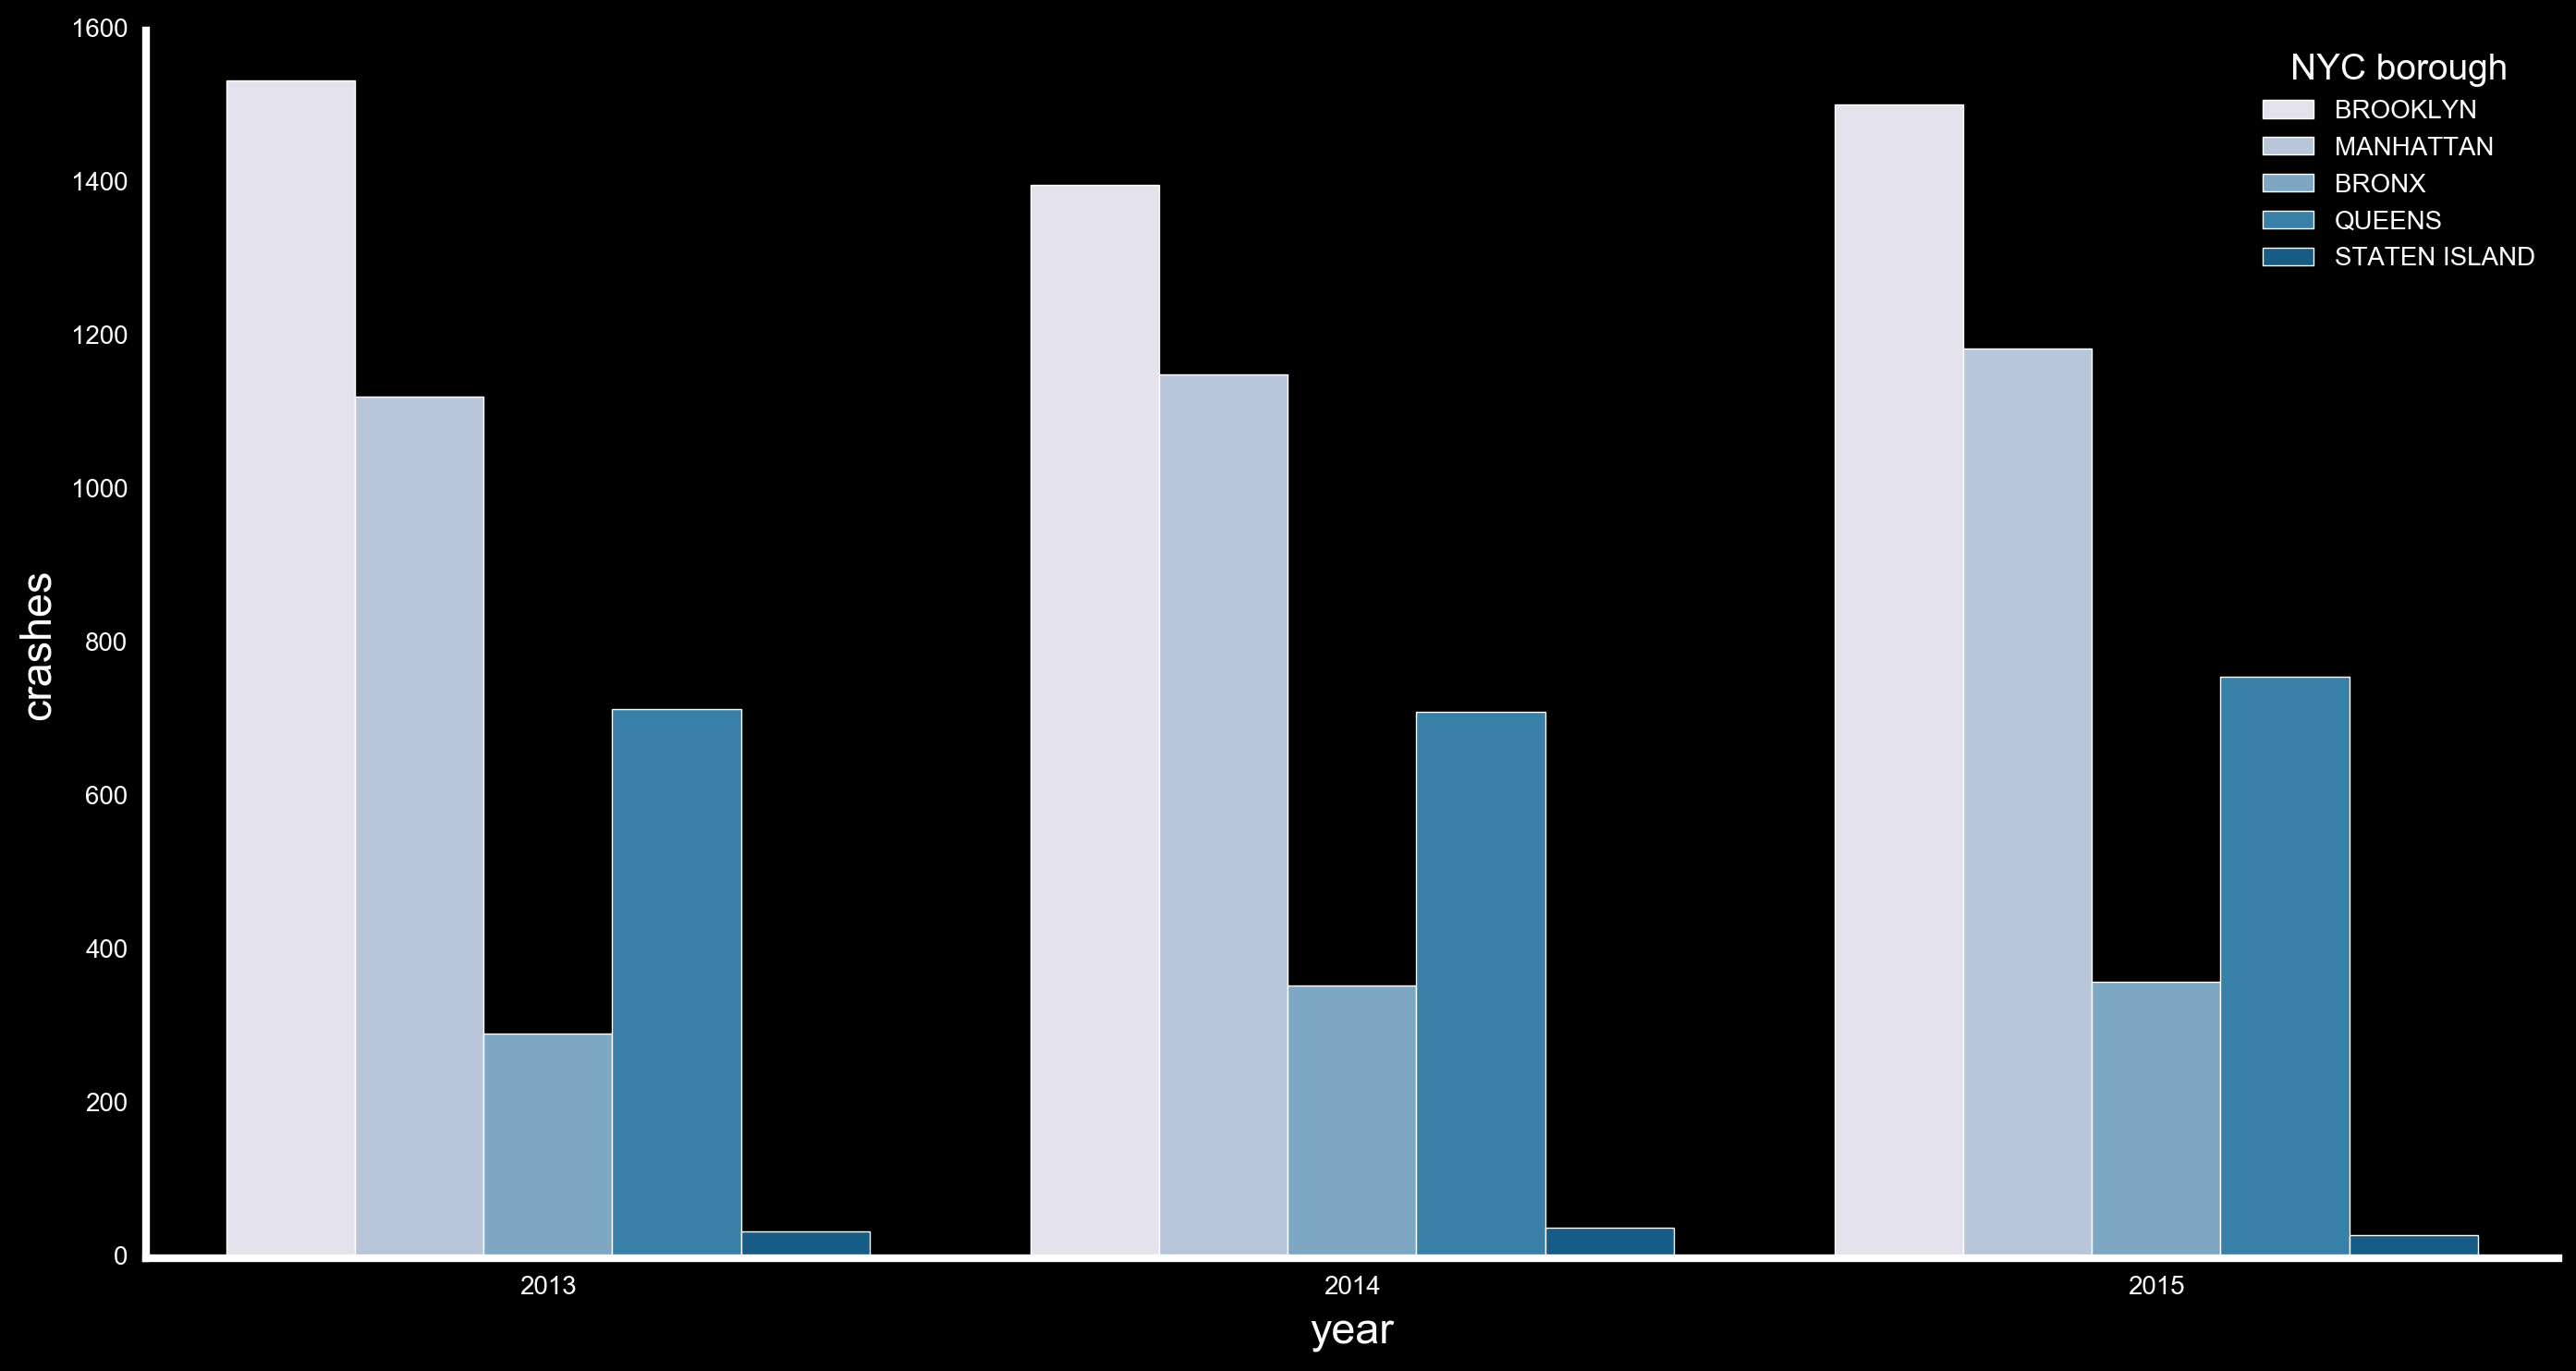

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
plt.style.use('dark_background')
sns.countplot(x='year', data=NY_mask, hue='BOROUGH',palette='PuBu')
ax.set_ylabel('total crashes per year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)
plt.legend(loc='upper right', title='NYC borough')
# ax.set_title('crashes by borough by year')
ax.set_ylabel('crashes')
plt.plot();

- Drilling down into just those injuries that took place in Manhattan

In [10]:
bike_groupby = bike_count.groupby(['Year'], as_index=False)['CyclistVolume'].sum()
bike_groupby

Year  CyclistVolume
0  2013          13760
1  2014          13158
2  2015          16848

In [11]:
NY_manhattan_mask = NY_merged_samp[(NY_merged_samp['BOROUGH'] != 0) & 
                                   (NY_merged_samp['BOROUGH'] == 'MANHATTAN') &
                                   (NY_merged_samp['injuries'] > 0)]
NY_manhattan_groupby = NY_manhattan_mask.groupby(['year'], as_index=False)['injuries'].sum()
bike_groupby['injuries'] = NY_manhattan_groupby['injuries']
bike_groupby['injury_ratio'] = bike_groupby['injuries'] / bike_groupby['CyclistVolume']
print bike_groupby.CyclistVolume.sum()
print bike_groupby.injuries.sum()
bike_groupby

43766
3475


Year  CyclistVolume  injuries  injury_ratio
0  2013          13760      1130      0.082122
1  2014          13158      1155      0.087779
2  2015          16848      1190      0.070632

- Despite the dip in number of cyclists on the road in 2014, the number of accidents increases over the three years.

In [12]:
manhattan_injuries = NY_mask[NY_mask['BOROUGH'] == 'MANHATTAN']
manhattan_injuries_groupby = manhattan_injuries.groupby(['year','month'], as_index=False)['injuries'].sum()
manhattan_injuries_groupby

year  month  injuries
0   2013      1        64
1   2013      2        46
2   2013      3        61
3   2013      4        86
4   2013      5       110
5   2013      6       125
6   2013      7       119
7   2013      8       132
8   2013      9       128
9   2013     10       113
10  2013     11        91
11  2013     12        55
12  2014      1        40
13  2014      2        44
14  2014      3        70
15  2014      4       100
16  2014      5       127
17  2014      6       135
18  2014      7       145
19  2014      8       143
20  2014      9       116
21  2014     10       116
22  2014     11        60
23  2014     12        59
24  2015      1        35
25  2015      2        24
26  2015      3        52
27  2015      4        92
28  2015      5       133
29  2015      6       111
30  2015      7       123
31  2015      8       145
32  2015      9       142
33  2015     10       129
34  2015     11       111
35  2015     12        93

In [13]:
def enter_cyclists(year):
    return (bike_groupby[bike_groupby['Year'] == year]['CyclistVolume'] / 12.0).values[0]

manhattan_injuries_groupby['cyclists'] = manhattan_injuries_groupby['year'].apply(enter_cyclists)

In [14]:
manhattan_injuries_groupby['injury_ratio'] = manhattan_injuries_groupby['injuries'] / manhattan_injuries_groupby['cyclists']

In [15]:
manhattan_injuries_groupby

year  month  injuries     cyclists  injury_ratio
0   2013      1        64  1146.666667      0.055814
1   2013      2        46  1146.666667      0.040116
2   2013      3        61  1146.666667      0.053198
3   2013      4        86  1146.666667      0.075000
4   2013      5       110  1146.666667      0.095930
5   2013      6       125  1146.666667      0.109012
6   2013      7       119  1146.666667      0.103779
7   2013      8       132  1146.666667      0.115116
8   2013      9       128  1146.666667      0.111628
9   2013     10       113  1146.666667      0.098547
10  2013     11        91  1146.666667      0.079360
11  2013     12        55  1146.666667      0.047965
12  2014      1        40  1096.500000      0.036480
13  2014      2        44  1096.500000      0.040128
14  2014      3        70  1096.500000      0.063839
15  2014      4       100  1096.500000      0.091199
16  2014      5       127  1096.500000      0.115823
17  2014      6       135  1096.500000      0.123119
18  2014      7       145  1096.500000      0.132239
19  2014      8       143  1096.500000      0.130415
20  2014      9       116  1096.500000      0.105791
21  2014     10       116  1096.500000      0.105791
22  2014     11        60  1096.500000      0.054720
23  2014     12        59  1096.500000      0.053808
24  2015      1        35  1404.000000      0.024929
25  2015      2        24  1404.000000      0.017094
26  2015      3        52  1404.000000      0.037037
27  2015      4        92  1404.000000      0.065527
28  2015      5       133  1404.000000      0.094729
29  2015      6       111  1404.000000      0.079060
30  2015      7       123  1404.000000      0.087607
31  2015      8       145  1404.000000      0.103276
32  2015      9       142  1404.000000      0.101140
33  2015     10       129  1404.000000      0.091880
34  2015     11       111  1404.000000      0.079060
35  2015     12        93  1404.000000      0.066239

In [ ]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='month', y='injury_ratio', data=manhattan_injuries_groupby, hue='year', ax=ax,markers='.',linestyles='--', palette='GnBu')
ax.set_ylabel('crash ratio')
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.plot();

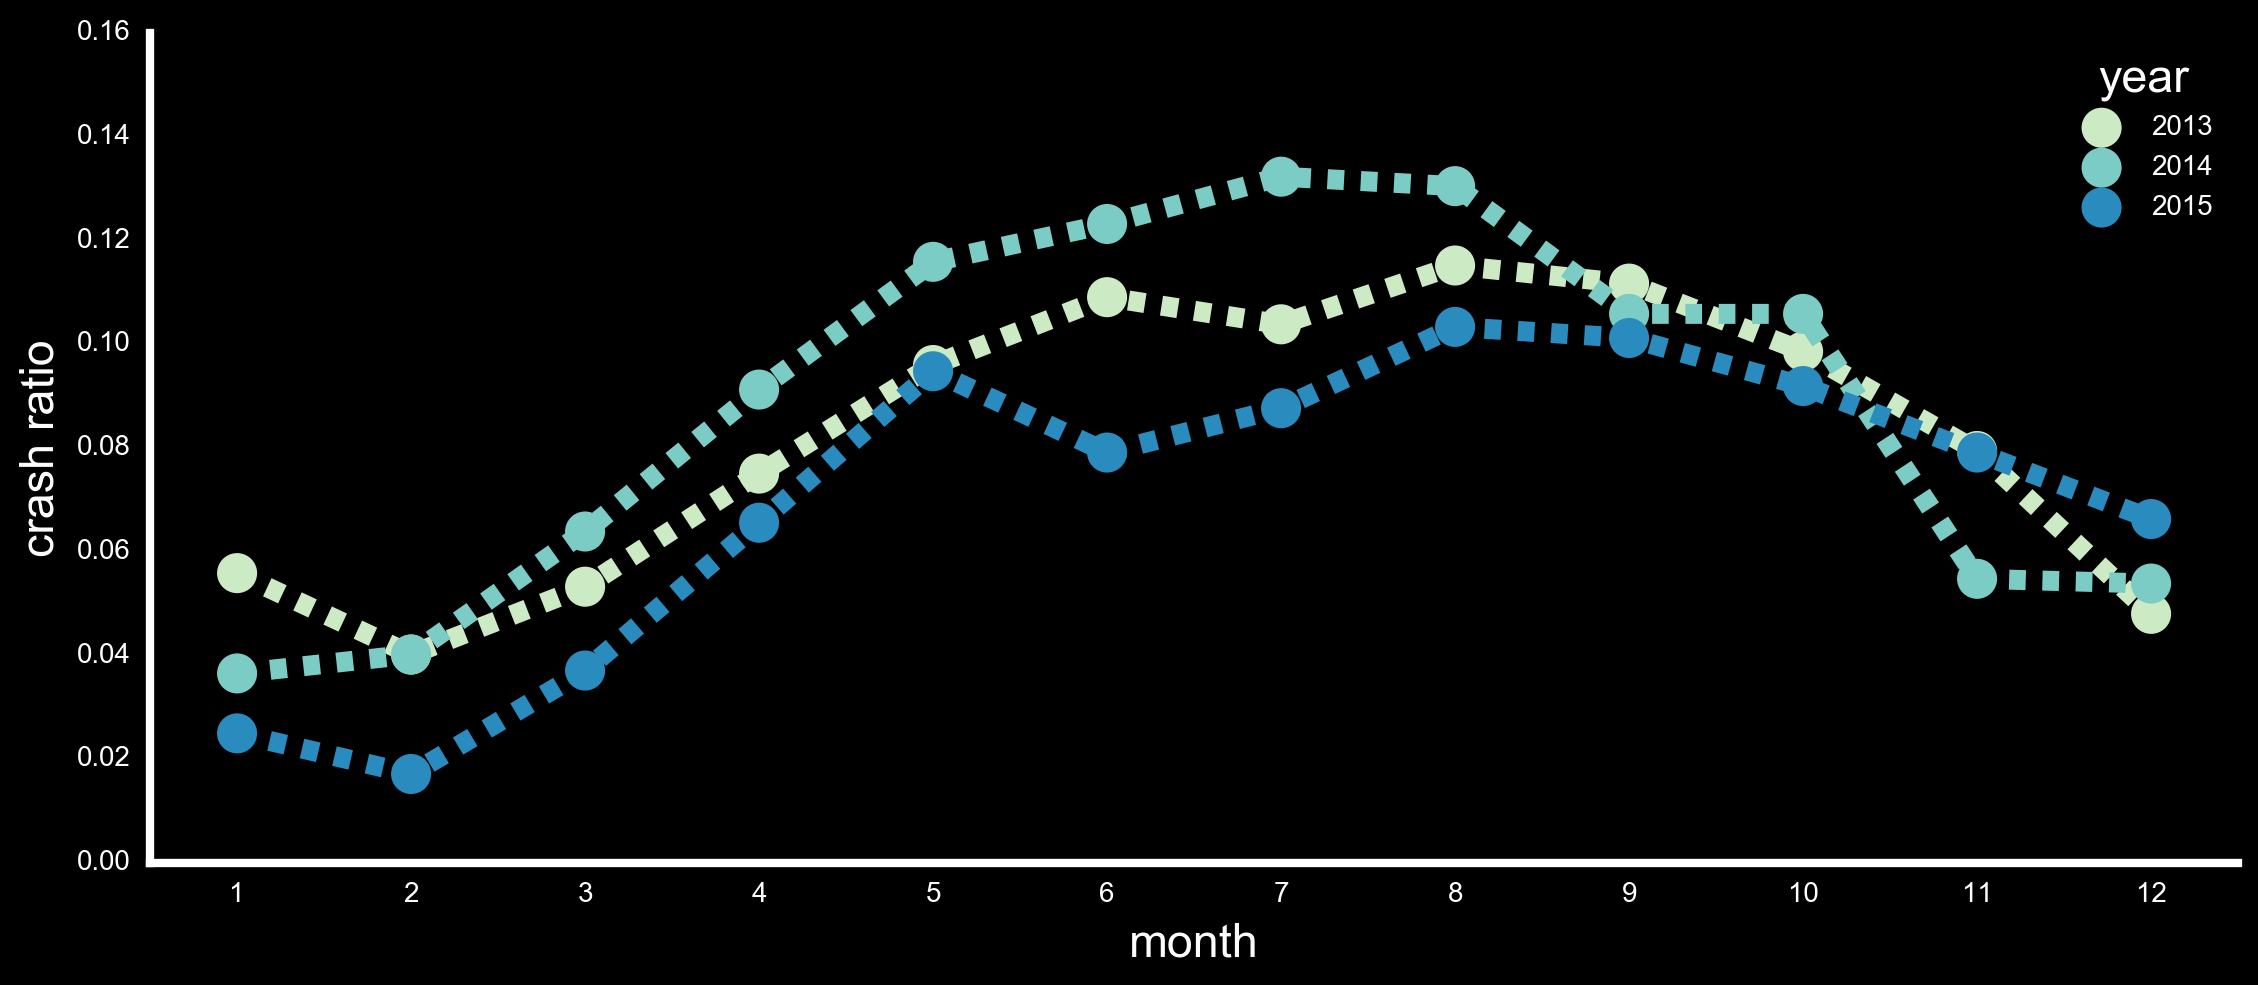

In [63]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='month', y='injury_ratio', data=manhattan_injuries_groupby, hue='year', ax=ax,markers='.',linestyles='--', palette='GnBu')
ax.set_ylabel('crash ratio')
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.plot();

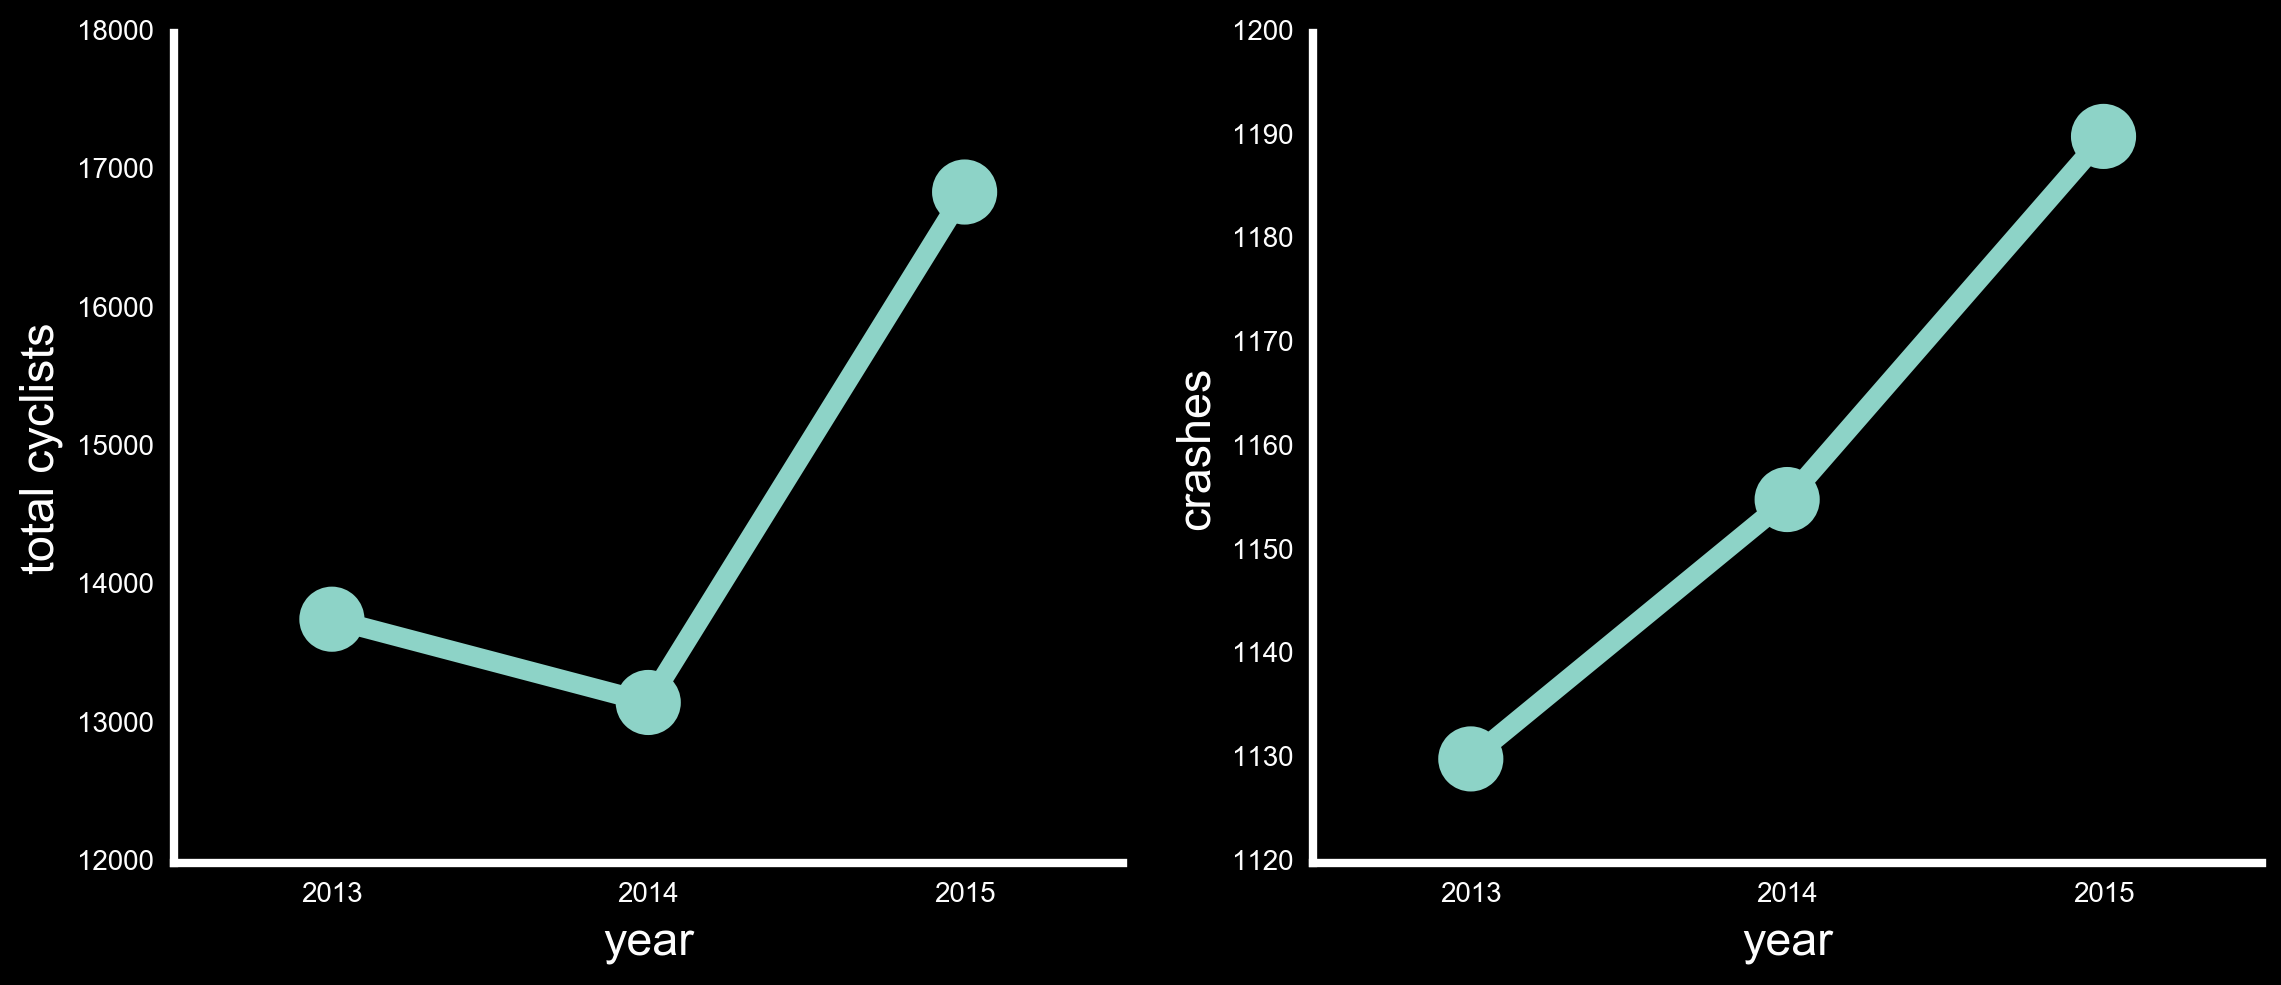

In [56]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

fig, (ax, ax1) = plt.subplots(ncols=2, sharey=False, figsize=(12,5))
sns.pointplot(x='year', y='total_cyclists', data=count_group, ax=ax)
sns.pointplot(x='year', y='injuries', data=NY_manhattan_groupby, ax=ax1)
ax.legend(loc='upper right')
ax.set_ylabel('total cyclists')
# ax.set_title('manhattan cyclists per year')
ax1.set_ylabel('crashes')
# ax1.set_title('manhattan crashes per year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')
ax.grid(False)
ax1.grid(False)
plt.legend(loc='upper left')
plt.plot();

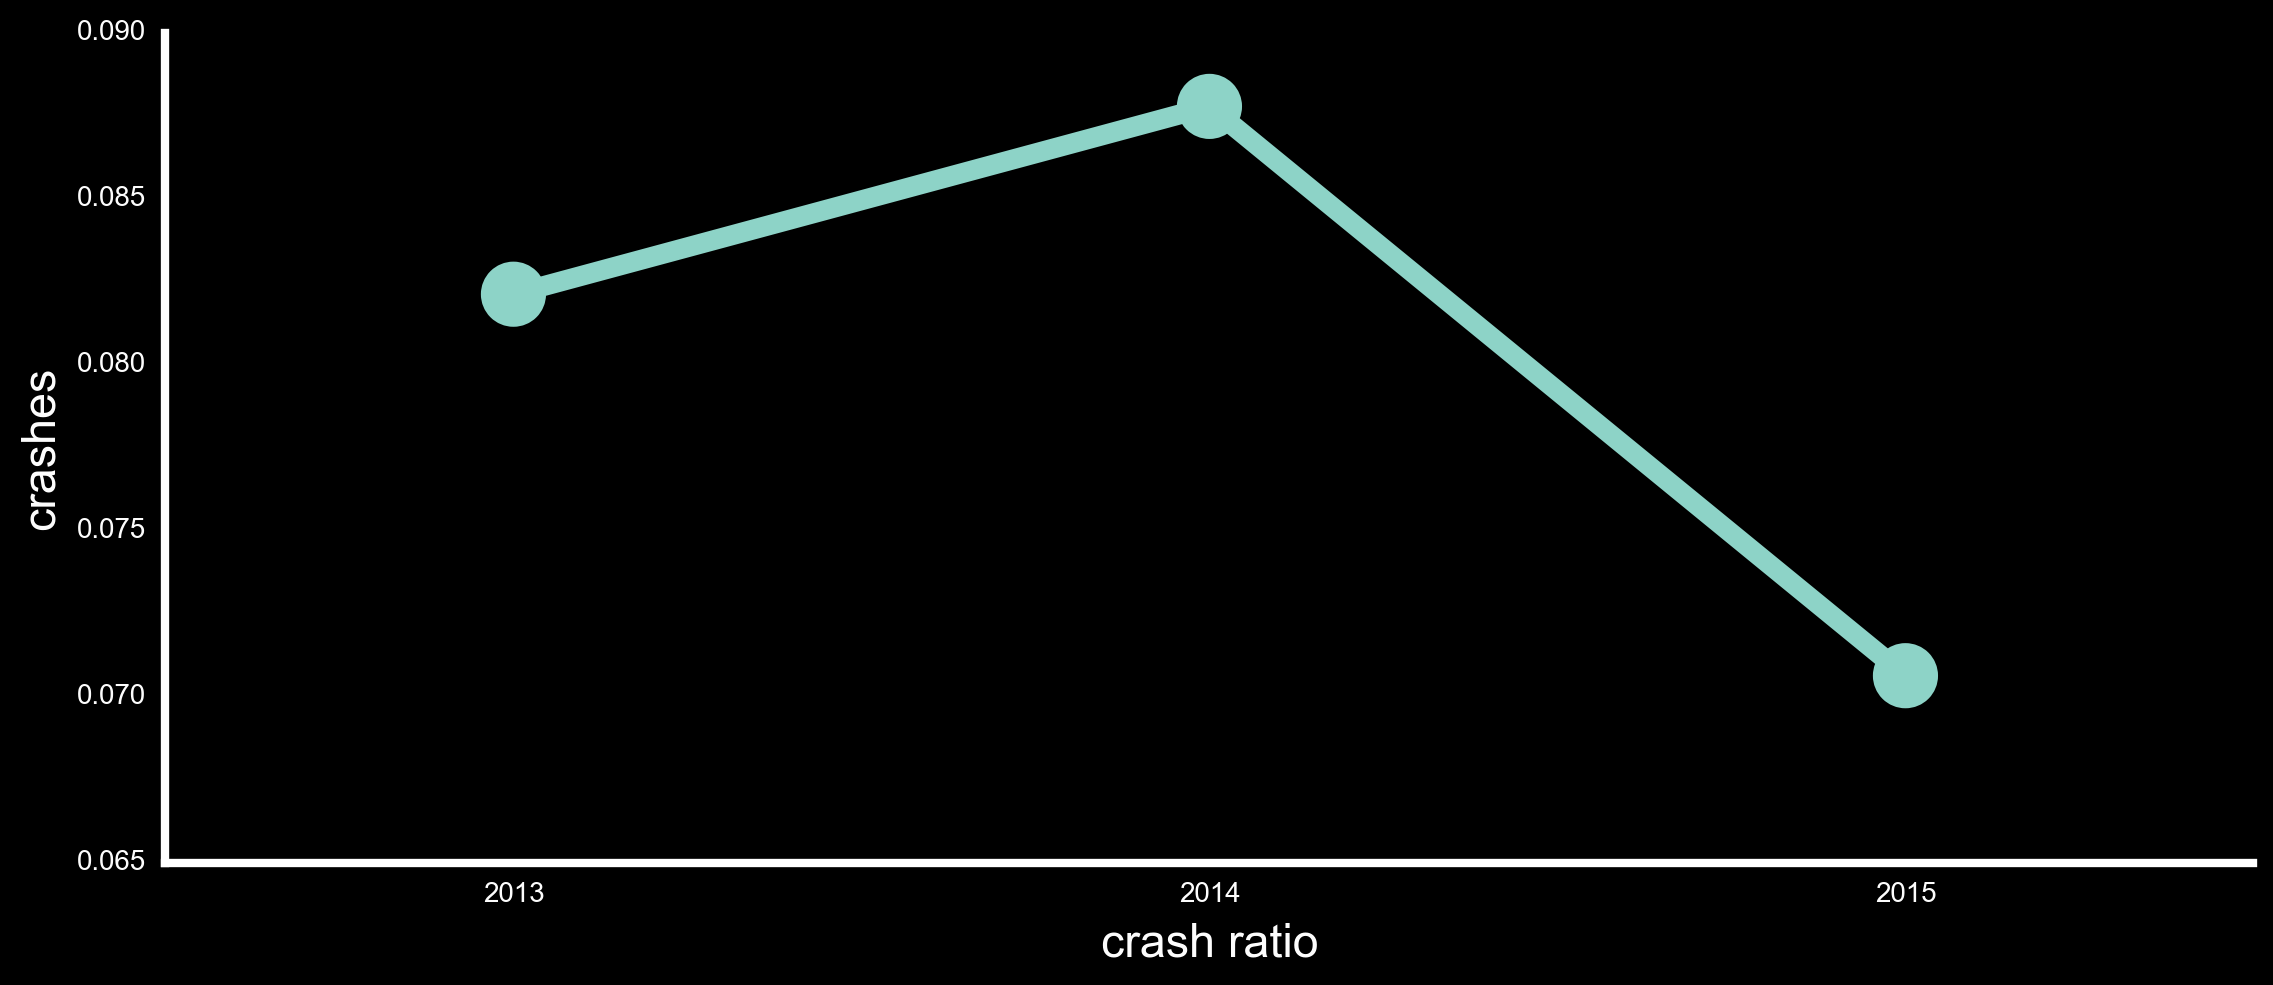

In [53]:
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(x='Year', y='injury_ratio', data=bike_groupby, ax=ax)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_ylabel('crashes')
# ax.set_title('manhattan crash ratio')
ax.set_xlabel('crash ratio')
plt.plot();

In [27]:
manhattan_weather_group = manhattan_df.groupby(['year'], as_index=False)[['precip', 'clouds', 'mean_visible']].mean()
manhattan_weather_group

year    precip    clouds  mean_visible
0  2013  0.142151  3.277605      8.584891
1  2014  0.158023  3.364511      8.502534
2  2015  0.118060  3.105960      8.434078

In [28]:
## creating the features in the dataframe so I can then plot out the different ratios: 
## % of cyclists injured, % of male vs. female cyclists wearing a helmet
## also want to see if there's any relationship between the injury ratio and the different weather features for manhattan

manhattan_injury_ratio_df = manhattan_df.groupby(['year'], as_index=False)['injuries','deaths'].sum()
manhattan_injury_ratio_df['m_cyclists'] = bike_helmet_group['MaleCyc_Total']
manhattan_injury_ratio_df['f_cyclists'] = bike_helmet_group['FemaleCyc_Total']
manhattan_injury_ratio_df['total_cyclists'] = bike_helmet_group['CyclistVolume']
manhattan_injury_ratio_df['m_helmets'] = bike_helmet_group['Male_Cyc_Helmet']
manhattan_injury_ratio_df['f_helmets'] = bike_helmet_group['Female_Cyc_Helmet']
manhattan_injury_ratio_df['precip'] = manhattan_weather_group['precip']
manhattan_injury_ratio_df['clouds'] = manhattan_weather_group['clouds']
manhattan_injury_ratio_df['visibility'] = manhattan_weather_group['mean_visible']

In [29]:
manhattan_injury_ratio_df['injury_ratio'] = manhattan_injury_ratio_df['injuries'] / manhattan_injury_ratio_df['total_cyclists']
manhattan_injury_ratio_df['m_helmet_ratio'] = manhattan_injury_ratio_df['m_helmets'] / manhattan_injury_ratio_df['m_cyclists']
manhattan_injury_ratio_df['f_helmet_ratio'] = manhattan_injury_ratio_df['f_helmets'] / manhattan_injury_ratio_df['f_cyclists']

In [30]:
manhattan_injury_ratio_df

year  injuries  deaths  m_cyclists  f_cyclists  total_cyclists  m_helmets  \
0  2013      1130       2       10756        3004           13760       4744   
1  2014      1155       5       10407        2751           13158       4510   
2  2015      1190       1       13539        3309           16848       5303   

   f_helmets    precip    clouds  visibility  injury_ratio  m_helmet_ratio  \
0       1494  0.142151  3.277605    8.584891      0.082122        0.441056   
1       1369  0.158023  3.364511    8.502534      0.087779        0.433362   
2       1477  0.118060  3.105960    8.434078      0.070632        0.391683   

   f_helmet_ratio  
0        0.497337  
1        0.497637  
2        0.446358

- Plotting the weather heatmap. Click the below link for an interactive map

# [click for a map of NYC's precipitation levels](https://cdn.rawgit.com/seporter11/DSI-SF-4-seporter11/68119fae/NYC_folium_weather_map.html)

# [click for additional EDA analysis](https://github.com/seporter11/DSI-SF-4-seporter11/blob/master/NYCycling%20EDA.ipynb)

# Now I want to take a look at the data but segmenting it by borough

I need to mask the dataframes to only include crashes that involve a cycling injury, and then group each by the following features: 

- 'ON_STREET_NAME','CROSS_STREET_NAME','LATITUDE', 'LONGITUDE'

- I'm interested in which crash sites are the most dangerous for cyclists, but given the limited amount of time I have, I'll limit my research to just the top 5 most dangerous.

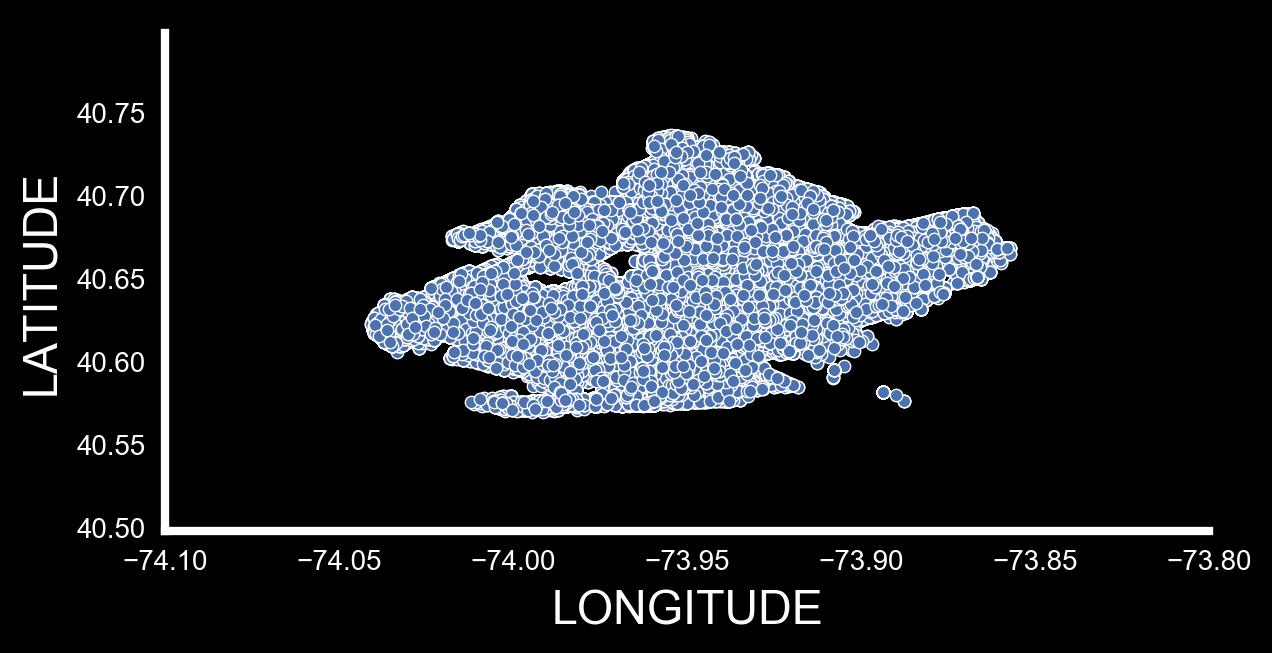

In [35]:
fig, ax = plt.subplots(figsize=(6,3))
brooklyn_df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot();

In [36]:
brooklyn_injuries = brooklyn_df[brooklyn_df['injuries'] > 0]
brooklyn_injuries_groupby = brooklyn_injuries.groupby(['ON_STREET_NAME','CROSS_STREET_NAME','LATITUDE', 'LONGITUDE'],as_index=False)[['injuries']].sum()
brooklyn_injuries_groupby = brooklyn_injuries_groupby.sort_values(by='injuries', ascending=False)
brooklyn_injuries_groupby = brooklyn_injuries_groupby.head()
brooklyn_injuries_groupby['crash_site'] = brooklyn_injuries_groupby['ON_STREET_NAME'] + ' & ' + brooklyn_injuries_groupby['CROSS_STREET_NAME']
print 'shape of brooklyn df:' 
brooklyn_injuries_groupby.shape
brooklyn_injuries_groupby.head()

shape of brooklyn df:


(5, 6)

ON_STREET_NAME  CROSS_STREET_NAME   LATITUDE  LONGITUDE  injuries  \
1854     GRAND STREET     LORIMER STREET  40.711167 -73.948892        13   
1861     GRAND STREET       UNION AVENUE  40.710957 -73.951117        11   
824    BEDFORD AVENUE    ATLANTIC AVENUE  40.678723 -73.952987        11   
1751    FULTON STREET    FRANKLIN AVENUE  40.681137 -73.955668         9   
606   ATLANTIC AVENUE  VANDERBILT AVENUE  40.681769 -73.967533         8   

                               crash_site  
1854        GRAND STREET & LORIMER STREET  
1861          GRAND STREET & UNION AVENUE  
824      BEDFORD AVENUE & ATLANTIC AVENUE  
1751      FULTON STREET & FRANKLIN AVENUE  
606   ATLANTIC AVENUE & VANDERBILT AVENUE

# [click for a map of Brooklyn's top crash sites](https://cdn.rawgit.com/seporter11/DSI-SF-4-seporter11/bb96cbf9/brooklyn_crashes_new.html)

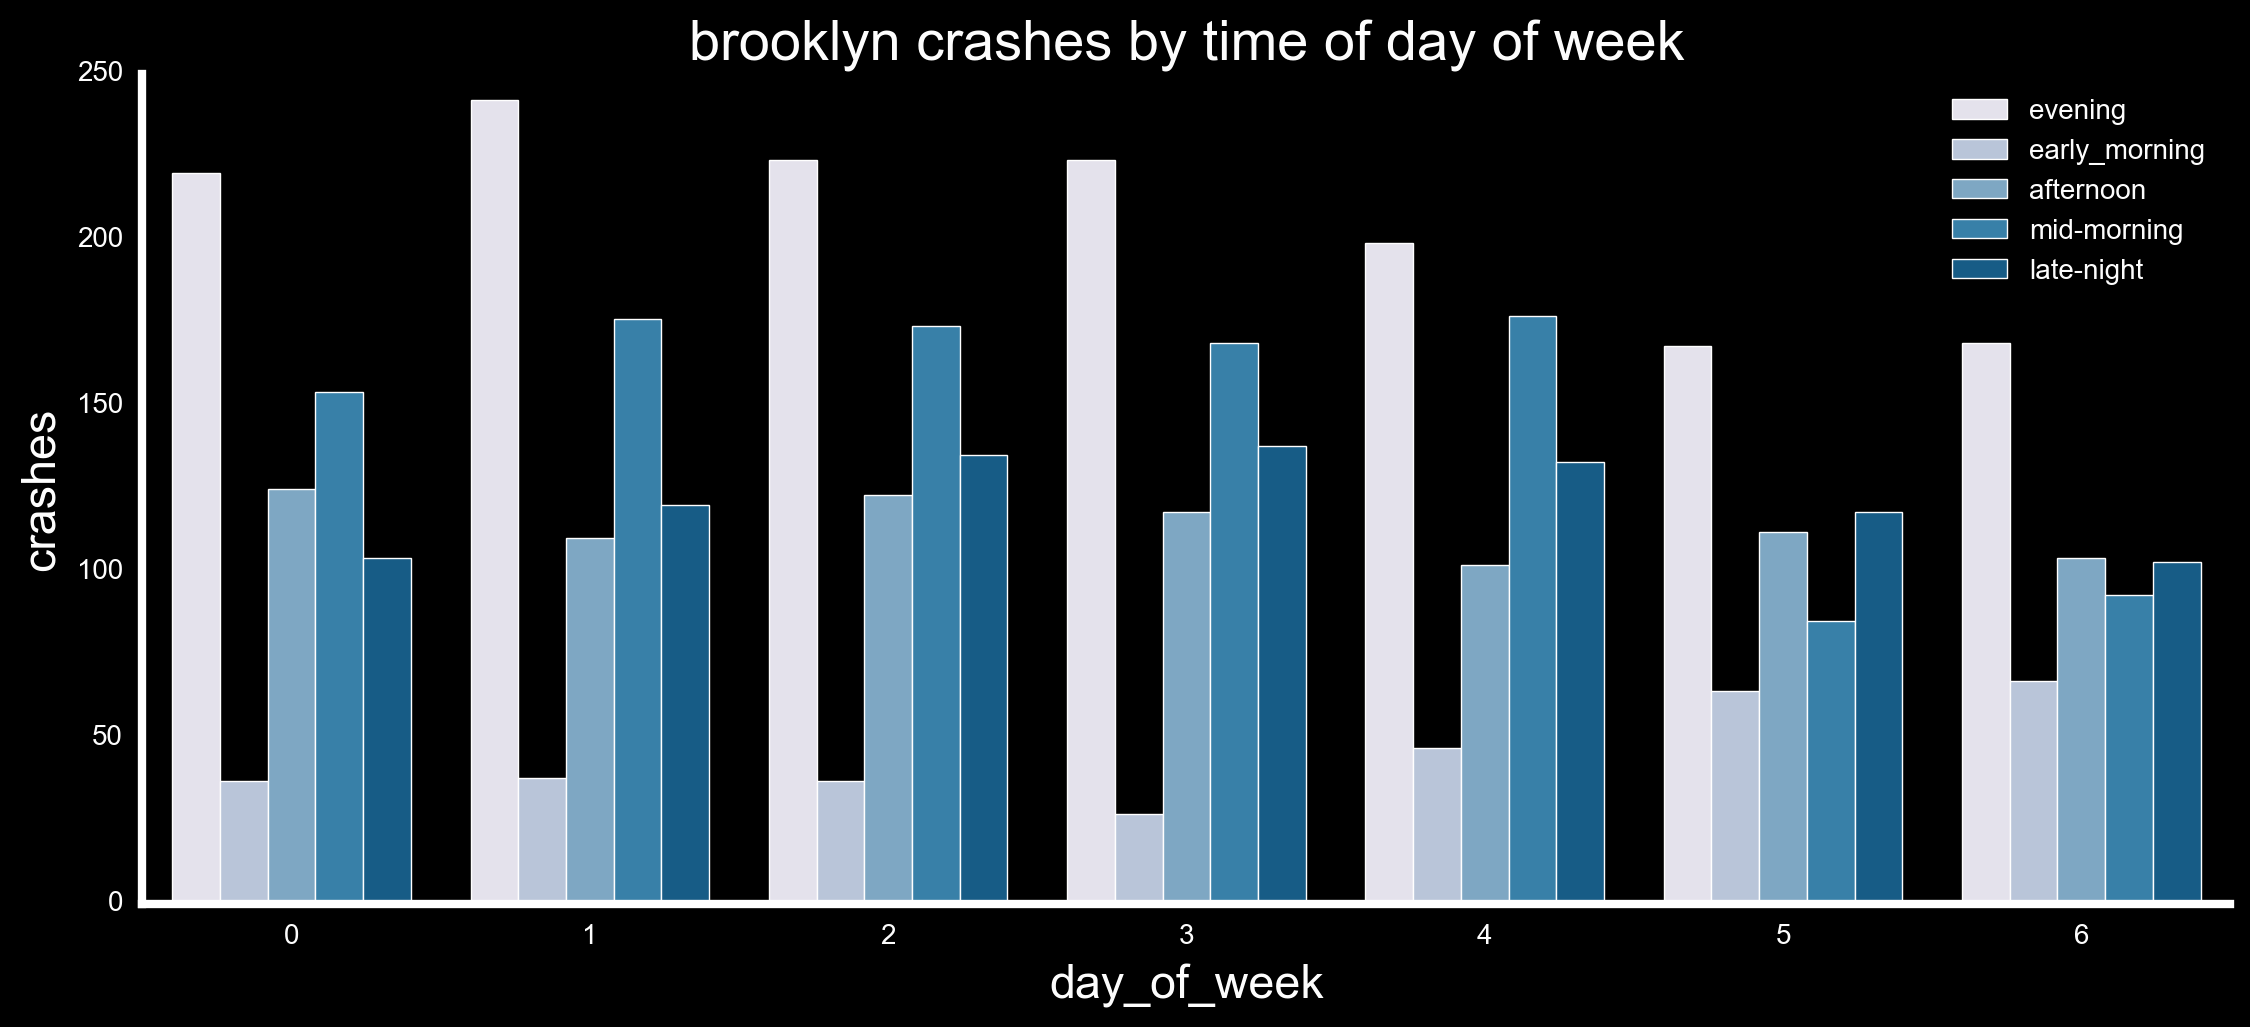

In [65]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='day_of_week',data=brooklyn_injuries,hue='time_segment',ax=ax, palette='PuBu')
ax.set_ylabel('crashes')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('brooklyn crashes by time of day of week')
ax.legend(loc='upper right')
plt.plot();

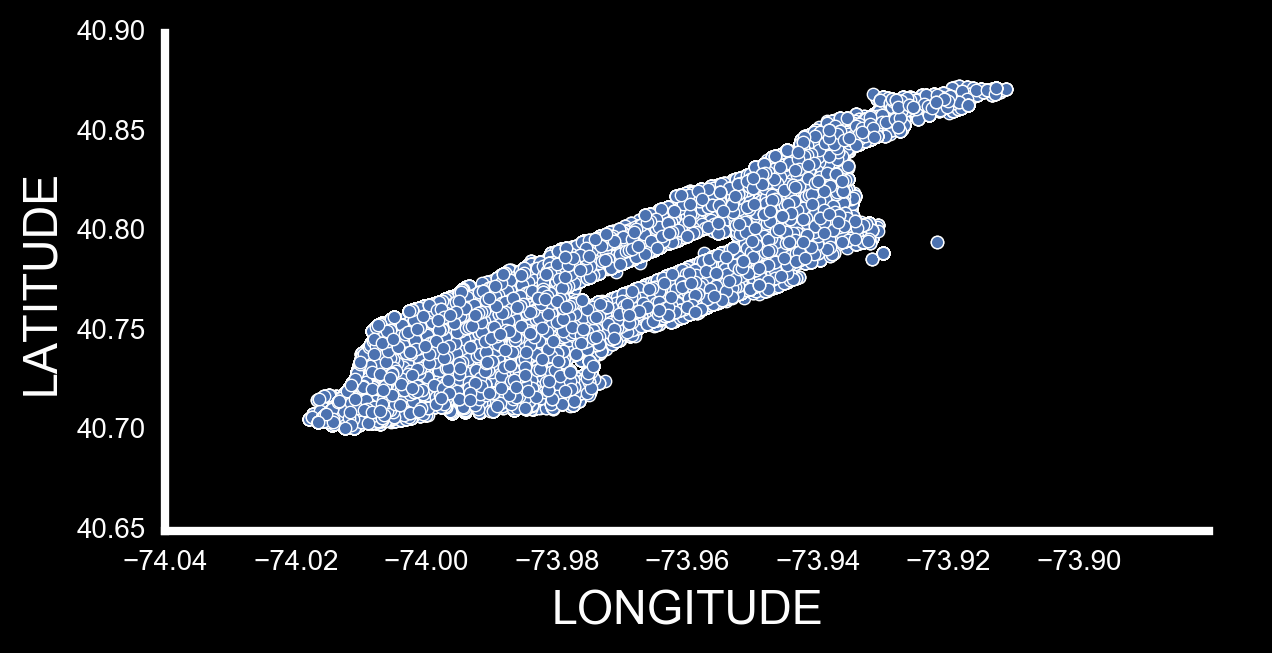

In [66]:
fig, ax = plt.subplots(figsize=(6,3))
manhattan_df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot();

In [16]:
manhattan_injuries = manhattan_df[manhattan_df['injuries'] > 0]
manhattan_injuries_groupby = manhattan_injuries.groupby(['ON_STREET_NAME','CROSS_STREET_NAME','LATITUDE', 'LONGITUDE'],as_index=False)[['injuries']].sum()
manhattan_injuries_groupby = manhattan_injuries_groupby.sort_values(by='injuries', ascending=False)
manhattan_injuries_groupby = manhattan_injuries_groupby.head()
manhattan_injuries_groupby['crash_site'] = manhattan_injuries_groupby['ON_STREET_NAME'] + ' & ' + manhattan_injuries_groupby['CROSS_STREET_NAME']
print 'shape of manhattan df:' 
manhattan_injuries_groupby.shape
manhattan_injuries_groupby.head()

shape of manhattan df:


(5, 6)

ON_STREET_NAME CROSS_STREET_NAME   LATITUDE  LONGITUDE  injuries  \
1649  WEST 110 STREET  MANHATTAN AVENUE  40.801155 -73.959648        10   
864    EAST 14 STREET          5 AVENUE  40.736005 -73.993617         9   
809   EAST 116 STREET  LEXINGTON AVENUE  40.798622 -73.941619         9   
1998   WEST 42 STREET          9 AVENUE  40.758429 -73.992633         8   
1754   WEST 14 STREET          8 AVENUE  40.739751 -74.002522         8   

                              crash_site  
1649  WEST 110 STREET & MANHATTAN AVENUE  
864            EAST 14 STREET & 5 AVENUE  
809   EAST 116 STREET & LEXINGTON AVENUE  
1998           WEST 42 STREET & 9 AVENUE  
1754           WEST 14 STREET & 8 AVENUE

# [click for a map of Manhattan's top crash sites](https://cdn.rawgit.com/seporter11/DSI-SF-4-seporter11/fdb49ef5/manhattan_crashes_new.html)

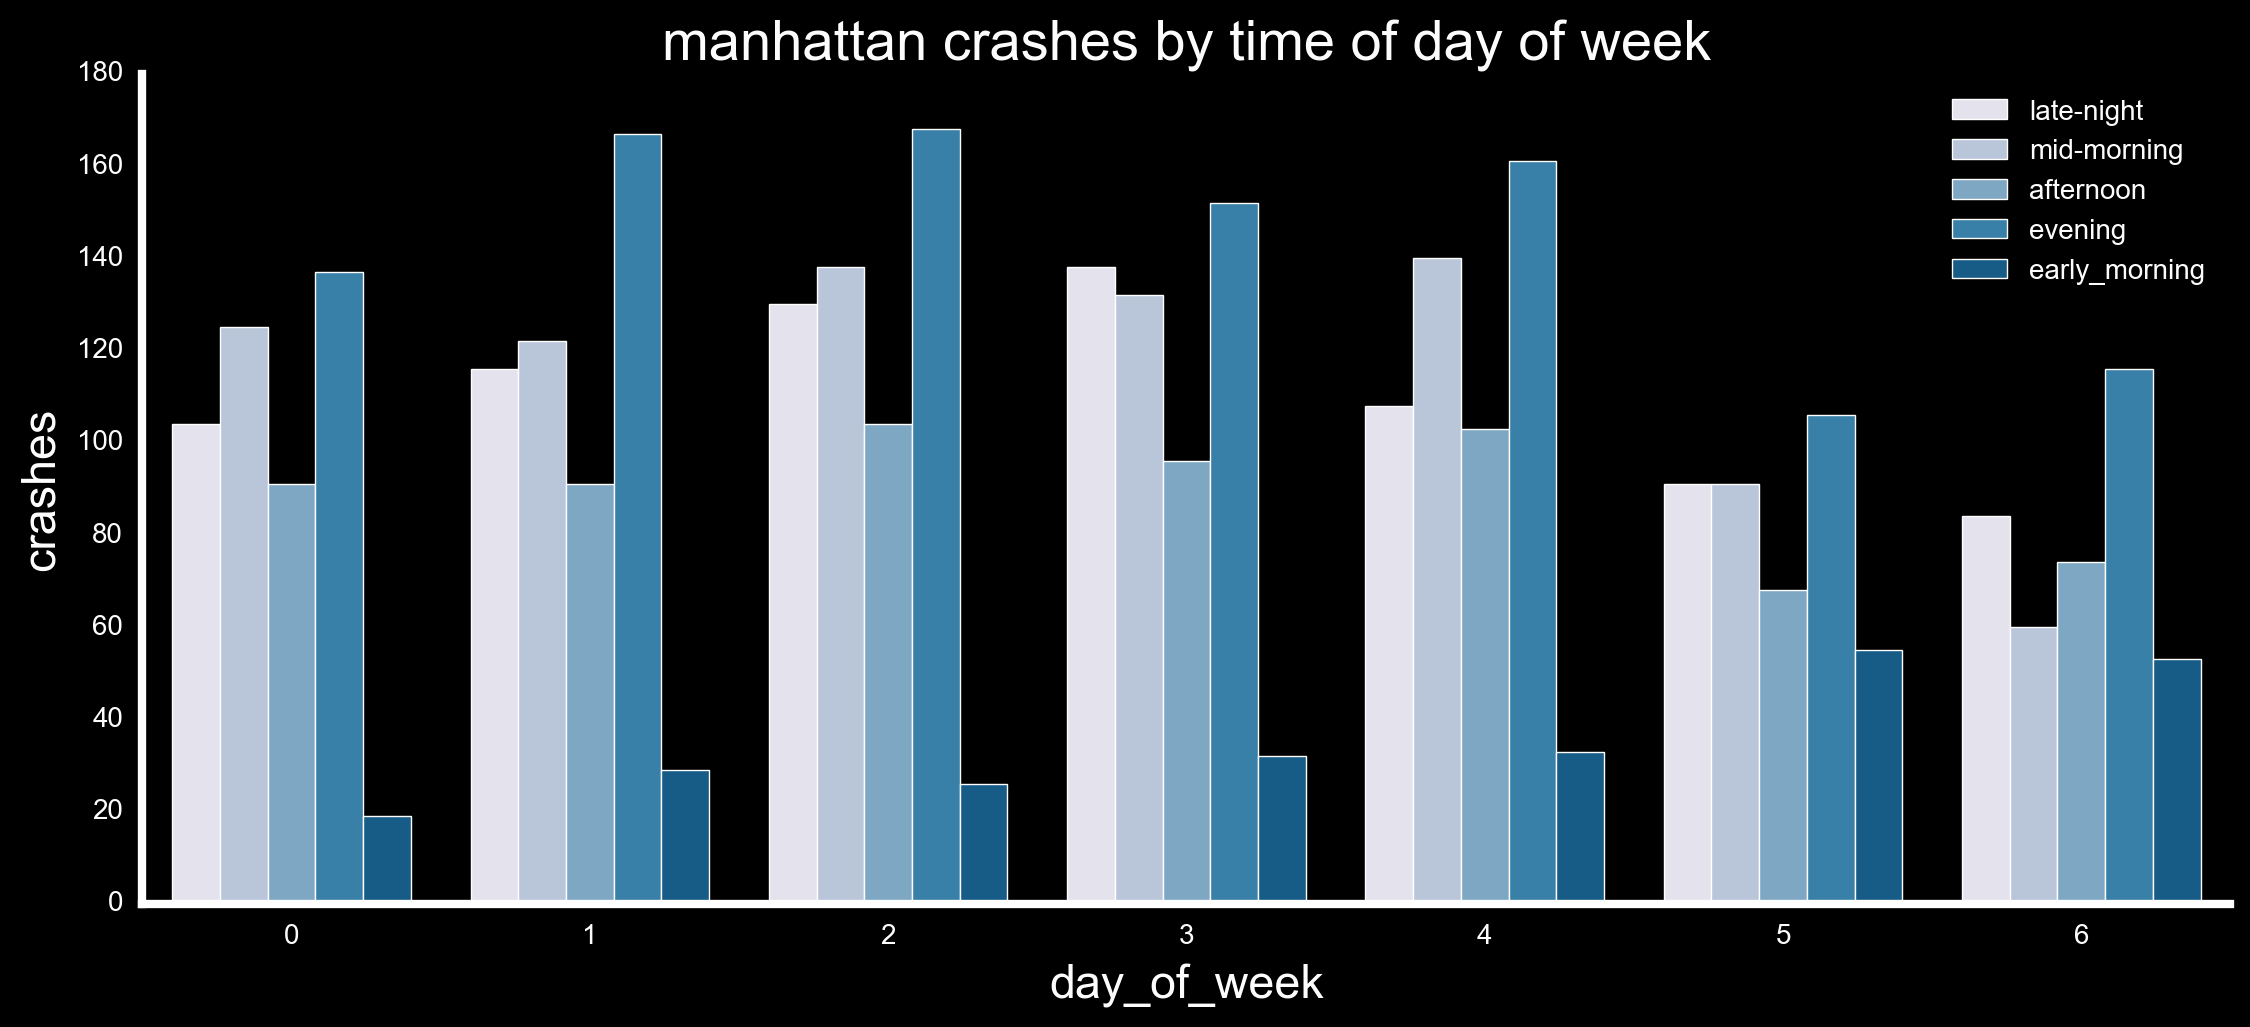

In [69]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='day_of_week',data=manhattan_injuries,hue='time_segment',ax=ax, palette='PuBu')
ax.set_ylabel('crashes')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('manhattan crashes by time of day of week')
ax.legend(loc='upper right')
plt.plot();

In [42]:
bronx_df = bronx_df[bronx_df['LONGITUDE'] < 0]

In [43]:
bronx_df

DATE  TIME BOROUGH  ZIP_CODE   LATITUDE  LONGITUDE  \
100536 2013-01-01  17.0   BRONX   10452.0  40.832628 -73.925375   
100541 2013-01-01  17.0   BRONX   10466.0  40.892477 -73.854492   
100548 2013-01-01   1.0   BRONX   10461.0  40.847334 -73.831365   
100549 2013-01-01   1.0   BRONX   10457.0  40.850713 -73.894073   
100559 2013-01-01  19.0   BRONX   10461.0  40.846847 -73.832497   
100570 2013-01-01  18.0   BRONX   10457.0  40.854117 -73.890901   
100590 2013-01-01   2.0   BRONX   10451.0  40.825116 -73.925401   
100608 2013-01-01  22.0   BRONX   10452.0  40.844344 -73.914743   
100611 2013-01-01   0.0   BRONX   10469.0  40.873302 -73.853638   
100624 2013-01-01  13.0   BRONX   10459.0  40.821069 -73.898933   
100627 2013-01-01  15.0   BRONX   10467.0  40.867822 -73.863444   
100652 2013-01-01   7.0   BRONX   10453.0  40.847682 -73.912364   
100658 2013-01-01  14.0   BRONX   10472.0  40.826402 -73.875800   
100672 2013-01-01  14.0   BRONX   10467.0  40.871288 -73.880236   
100697 2013-01-01   6.0   BRONX   10451.0  40.827252 -73.917532   
100715 2013-01-01   5.0   BRONX   10461.0  40.852357 -73.829660   
100720 2013-01-01  11.0   BRONX   10469.0  40.868545 -73.839052   
100730 2013-01-01   8.0   BRONX   10454.0  40.803594 -73.919780   
100749 2013-01-01  23.0   BRONX   10469.0  40.862598 -73.831521   
100750 2013-01-01   2.0   BRONX   10463.0  40.887081 -73.904135   
100798 2013-01-01  17.0   BRONX   10462.0  40.844681 -73.861186   
100802 2013-01-01   6.0   BRONX   10455.0  40.820174 -73.915901   
100820 2013-01-01   5.0   BRONX   10459.0  40.826012 -73.886351   
100824 2013-01-01   3.0   BRONX   10469.0  40.883153 -73.856278   
100841 2013-01-01   2.0   BRONX   10461.0  40.839170 -73.836282   
100843 2013-01-01   5.0   BRONX   10461.0  40.840216 -73.848434   
100869 2013-01-01   1.0   BRONX   10457.0  40.839769 -73.905385   
100873 2013-01-01   1.0   BRONX   10456.0  40.822714 -73.903140   
100881 2013-01-01   7.0   BRONX   10468.0  40.875196 -73.888556   
100889 2013-01-01   7.0   BRONX   10453.0  40.848608 -73.913967   
...           ...   ...     ...       ...        ...        ...   
727439 2015-12-31  14.0   BRONX   10452.0  40.841771 -73.925487   
727473 2015-12-31  16.0   BRONX   10466.0  40.889223 -73.859682   
727475 2015-12-31  16.0   BRONX   10460.0  40.841087 -73.864478   
727483 2015-12-31  16.0   BRONX   10473.0  40.815418 -73.845073   
727488 2015-12-31  14.0   BRONX   10456.0  40.823337 -73.905733   
727495 2015-12-31  16.0   BRONX   10457.0  40.847667 -73.901022   
727503 2015-12-31  14.0   BRONX   10468.0  40.862755 -73.901079   
727510 2015-12-31  19.0   BRONX   10458.0  40.858764 -73.897357   
727515 2015-12-31  12.0   BRONX   10454.0  40.805491 -73.910303   
727533 2015-12-31  22.0   BRONX   10451.0  40.818560 -73.927316   
727534 2015-12-31  22.0   BRONX   10465.0  40.878290 -73.870058   
727536 2015-12-31  22.0   BRONX   10459.0  40.826743 -73.887897   
727545 2015-12-31  12.0   BRONX   10463.0  40.877238 -73.917800   
727551 2015-12-31   7.0   BRONX   10458.0  40.856245 -73.895579   
727556 2015-12-31   8.0   BRONX   10470.0  40.907219 -73.850401   
727561 2015-12-31   5.0   BRONX   10463.0  40.875683 -73.908378   
727567 2015-12-31  15.0   BRONX   10472.0  40.830798 -73.853930   
727570 2015-12-31   8.0   BRONX   10452.0  40.835052 -73.926138   
727571 2015-12-31  10.0   BRONX   10452.0  40.838127 -73.919308   
727580 2015-12-31  14.0   BRONX   10469.0  40.865229 -73.844364   
727586 2015-12-31  16.0   BRONX   10461.0  40.847510 -73.853636   
727610 2015-12-31   9.0   BRONX   10466.0  40.892905 -73.843655   
727616 2015-12-31  20.0   BRONX   10468.0  40.870391 -73.901523   
727626 2015-12-31   8.0   BRONX   10473.0  40.823605 -73.852255   
727628 2015-12-31   7.0   BRONX   10453.0  40.849440 -73.918409   
727629 2015-12-31  15.0   BRONX   10455.0  40.813694 -73.901831   
727635 2015-12-31   2.0   BRONX   10469.0  40.878210 -73.856078   
727642 2015-12-31   2.0   BRONX   10466.0  40.891113 -73.863

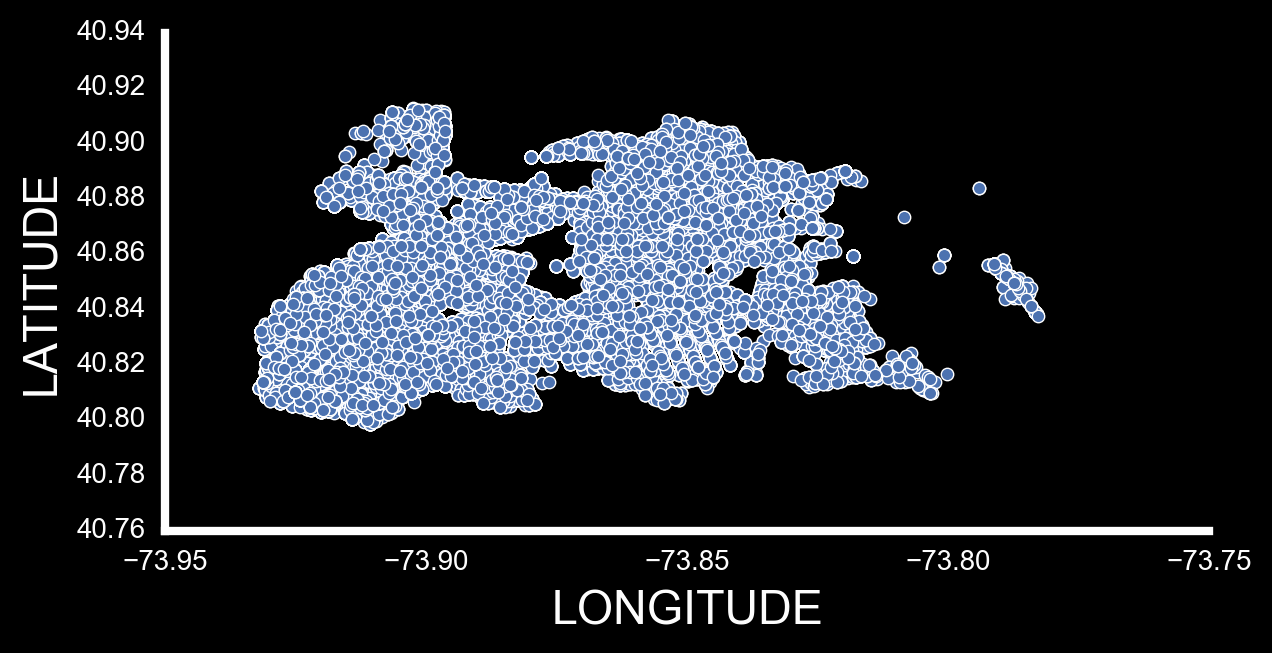

In [44]:
fig, ax = plt.subplots(figsize=(6,3))
bronx_df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot();

In [45]:
bronx_injuries = bronx_df[bronx_df['injuries'] > 0]
bronx_injuries_groupby = bronx_injuries.groupby(['ON_STREET_NAME','CROSS_STREET_NAME','LATITUDE', 'LONGITUDE'],as_index=False)[['injuries','deaths']].sum()
bronx_injuries_groupby = bronx_injuries_groupby.sort_values(by='injuries', ascending=False)
bronx_injuries_groupby = bronx_injuries_groupby.head()
bronx_injuries_groupby['crash_site'] = bronx_injuries_groupby['ON_STREET_NAME'] + ' & ' + bronx_injuries_groupby['CROSS_STREET_NAME']
print 'shape of bronx df:'
bronx_injuries_groupby.shape
bronx_injuries_groupby.head()

shape of bronx df:


(5, 7)

ON_STREET_NAME CROSS_STREET_NAME   LATITUDE  LONGITUDE  injuries  \
115  BRUCKNER BOULEVARD    LEGGETT AVENUE  40.813095 -73.898259         4   
170     EAST 138 STREET     WILLIS AVENUE  40.809107 -73.922887         4   
186     EAST 149 STREET     MORRIS AVENUE  40.817388 -73.922758         4   
356   EAST FORDHAM ROAD   GRAND CONCOURSE  40.862444 -73.897142         4   
450     GRAND CONCOURSE   EAST 184 STREET  40.859309 -73.898839         4   

     deaths                           crash_site  
115       0  BRUCKNER BOULEVARD & LEGGETT AVENUE  
170       0      EAST 138 STREET & WILLIS AVENUE  
186       0      EAST 149 STREET & MORRIS AVENUE  
356       0  EAST FORDHAM ROAD & GRAND CONCOURSE  
450       0    GRAND CONCOURSE & EAST 184 STREET

# [click for a map of Bronx's top crash sites](https://cdn.rawgit.com/seporter11/DSI-SF-4-seporter11/2e073dda/bronx_crashes.html)

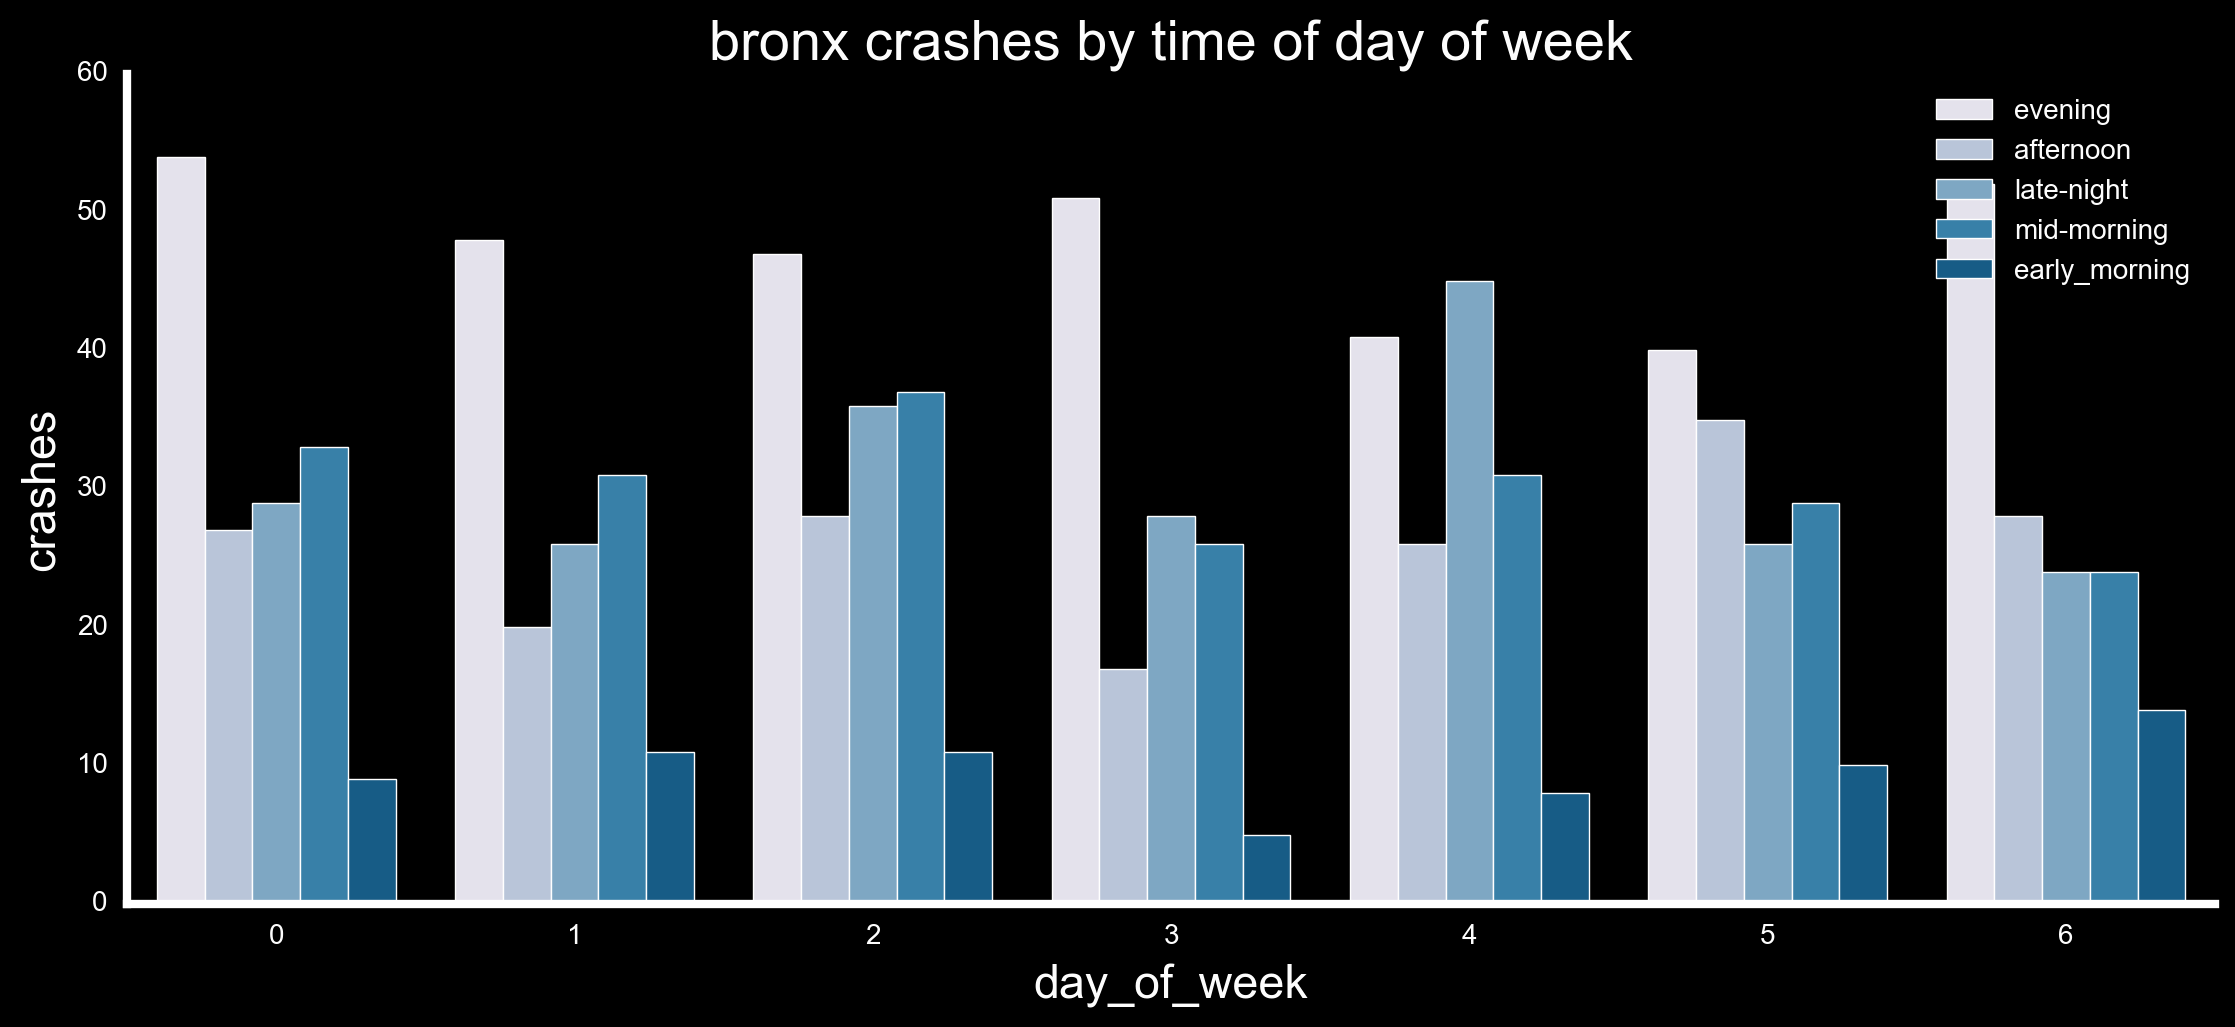

In [90]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='day_of_week',data=bronx_injuries,hue='time_segment',ax=ax, palette='PuBu')
ax.set_ylabel('crashes')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('bronx crashes by time of day of week')
ax.legend(loc='upper right')
plt.plot();

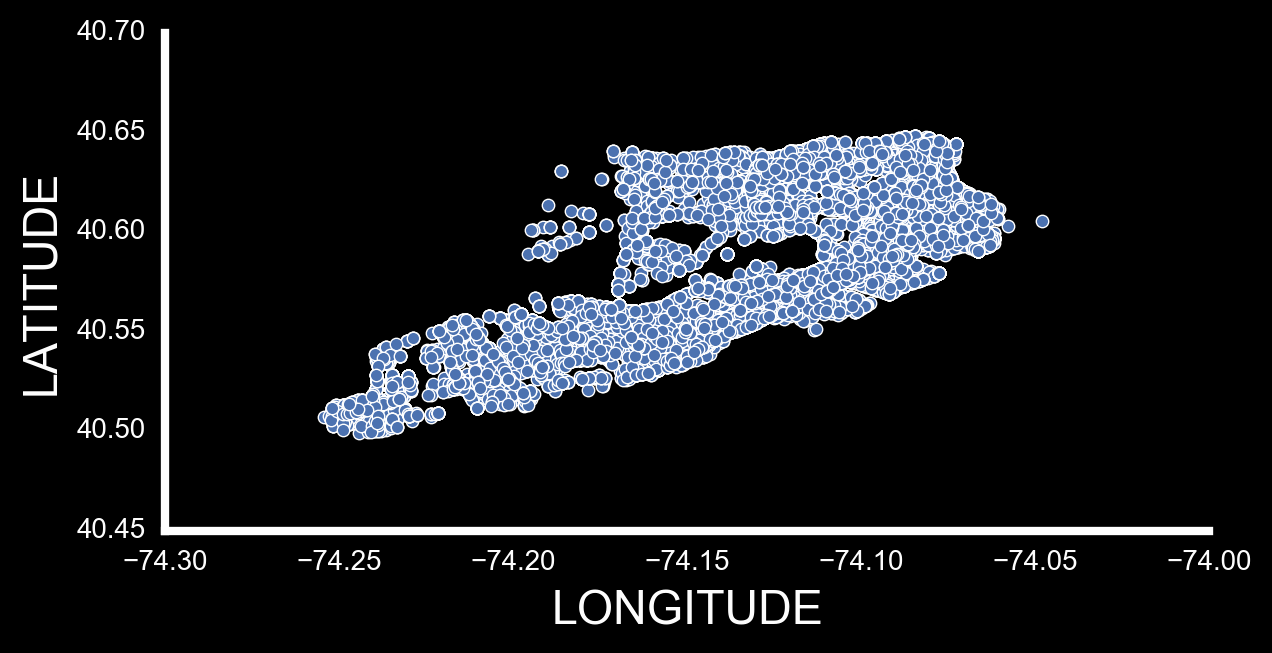

In [91]:
fig, ax = plt.subplots(figsize=(6,3))
staten_df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot();

In [47]:
staten_injuries = staten_df[staten_df['injuries'] > 0]
staten_injuries_groupby = staten_injuries.groupby(['ON_STREET_NAME','CROSS_STREET_NAME','LATITUDE', 'LONGITUDE'],as_index=False)[['injuries','deaths']].sum()
staten_injuries_groupby = staten_injuries_groupby.sort_values(by='injuries', ascending=False)
staten_injuries_groupby = staten_injuries_groupby.head()
staten_injuries_groupby['crash_site'] = staten_injuries_groupby['ON_STREET_NAME'] + ' & ' + staten_injuries_groupby['CROSS_STREET_NAME']
print 'shape of staten df:'
staten_injuries_groupby.shape
staten_injuries_groupby.head()

shape of staten df:


(5, 7)

ON_STREET_NAME CROSS_STREET_NAME   LATITUDE  LONGITUDE  injuries  \
51   LILY POND AVENUE      MAJOR AVENUE  40.600183 -74.064639         2   
97  WESTERVELT AVENUE   CRESCENT AVENUE  40.643431 -74.084143         2   
32       FRONT STREET   THOMPSON STREET  40.626113 -74.073977         2   
64   RICHMOND TERRACE     ALASKA STREET  40.639176 -74.121823         1   
73         ROBIN ROAD      MILLS AVENUE  40.593221 -74.066566         1   

    deaths                           crash_site  
51       0      LILY POND AVENUE & MAJOR AVENUE  
97       0  WESTERVELT AVENUE & CRESCENT AVENUE  
32       0       FRONT STREET & THOMPSON STREET  
64       0     RICHMOND TERRACE & ALASKA STREET  
73       0            ROBIN ROAD & MILLS AVENUE

# [click for a map of Staten Island's top crash sites](https://cdn.rawgit.com/seporter11/DSI-SF-4-seporter11/ceeef989/staten_injuries.html)

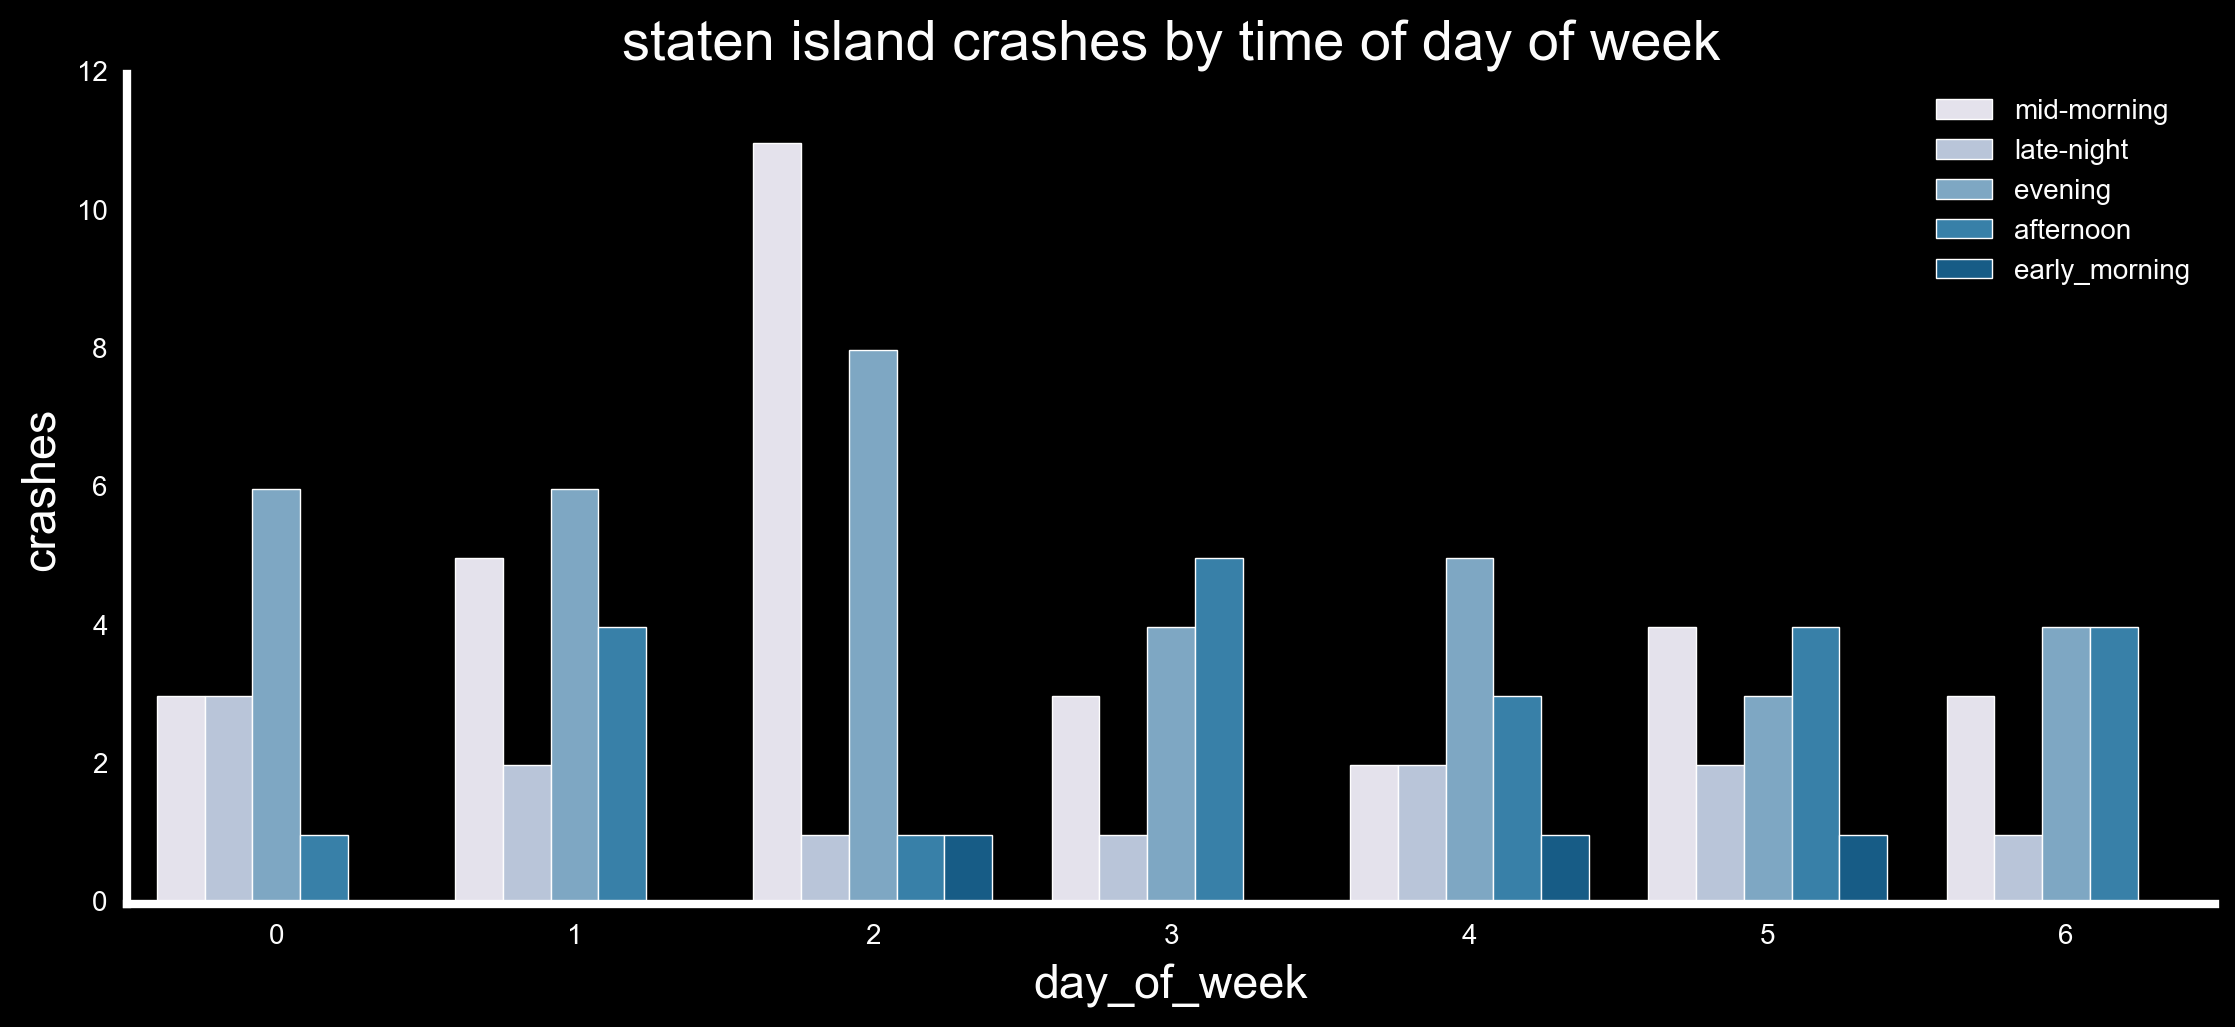

In [95]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='day_of_week',data=staten_injuries,hue='time_segment',ax=ax, palette='PuBu')
ax.set_ylabel('crashes')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('staten island crashes by time of day of week')
ax.legend(loc='upper right')
plt.plot();

In [101]:
queens_df = queens_df[queens_df['LONGITUDE'] < 0]

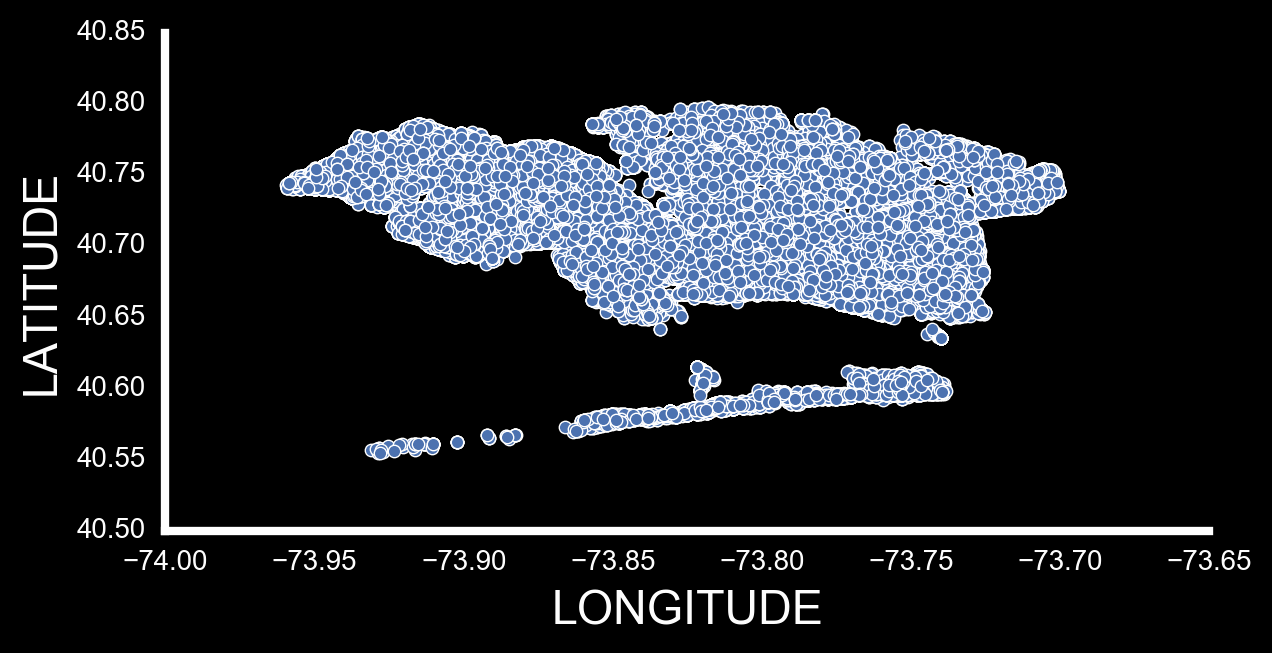

In [102]:
fig, ax = plt.subplots(figsize=(6,3))
queens_df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot();

In [103]:
queens_injuries = queens_df[queens_df['injuries'] > 0]
queens_injuries_groupby = queens_injuries.groupby(['ON_STREET_NAME','CROSS_STREET_NAME','LATITUDE', 'LONGITUDE'],as_index=False)[['injuries','deaths']].sum()
queens_injuries_groupby = queens_injuries_groupby.sort_values(by='injuries', ascending=False)
queens_injuries_groupby = queens_injuries_groupby.head()
queens_injuries_groupby['crash_site'] = queens_injuries_groupby['ON_STREET_NAME'] + ' & ' + queens_injuries_groupby['CROSS_STREET_NAME']
print 'shape of queens df:'
queens_injuries_groupby.shape
queens_injuries_groupby.head()

shape of queens df:


(5, 7)

ON_STREET_NAME CROSS_STREET_NAME   LATITUDE  LONGITUDE  injuries  \
1600  ROOSEVELT AVENUE        126 STREET  40.755336 -73.843245         9   
1596  ROOSEVELT AVENUE        108 STREET  40.750718 -73.858765         9   
1606  ROOSEVELT AVENUE         58 STREET  40.745392 -73.906612         8   
1692   STEINWAY STREET         30 AVENUE  40.763893 -73.914994         7   
1599  ROOSEVELT AVENUE        114 STREET  40.752541 -73.852604         7   

      deaths                     crash_site  
1600       0  ROOSEVELT AVENUE & 126 STREET  
1596       0  ROOSEVELT AVENUE & 108 STREET  
1606       0   ROOSEVELT AVENUE & 58 STREET  
1692       0    STEINWAY STREET & 30 AVENUE  
1599       0  ROOSEVELT AVENUE & 114 STREET

# [click for a map of Queens' top crash sites](https://cdn.rawgit.com/seporter11/DSI-SF-4-seporter11/572bcd5a/queens_crashes_new.html)

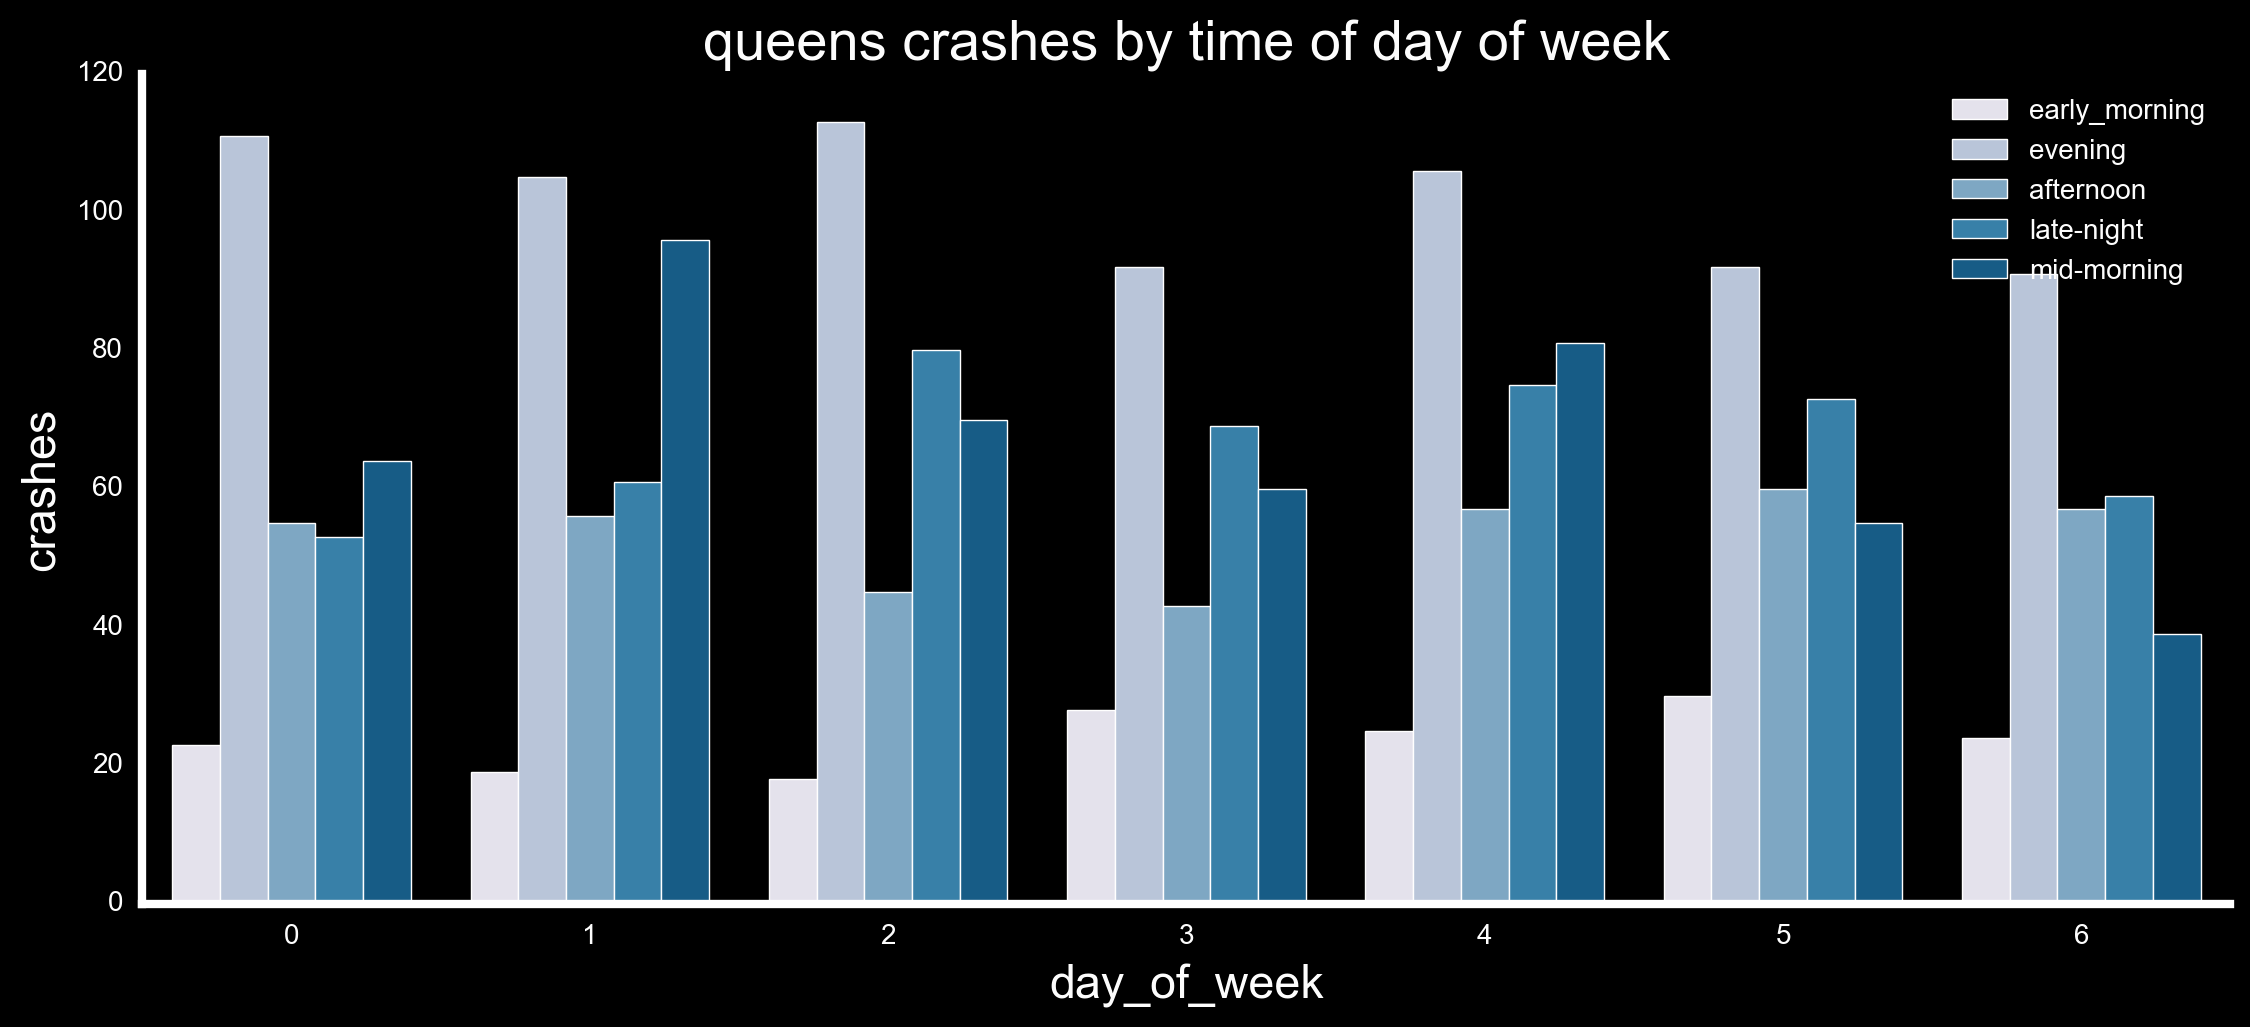

In [104]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='day_of_week',data=queens_injuries,hue='time_segment',ax=ax, palette='PuBu')
ax.set_ylabel('crashes')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('queens crashes by time of day of week')
ax.legend(loc='upper right')
plt.plot();

# Constructing my models



<img src="https://upload.wikimedia.org/wikipedia/commons/3/38/Law-of-haversines.svg" style="margin: 15px; float: right;"> 

- Building a function that calculates the haversine distance (in Kilometers) from my hot spots and the actual data points


- My goal is to create additional features to my dataset that will provide some positive impact on predicting crashes.


- If I can create these 'hotspots' based on the high-volumed crash sites, then I can make the distance from those be new features


- The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.



- The haversine formula is used to calculate the great-circle distance between two points – that is, the shortest distance over the earth’s surface


In [17]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees) 

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [18]:
df = manhattan_df
df.shape

(125321, 62)

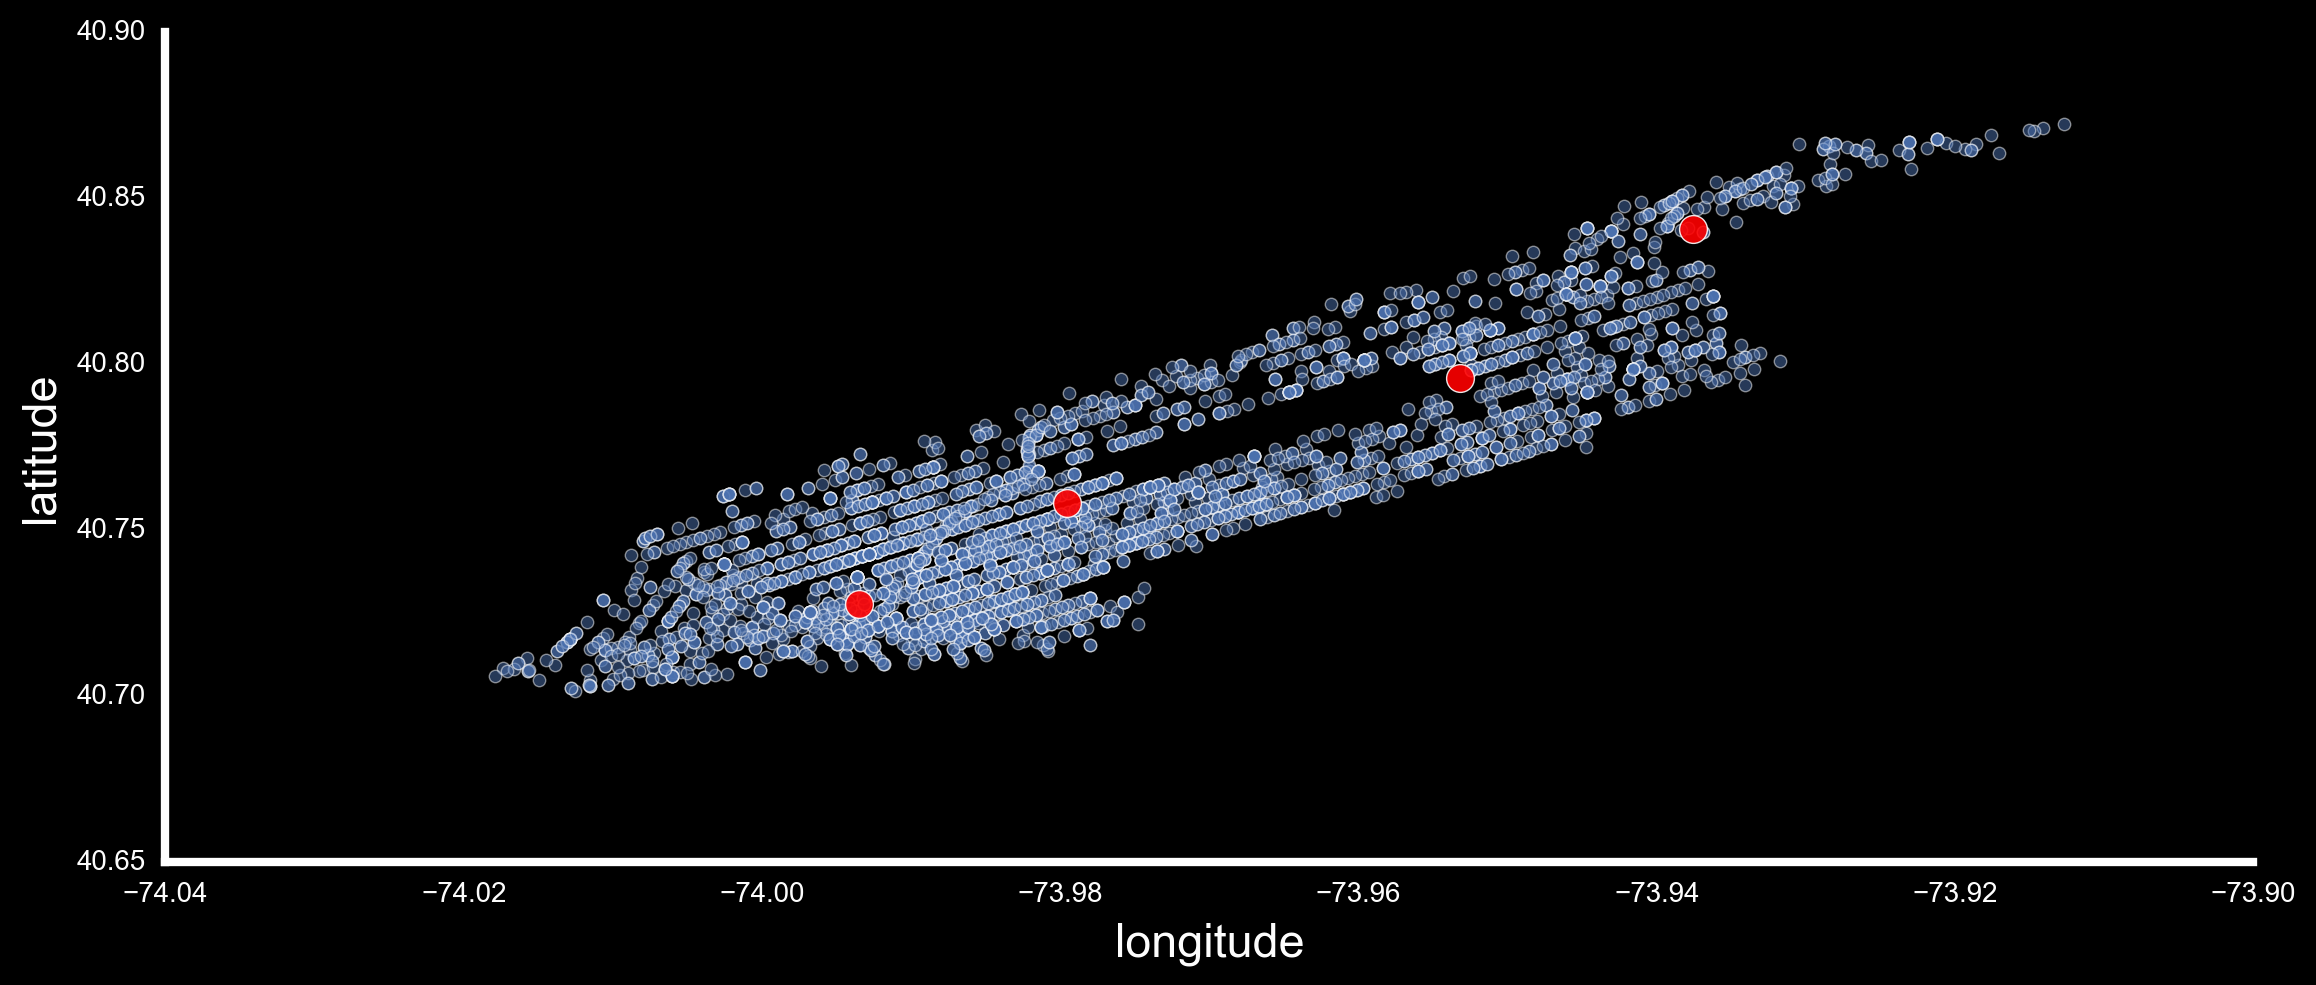

In [21]:
## once I do that, I then add in the centroids (n_clusters = 4) throughout the shape of the crash sites. 
cluster = KMeans(n_clusters=4)

## setting up my crash df where injuries are greater than 0
injuries = df.query("injuries > 0")
cluster.fit(injuries[['LONGITUDE', 'LATITUDE']])
clusters = pd.DataFrame(cluster.cluster_centers_, columns=["x", "y"])

## plotting all the injuries on a latitude and longitude axis'd scatter plot.
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,5))
ax = injuries.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=.5, ax=ax)

## now plotting the clusters (4 of them)
clusters.plot(kind="scatter", x="x", y="y", color="red", s=100, alpha=.9, ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plt.plot();

In [147]:
hot_locs = df.groupby(['BOROUGH', 'ON_STREET_NAME', 'CROSS_STREET_NAME']).filter(lambda x: len(x) > 250)

In [27]:
crash_sites = df.groupby(['ON_STREET_NAME', 'CROSS_STREET_NAME'], as_index=False)['injuries'].sum()

In [30]:
crash_sites = crash_sites.sort_values(by='injuries', ascending=False)

In [32]:
crash_sites[crash_sites['injuries'] > 4].count()

ON_STREET_NAME       59
CROSS_STREET_NAME    59
injuries             59
dtype: int64

In [34]:
## creating the 'hotspots' for my model. I'm filtering on my dataframe for crashes, grouping by location,  
## and then for when there were more than 4 crashes per site.

hot_locs = df.query("injuries > 0").groupby(['BOROUGH', 'ON_STREET_NAME', 
                                             'CROSS_STREET_NAME']).filter(lambda x: len(x) > 4)

print hot_locs.shape
hot_locs.head()

(347, 62)


DATE  TIME    BOROUGH  ZIP_CODE   LATITUDE  LONGITUDE  \
101791 2013-01-03  14.0  MANHATTAN   10027.0  40.810174 -73.951167   
102606 2013-01-05  21.0  MANHATTAN   10010.0  40.740184 -73.986363   
105946 2013-01-11  13.0  MANHATTAN   10017.0  40.749824 -73.972202   
107130 2013-01-14  12.0  MANHATTAN   10010.0  40.740184 -73.986363   
107833 2013-01-15   9.0  MANHATTAN   10026.0  40.801155 -73.959648   

                         LOCATION   ON_STREET_NAME  CROSS_STREET_NAME  \
101791  (40.8101738, -73.9511673)  WEST 125 STREET           8 AVENUE   
102606   (40.7401843, -73.986363)   EAST 23 STREET  PARK AVENUE SOUTH   
105946   (40.749824, -73.9722023)   EAST 42 STREET           2 AVENUE   
107130   (40.7401843, -73.986363)   EAST 23 STREET  PARK AVENUE SOUTH   
107833  (40.8011551, -73.9596475)  WEST 110 STREET   MANHATTAN AVENUE   

       OFF_STREET_NAME    ...      borough_cat  precip_scale  month  \
101791               0    ...                2             0      1   
102606               0    ...                2             0      1   
105946               0    ...                2             0      1   
107130               0    ...                2             0      1   
107833               0    ...                2             0      1   

        injuries_binary  temp_cat  dew_cat  humid_cat  day_of_week  year  \
101791                1         3        2          4            3  2013   
102606                1         3        2          4            5  2013   
105946                1         4        3          5            4  2013   
107130                1         4        4          5            0  2013   
107833                1         3        3          5            1  2013   

       month_name  
101791        Jan  
102606        Jan  
105946        Jan  
107130        Jan  
107833        Jan  

[5 rows x 62 columns]

In [149]:
print NY_merged_samp.injuries.sum()
print NY_merged_samp.shape

11252
(475591, 62)


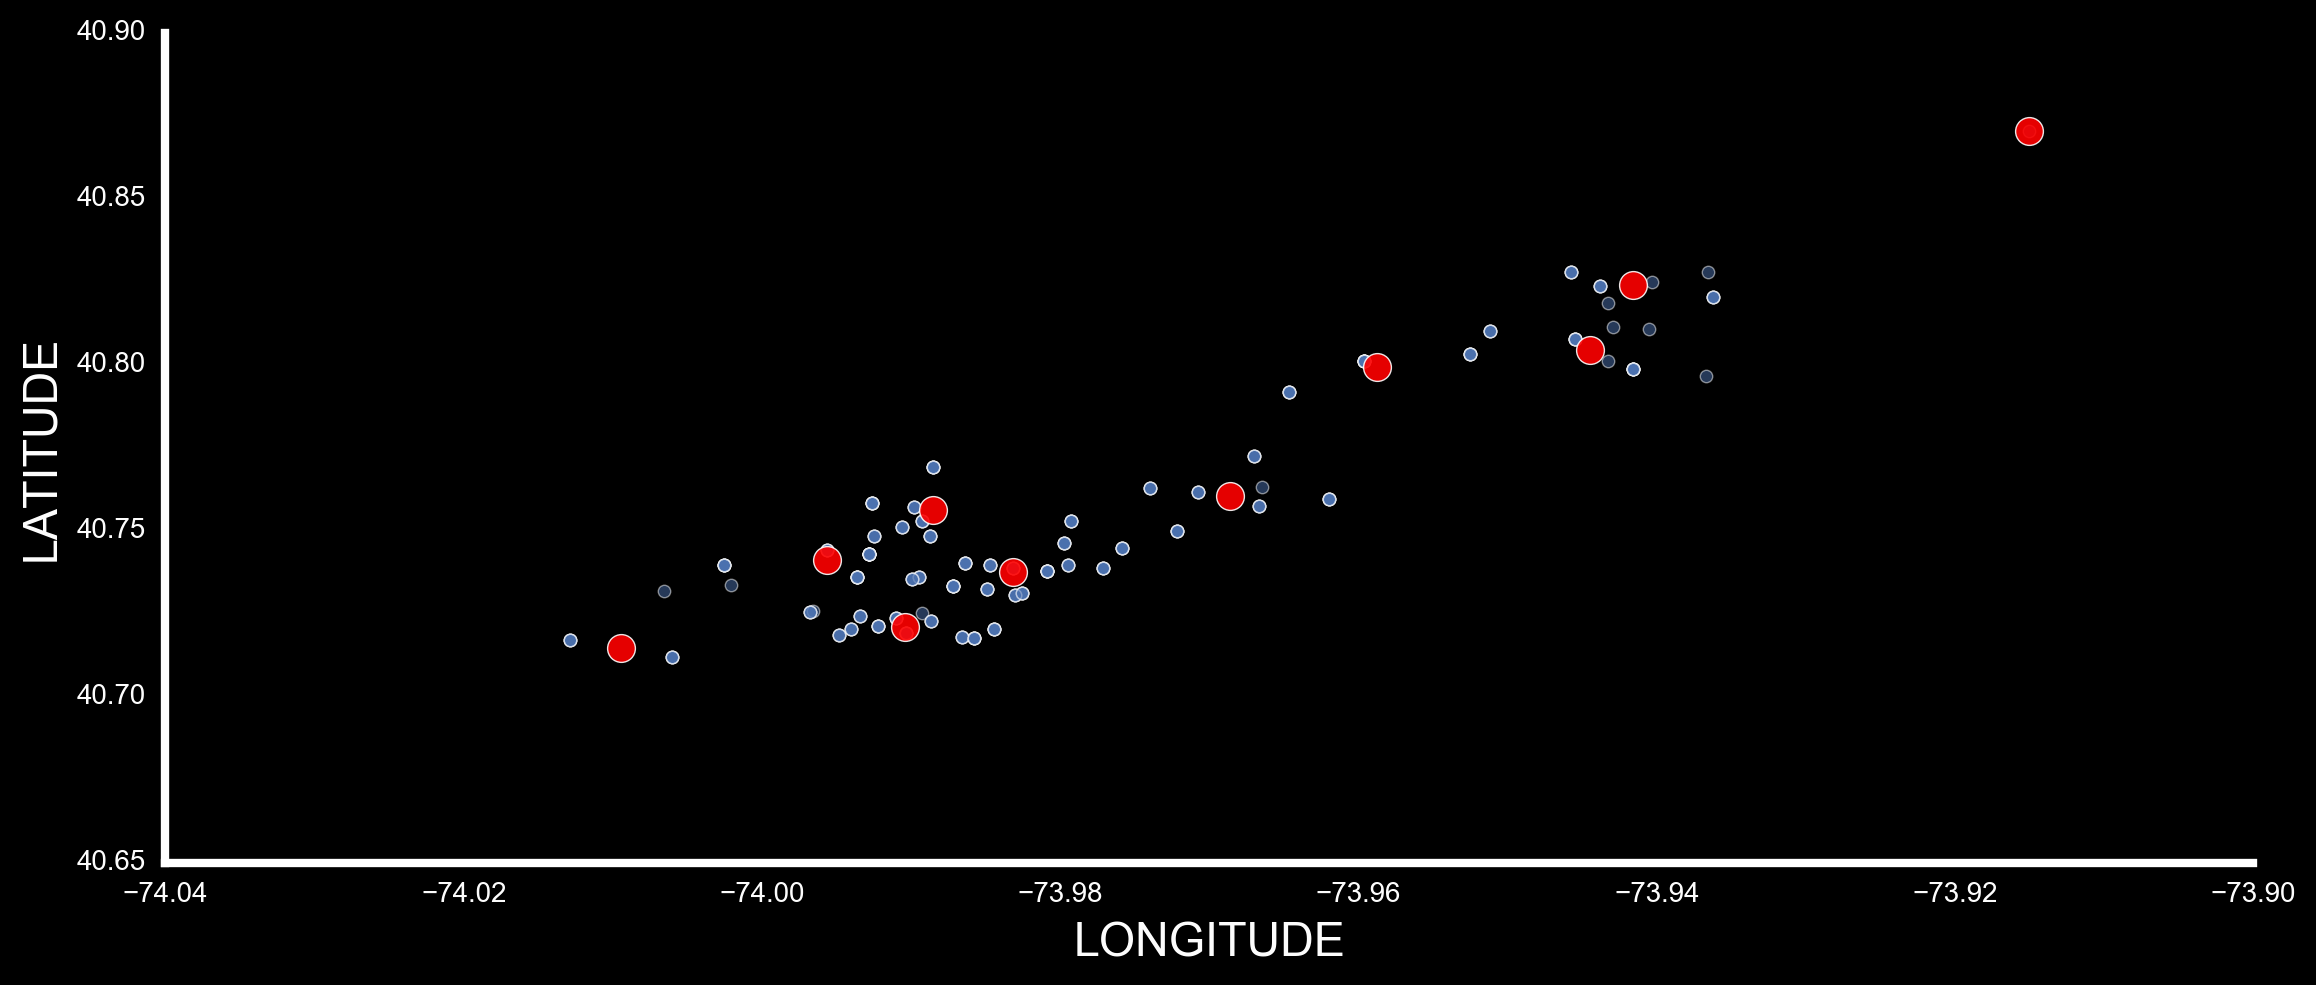

In [35]:
## now assigning 10 centroids/hot spots to my 'hot_locs' dataframe that only shows locations where more than 
## 4 crashes occurred.

fig, ax = plt.subplots(figsize=(12,5))
cluster = KMeans(n_clusters=10)
cluster.fit(hot_locs[['LONGITUDE', 'LATITUDE']])
clusters = pd.DataFrame(cluster.cluster_centers_, columns=["x", "y"])
ax = hot_locs.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=.5, ax=ax)
clusters.plot(kind="scatter", x="x", y="y", color="red", s=100, alpha=.9, ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('LATITUDE')
ax.set_xlabel('LONGITUDE')
plt.plot();

In [151]:
[row for row in enumerate(clusters.values)]

[(0, array([-73.983148  ,  40.73749483])),
 (1, array([-73.94449028,  40.80449164])),
 (2, array([-73.99042648,  40.72096677])),
 (3, array([-73.96859874,  40.76036061])),
 (4, array([-73.94162455,  40.82393144])),
 (5, array([-73.98892729,  40.75546946])),
 (6, array([-73.99610991,  40.74015951])),
 (7, array([-73.9587953 ,  40.79930623])),
 (8, array([-74.0094511,  40.7145404])),
 (9, array([-73.9150455,  40.8705035]))]

In [152]:
def label_target(value):
    return 1 if value > 0 else 0

def distance_features(row):
    for index, cluster in enumerate(clusters.values):
        lat, lon = cluster
        row["cluster_dist_%d" % index] = round(haversine_np(lon, lat, row['LATITUDE'], row['LONGITUDE']), 4)
  
    return row

hot_locs = hot_locs.apply(distance_features,axis=1)
hot_locs['target'] = hot_locs['injuries'].map(label_target)

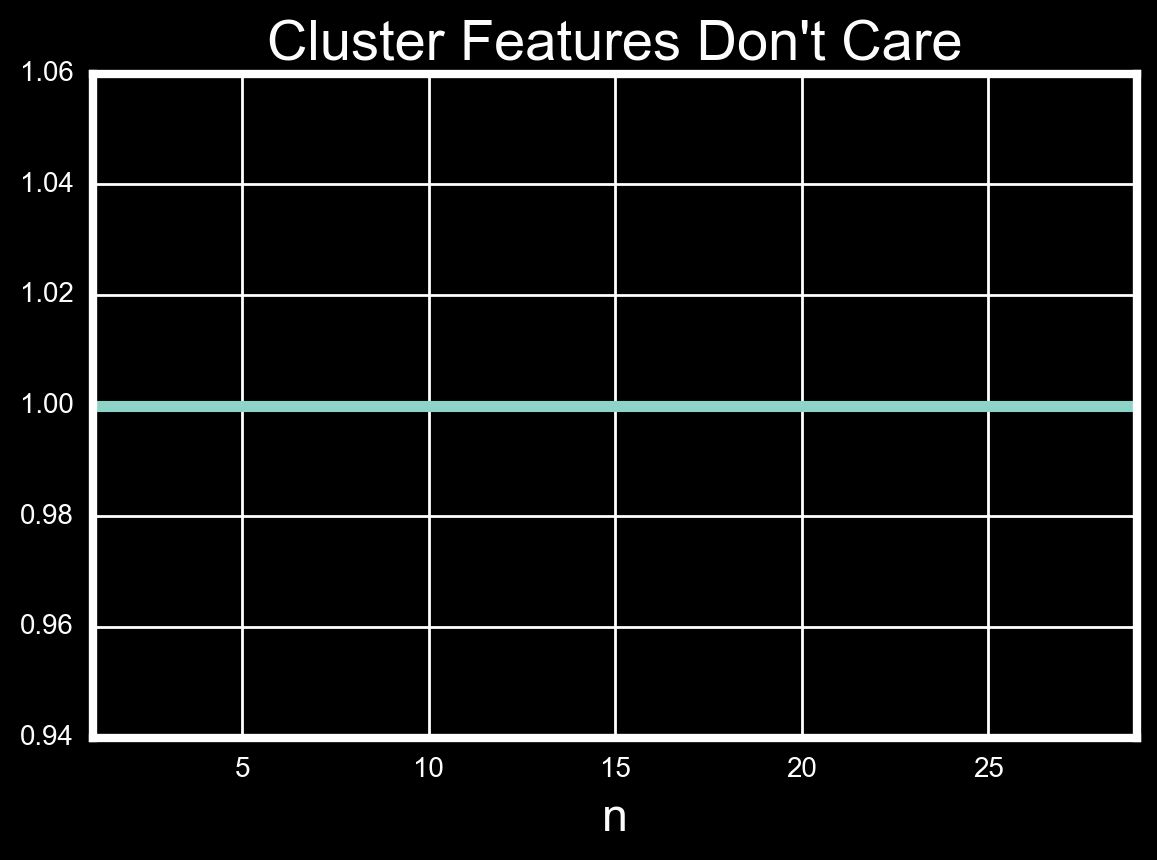

In [153]:
cluster_features = [feature for feature in hot_locs if "cluster_dist" in feature]

scores = []

for n in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(hot_locs[cluster_features], hot_locs['target'])
    scores.append({
      "n": n,
      "score": knn.score(hot_locs[cluster_features], hot_locs['target'])
    })
    
scores = pd.DataFrame(scores)
scores.index = scores.n
scores['score'].plot(title="Cluster Features Don't Care");

In [154]:
df['target'] = df.injuries.map(label_target)
df = df.apply(distance_features, axis=1)
df['target'] = df['injuries'].map(label_target)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


First, let's try out a Random Forest with the original 3 predictors: TIME, day_of_week and month

In [205]:
y_injuries= df['target']
X_injuries = df[['TIME', 'day_of_week', 'month']]

In [206]:
scaler = MinMaxScaler()
X_injuries = df[['TIME', 'day_of_week', 'month']]

In [207]:
X_injuries, X_injuries_test, y_injuries, y_injuries_test = train_test_split(X_injuries, y_injuries, test_size=0.3)

print X_injuries.shape, y_injuries.shape
print X_injuries_test.shape, y_injuries_test.shape

(87724, 3) (87724,)
(37597, 3) (37597,)


In [208]:
rfc = RandomForestClassifier()
rf_params = {
    'n_estimators':[13],
    'class_weight':[{1:1.5}]
}

rf_gs_injuries = GridSearchCV(rfc, rf_params,verbose=1,n_jobs=-1)
rf_model_injuries = rf_gs_injuries.fit(X_injuries, y_injuries) 

rf_proba_injuries = rf_model_injuries.predict_log_proba(X_injuries_test)
y_injuries_predicted = rf_model_injuries.predict_log_proba(X_injuries_test)[:,1]

rfc_best_injuries = rf_gs_injuries.best_estimator_
print "best estimator", rfc_best_injuries
print 
print "best parameters",  rf_gs_injuries.best_params_
print 
print "best score", rf_gs_injuries.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


best estimator RandomForestClassifier(bootstrap=True, class_weight={1: 1.5},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

best parameters {'n_estimators': 13, 'class_weight': {1: 1.5}}

best score 0.972447676805


In [209]:
print "score on testing data", rfc_best_injuries.score(X_injuries_test, y_injuries_test)

score on testing data 0.971912652605


In [210]:
feature_importance_injuries = pd.DataFrame({ 'feature':X_injuries.columns, 
                                   'importance':rfc_best_injuries.feature_importances_
                                  })

feature_importance_injuries.sort_values('importance', ascending=False, inplace=True)
feature_importance_injuries.head(10)

feature  importance
0         TIME    0.441812
2        month    0.386063
1  day_of_week    0.172126

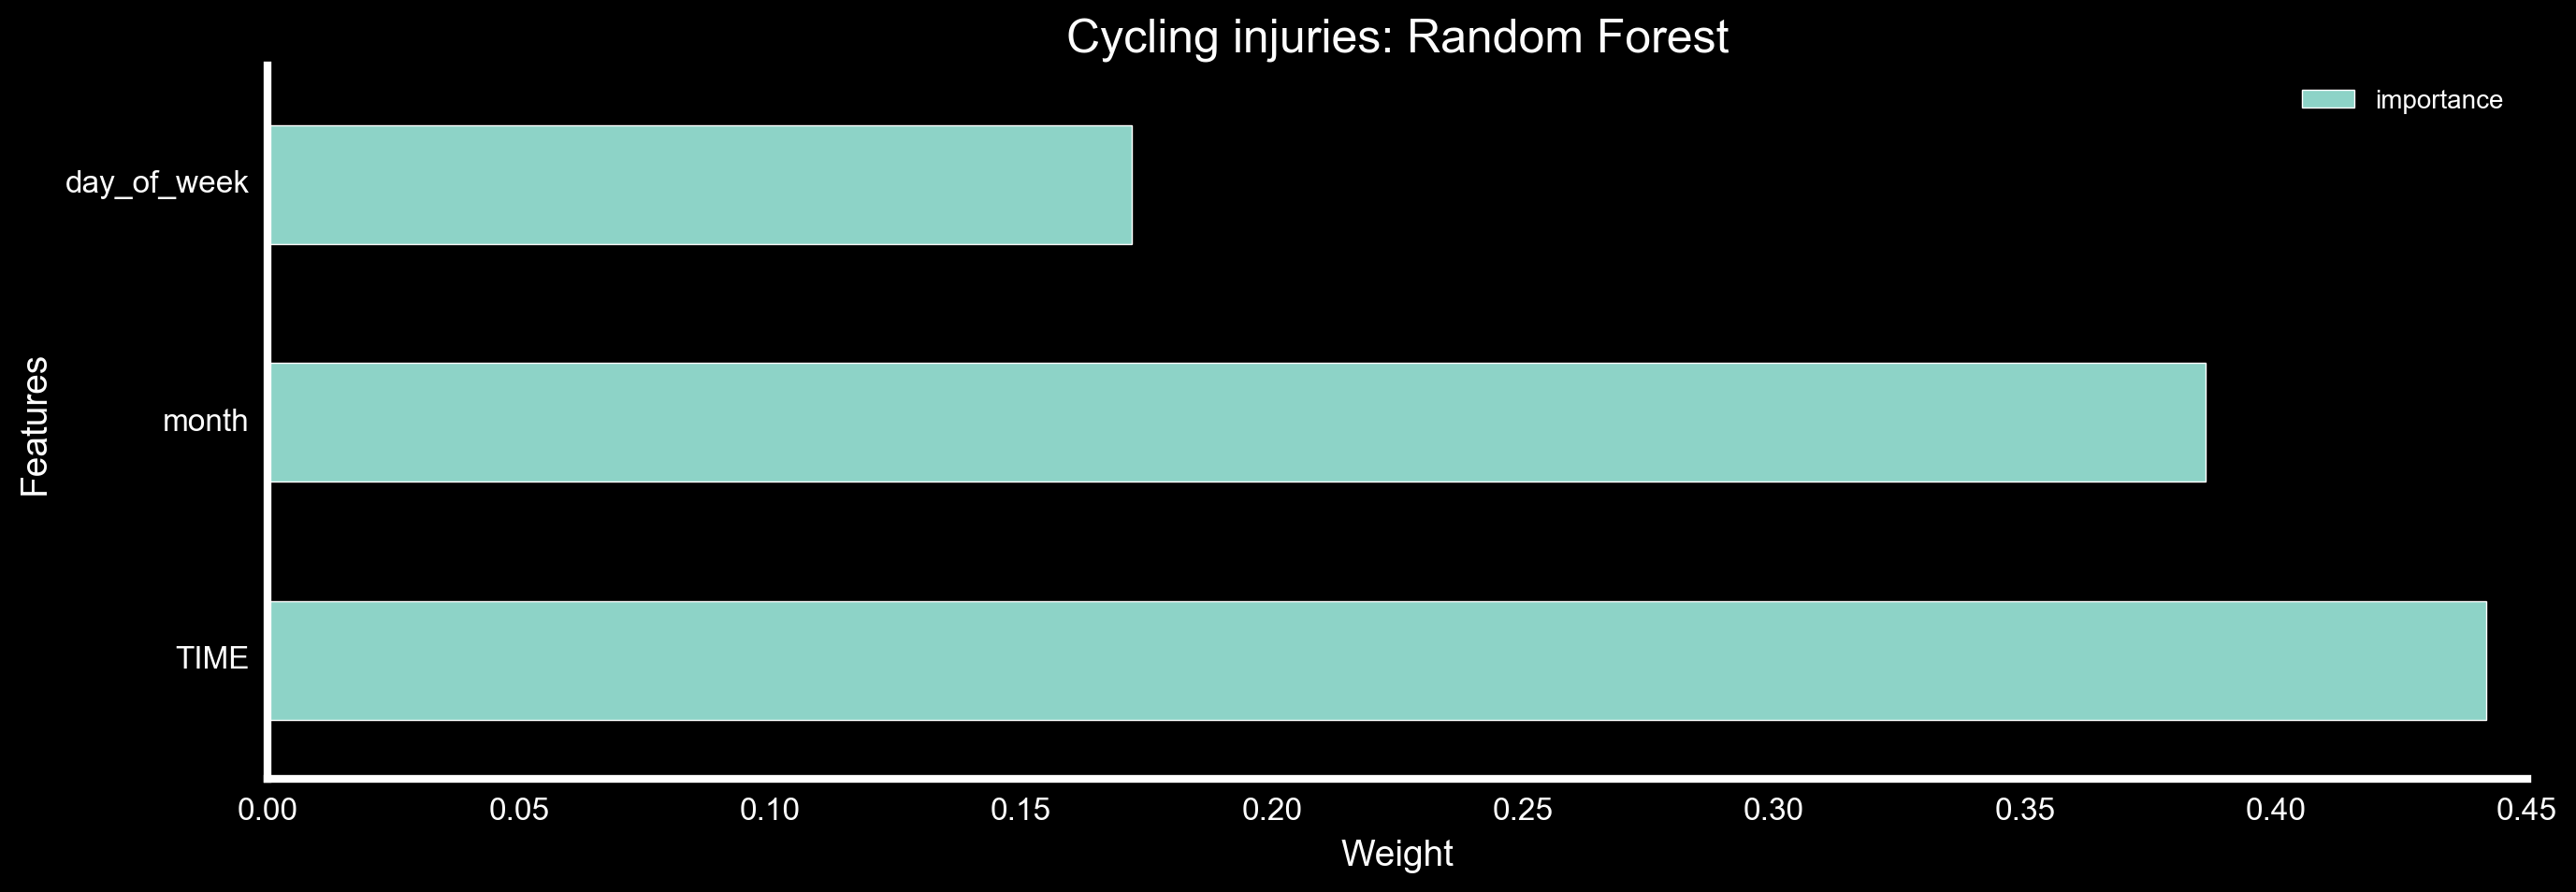

In [211]:
plt.style.use("dark_background")
feat = feature_importance_injuries.set_index('feature')
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
feat.sort_values('importance', ascending=0).head(6).plot(kind='barh', figsize=(14,5),fontsize=12, ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Weight',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title('Cycling injuries: Random Forest',fontsize=18)
plt.tight_layout()
plt.plot();

Obviously the model with these three predictors is able to predict a majority of non-accidents, but unable to predict the vast majority of accidents.

In [212]:
y_injuries_pred_rfc= rfc_best_injuries.predict(X_injuries_test)

print y_injuries_pred_rfc.shape, y_injuries_test.shape

cls_rep = classification_report(y_injuries_test, y_injuries_pred_rfc)

print cls_rep

(37597,) (37597,)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99     36541
          1       0.00      0.00      0.00      1056

avg / total       0.94      0.97      0.96     37597



Now attempting the next RandomForest but with the centroids that I've created.

In [222]:
y_injuries= df['target']
X_injuries = df[['cluster_dist_0','cluster_dist_1','cluster_dist_2','cluster_dist_3','TIME', 'day_of_week', 'month',
                'cluster_dist_4','cluster_dist_5','cluster_dist_6','cluster_dist_7','cluster_dist_8','cluster_dist_9']]

In [224]:
scaler = MinMaxScaler()
X_injuries = scaler.fit_transform(X_injuries)

In [226]:
X_injuries, X_injuries_test, y_injuries, y_injuries_test = train_test_split(X_injuries, y_injuries, test_size=0.3)

print X_injuries.shape, y_injuries.shape
print X_injuries_test.shape, y_injuries_test.shape

(87724, 13) (87724,)
(37597, 13) (37597,)


In [218]:
rfc = RandomForestClassifier()
rf_params = {
    'n_estimators':[13],
    'class_weight':[{1:1.5}]
}

rf_gs_injuries = GridSearchCV(rfc, rf_params,verbose=1,n_jobs=-1)
rf_model_injuries = rf_gs_injuries.fit(X_injuries, y_injuries) 

rf_proba_injuries = rf_model_injuries.predict_log_proba(X_injuries_test)
y_injuries_predicted = rf_model_injuries.predict_log_proba(X_injuries_test)[:,1]

rfc_best_injuries = rf_gs_injuries.best_estimator_
print "best estimator", rfc_best_injuries
print 
print "best parameters",  rf_gs_injuries.best_params_
print 
print "best score", rf_gs_injuries.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished


best estimator RandomForestClassifier(bootstrap=True, class_weight={1: 1.5},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

best parameters {'n_estimators': 13, 'class_weight': {1: 1.5}}

best score 0.969198850942


In [219]:
print "score on testing data", rfc_best_injuries.score(X_injuries_test, y_injuries_test)

score on testing data 0.966726068569


In [227]:
X_injuries = pd.DataFrame(X_injuries)

In [228]:
feature_importance_injuries = pd.DataFrame({ 'feature':X_injuries.columns, 
                                   'importance':rfc_best_injuries.feature_importances_
                                  })

feature_importance_injuries.sort_values('importance', ascending=False, inplace=True)
feature_importance_injuries.head(10)

feature  importance
4         4    0.200249
6         6    0.182064
5         5    0.158590
2         2    0.051185
10       10    0.047359
7         7    0.046557
8         8    0.046176
9         9    0.045995
3         3    0.045498
0         0    0.045246

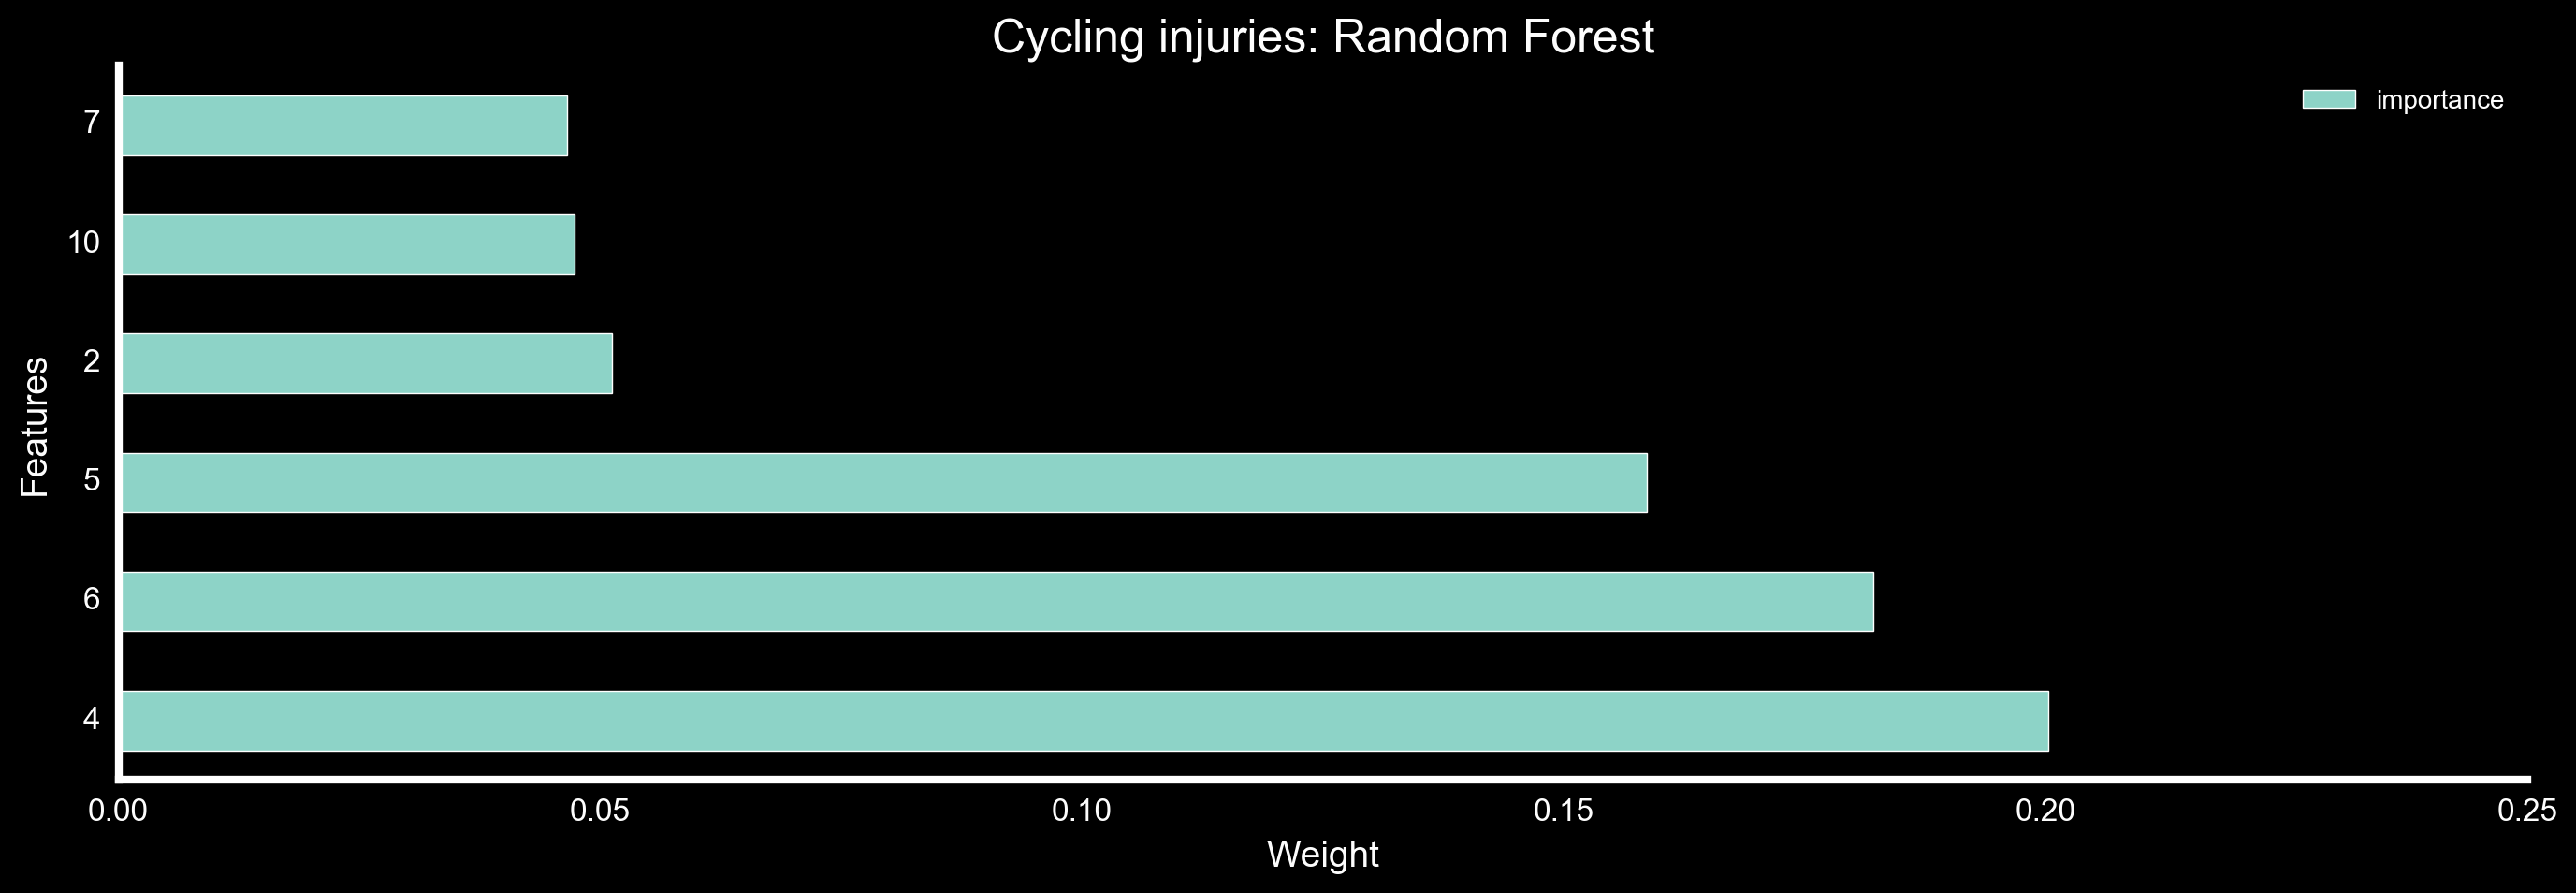

In [229]:
plt.style.use("dark_background")
feat = feature_importance_injuries.set_index('feature')
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
feat.sort_values('importance', ascending=0).head(6).plot(kind='barh', figsize=(14,5),fontsize=12, ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Weight',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title('Cycling injuries: Random Forest',fontsize=18)
plt.tight_layout()
plt.plot();

When I incorporate the additional features in my model, it improves slightly. I will continue to work on and improve this model.

In [230]:
y_injuries_pred_rfc= rfc_best_injuries.predict(X_injuries_test)

print y_injuries_pred_rfc.shape, y_injuries_test.shape

cls_rep = classification_report(y_injuries_test, y_injuries_pred_rfc)

print cls_rep

(37597,) (37597,)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     36611
          1       0.90      0.60      0.72       986

avg / total       0.99      0.99      0.99     37597



In [231]:
def plot_roc_curve(target=False, predict_proba=False, title='Your prediction'):

    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    FPR[1], TPR[1], _ = roc_curve(target,predict_proba)
    ROC_AUC[1] = auc(FPR[1], TPR[1])
    acc_ = np.abs(0.5 - np.mean(target)) + 0.5

    plt.figure(figsize=[11,9])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4, color='darkred')
    #plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title(' %s' % title, fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

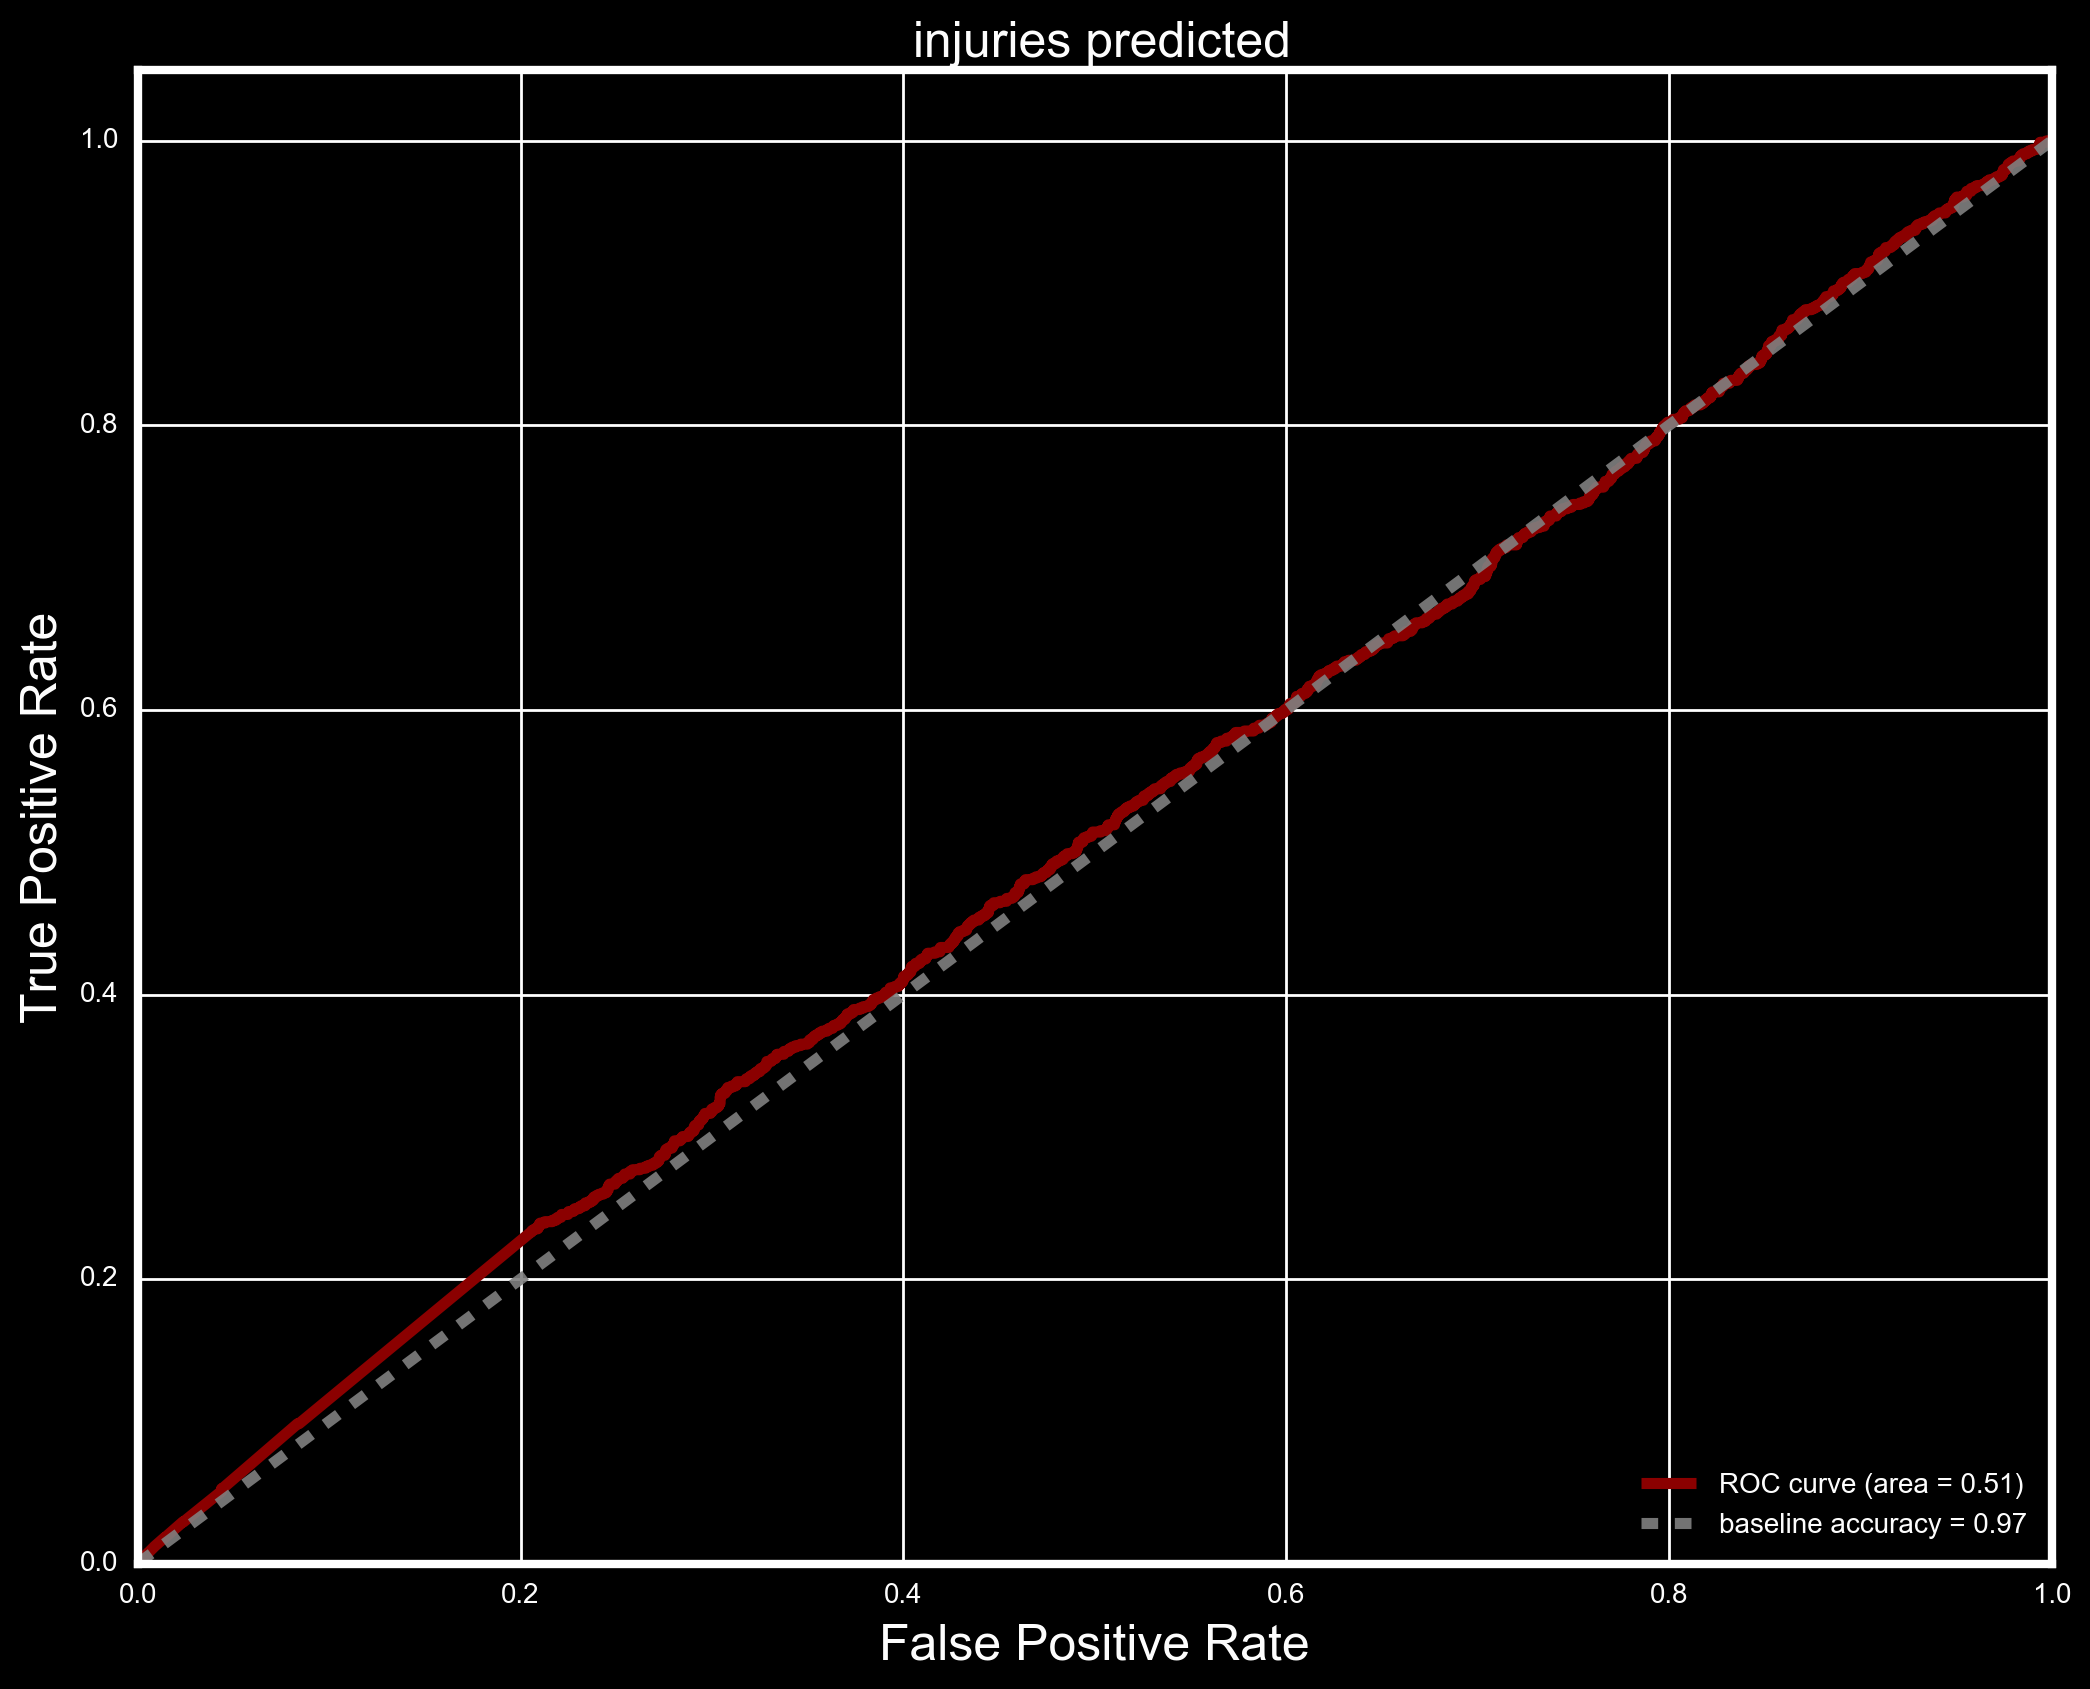

In [232]:
plot_roc_curve(target=y_injuries_test, predict_proba=rf_proba_injuries[:,1], title='injuries predicted')

### Now I am going to try a K means clustering model to see if my scores improve

In [374]:
X_ = df[['cluster_dist_0','cluster_dist_1','cluster_dist_2',
       'cluster_dist_3', 'cluster_dist_4', 'cluster_dist_5',
       'cluster_dist_6', 'cluster_dist_7', 'cluster_dist_8',
       'cluster_dist_9', 'TIME','month', 'day_of_week']]

In [359]:
y_ = df[['target']]

In [ ]:
scores = []

for n in range(1,15):
    
#     params = row.__dict__['parameters']
    model = KNeighborsClassifier(
        n_neighbors= n,
        n_jobs = n,
#         metric=params['metric'],
#         n_jobs = -1,
#         weights = params['weights']
    )
#     model = RandomForestClassifier(
#         n_estimators=params['n_estimators'],
#         class_weight= params['class_weight'],
#                     )
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3)

    model.fit(X_, y_)
    
    predicted = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, predicted)
    
    scores.append({
        "0_precision":   precision[0],
        "1_precision":   precision[1],
        "0_recall":      recall[0],
        "1_recall":      recall[1],
        "0_f1":          f1[0],
        "1_f1":          f1[1],
        "0_support":     support[0],
        "1_support":     support[1],
        "n_neighbors": n,
            "n_jobs": n,
#         "class_weight": params['class_weight'],
    })
    
scores = pd.DataFrame(scores)

In [377]:
scores.sort_values("1_support")

0_f1  0_precision  0_recall  0_support      1_f1  1_precision  \
9   0.986877     0.974094  1.000000      36623  0.000000     0.000000   
0   0.999453     0.999399  0.999508      36585  0.980198     0.982143   
13  0.986303     0.972977  1.000000      36581  0.000000     0.000000   
3   0.986275     0.973025  0.999891      36580  0.005859     0.428571   
8   0.986248     0.972869  1.000000      36576  0.001957     1.000000   
2   0.986768     0.974661  0.999180      36571  0.134276     0.716981   
10  0.986126     0.972631  1.000000      36568  0.000000     0.000000   
11  0.985989     0.972365  1.000000      36558  0.000000     0.000000   
12  0.985838     0.972072  1.000000      36547  0.000000     0.000000   
4   0.985793     0.972140  0.999836      36540  0.018639     0.625000   
5   0.985729     0.971859  1.000000      36538  0.001887     1.000000   
1   0.986311     0.972992  1.000000      36530  0.094643     1.000000   
7   0.985524     0.971460  1.000000      36524  0.000000     0.000000   
6   0.985344     0.971163  0.999945      36509  0.007313     0.666667   

    1_recall  1_support  n_jobs  n_neighbors  
9   0.000000        974      10           10  
0   0.978261       1012       1            1  
13  0.000000       1016      14           14  
3   0.002950       1017       4            4  
8   0.000979       1021       9            9  
2   0.074074       1026       3            3  
10  0.000000       1029      11           11  
11  0.000000       1039      12           12  
12  0.000000       1050      13           13  
4   0.009461       1057       5            5  
5   0.000944       1059       6            6  
1   0.049672       1067       2            2  
7   0.000000       1073       8            8  
6   0.003676       1088       7            7

Comparing the recall scores between the two nearest neighbors models. The first model is without the additional features that I added, the second is with them. Though both models are not super accurate, the version with the additional features has more potential. 

I will continue to improve this model and validate it.

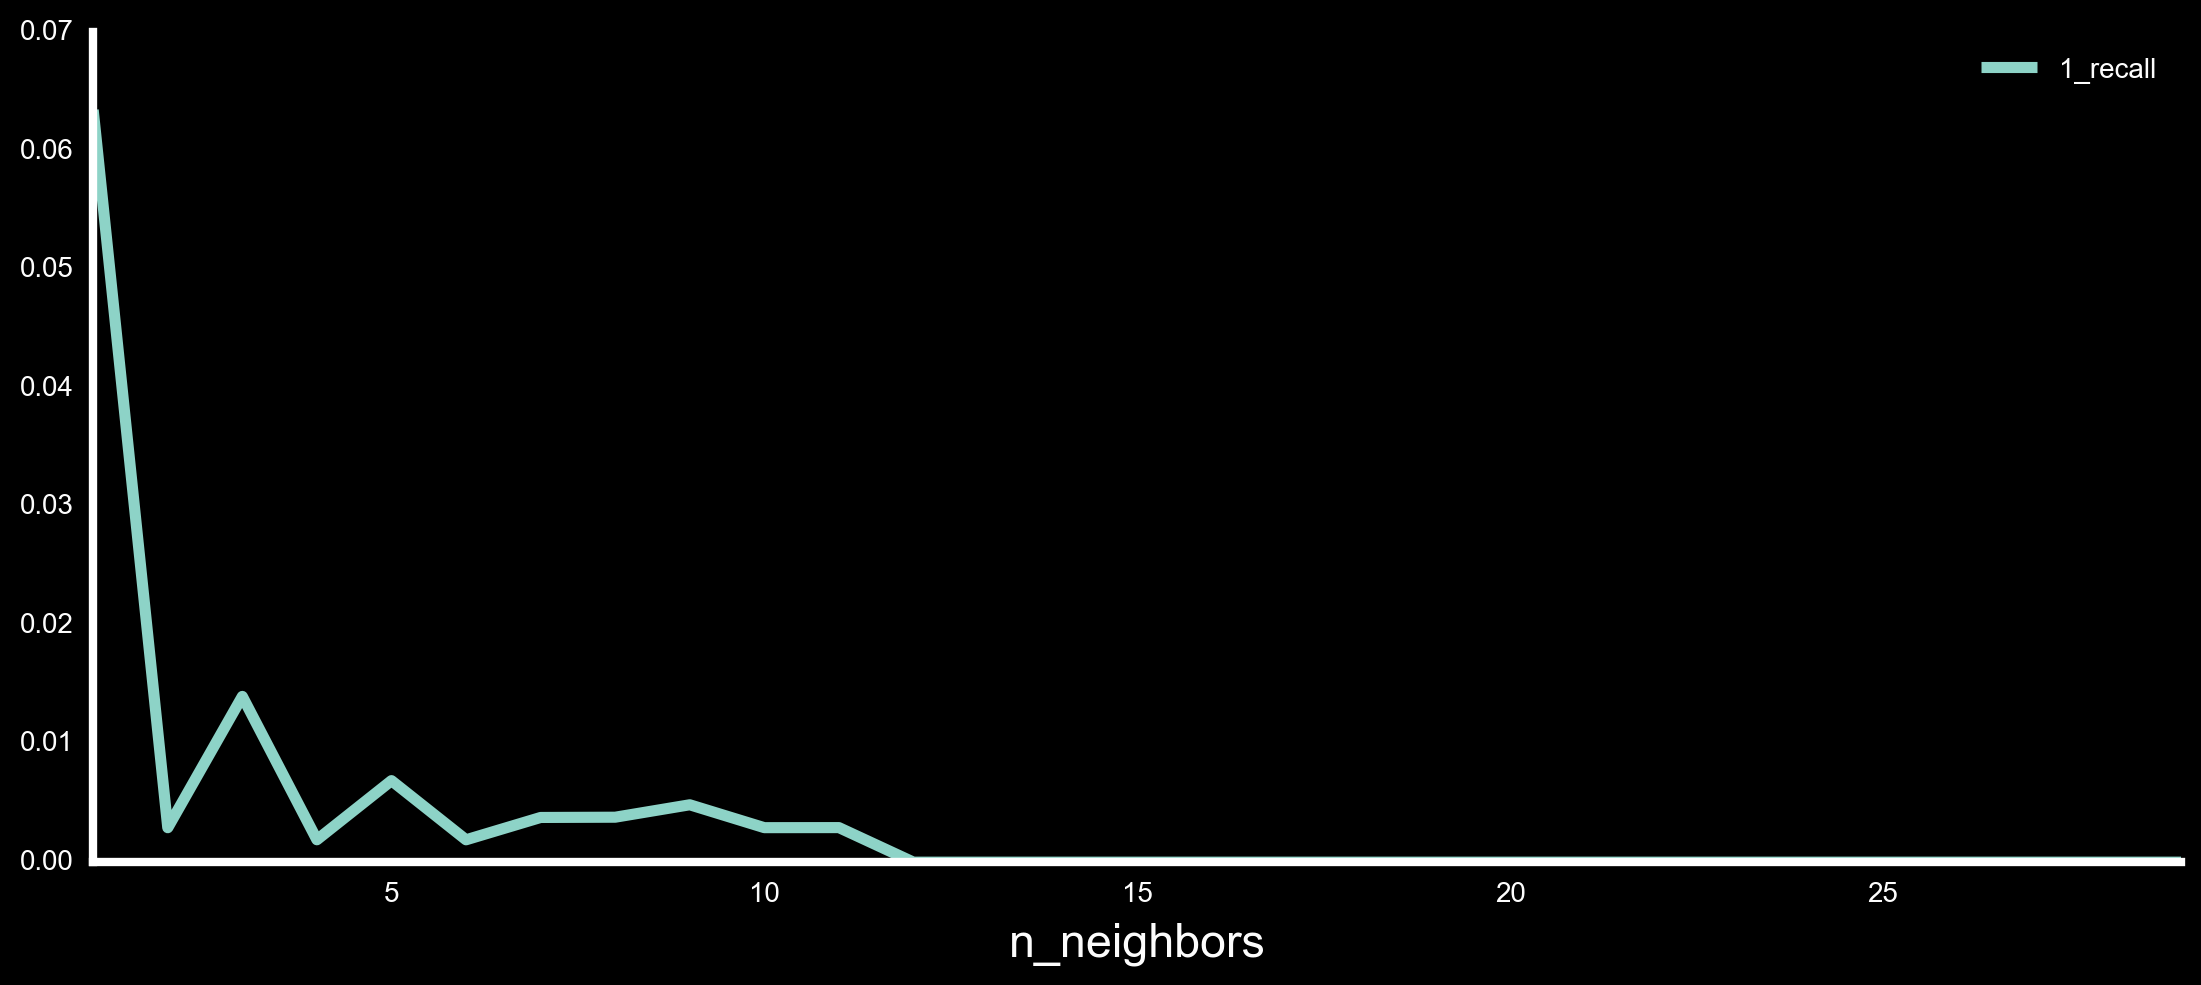

In [368]:
fig ,ax = plt.subplots(figsize=(12,5))
scores.plot(x='n_neighbors', y='1_recall', ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

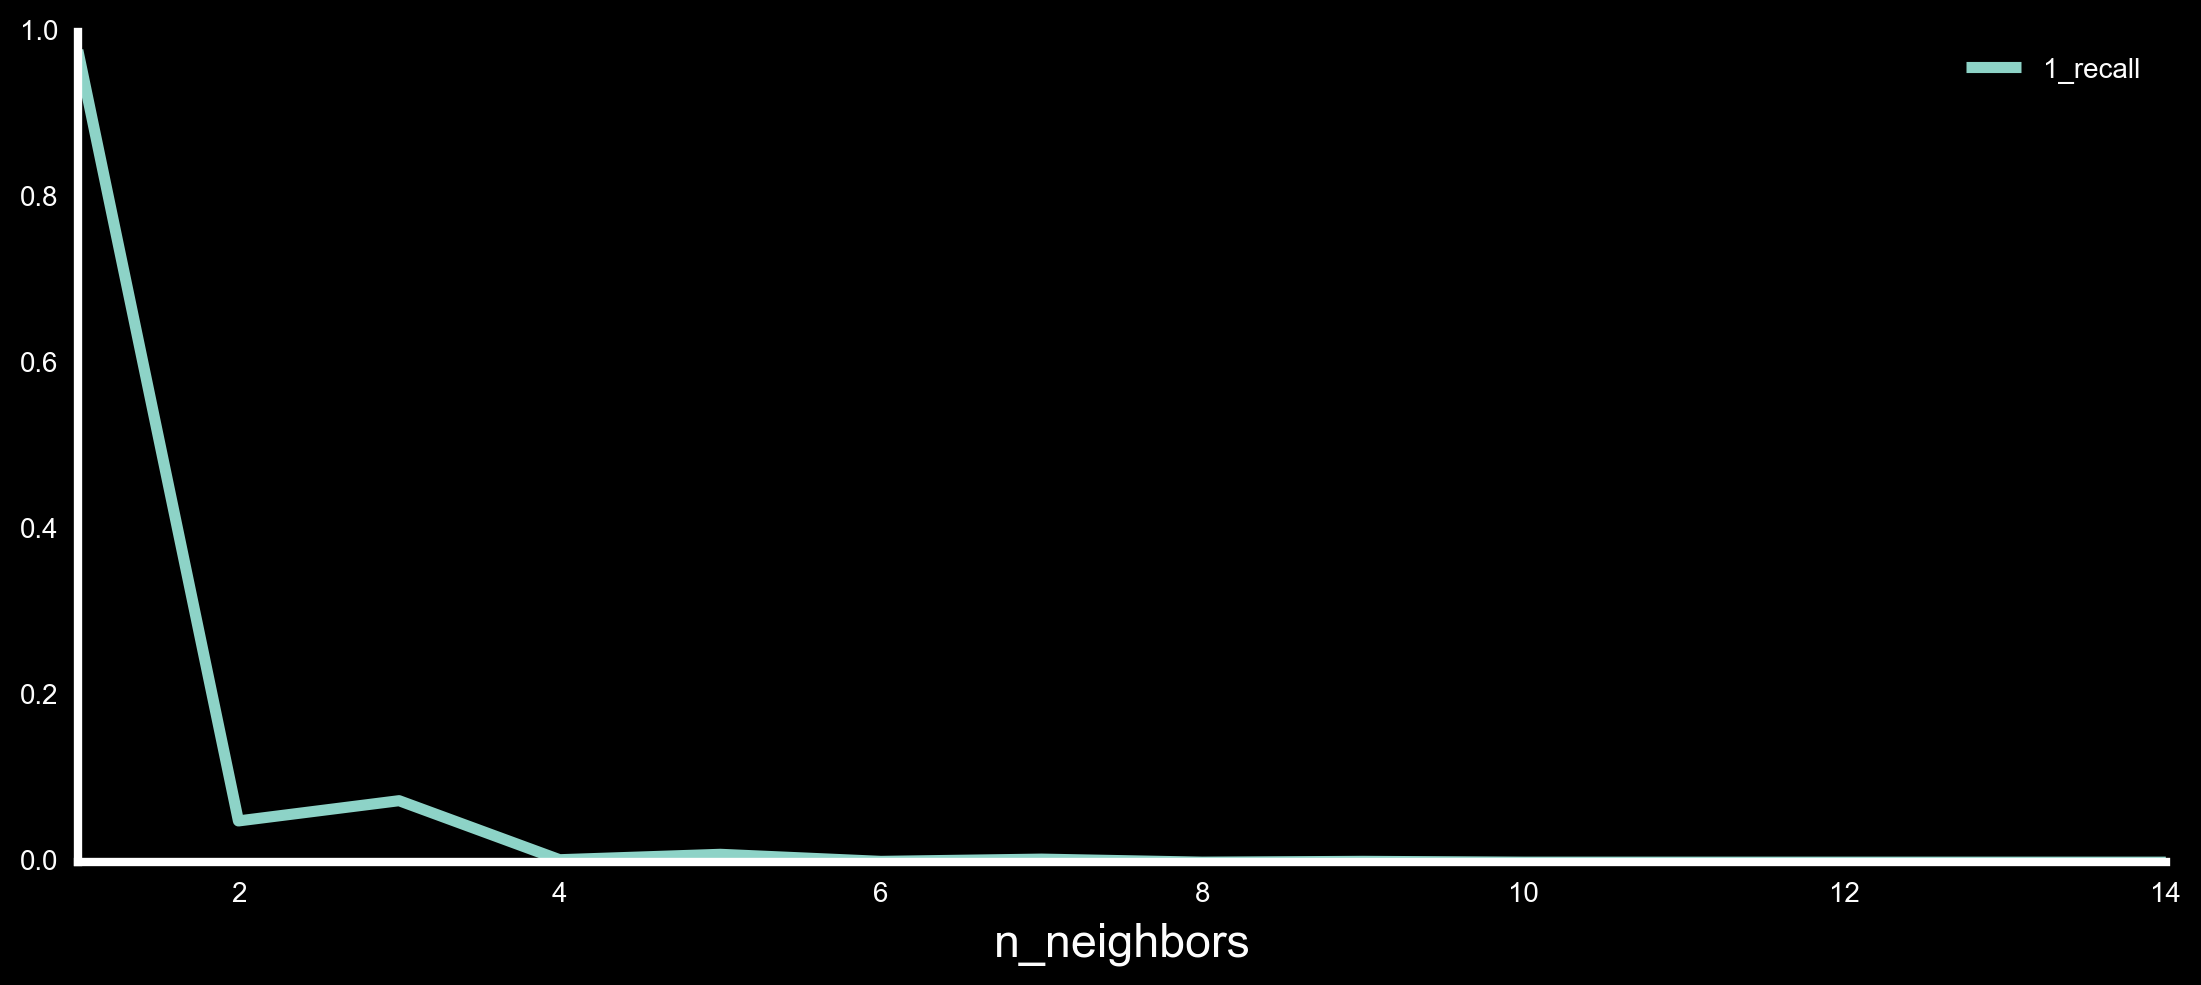

In [378]:
fig ,ax = plt.subplots(figsize=(12,5))
scores.plot(x='n_neighbors', y='1_recall', ax=ax)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [379]:

## testing candidates

knn = KNeighborsClassifier(
    n_neighbors=1,
    n_jobs = -1,
    weights = 'uniform'
)

knn.fit(X, df['target'])
df['predicted'] = knn.predict(X)

print classification_report(df['predicted'], df['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    121853
          1       0.98      0.98      0.98      3468

avg / total       1.00      1.00      1.00    125321



## Findings / Next Steps

This project was challenging for me in many ways. I started with a target that is intrinsically an anomoly - predicting cycling accidents. The number of riders on the road heavily outweighs the number of riders involved in crashes. 

Through exploratory data analysis I was able to find relationships between cycling crashes and other variables that inspired me to explore further. However, when I began to model my data, I ran into some difficulties where the features I thought were of importance actually were not providing much predictive power. Why did this happen? Well, for example, the number of crashes that took place during commuting hours was higher than the number of crashes during all other hours of the day. However, those same hours shared a spike with all the other data points in my set. Given this, it was difficult for my model to see through all the noise.

### Next Steps

Going forward, I'd like to dive deeper into each of the remaining boroughs of NYC, not just Manhattan. I'd like to compare my model with the others and possibly discover that it's easier to predict cycling accidents in Brooklyn for example.

Also, some thoughts that I had to improve my current model would be to subset the population to be an equal amount to the number of crashes that exist so that I'm predicting less of an anomoly. Not 100% accurate relative to the actual population size, but it would at least provide me some more insight into the variables that mean the most. 